## 출처 : introduction to machine learning with python

### Unsupervised-learning

데이터 전처리와 스케일링

In [ ]:
!pip install mglearn

In [ ]:
import mglearn
mglearn.plots.plot_scaling()

여러가지 전처리 방법


데이터 변환 적용하기

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

In [ ]:
# 데이터 변환
X_train_scaled = scaler.transform(X_train)
# 스케일이 조정된 후 데이터셋의 속성을 출력합니다
print("변환된 후 크기:", X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값:\n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값:\n", X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값:\n", X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_train_scaled.max(axis=0))

In [ ]:
# 테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력합니다
print("스케일 조정 후 특성별 최소값:\n", X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_test_scaled.max(axis=0))

훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기


matplotlib 3.0 버전에서는 scatter 함수에 색깔을 지정할 때 하나의 RGB 포맷 문자열이나 Colormap의 리스트를 지정해야 합니다.

경고를 피하기 위해 mglearn에서 만든 ListedColormap 객체의 colors 속성의 원소를 직접 선택하여 RGB 포맷 문자열을 지정합니다.

 - Matplolib 한글 폰트 사용

In [ ]:
# 한글폰트 사용 in colab
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# 인위적인 데이터셋 생성
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 훈련 세트와 테스트 세트의 산점도를 그립니다
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본 데이터")

# MinMaxScaler를 사용해 스케일을 조정합니다
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그립니다
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[1].set_title("스케일 조정된 데이터")

# 테스트 세트의 스케일을 따로 조정합니다
# 테스트 세트의 최솟값은 0, 최댓값은 1이 됩니다
# 이는 예제를 위한 것으로 절대로 이렇게 사용해서는 안됩니다
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도를 그립니다
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2.colors[1], label="test set", s=60)
axes[2].set_title("잘못 조정된 데이터")

for ax in axes:
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
fig.tight_layout()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 메소드 체이닝(chaining)을 사용하여 fit과 transform을 연달아 호출합니다
X_scaled = scaler.fit(X_train).transform(X_train)
# 위와 동일하지만 더 효율적입니다
X_scaled_d = scaler.fit_transform(X_train)

지도 학습에서 데이터 전처리 효과


사이킷런 0.20 버전에서 SVC 클래스의 gamma 매개변수 옵션에 auto외에 scale이 추가되었습니다. auto는 1/n_features, 즉 특성 개수의 역수입니다. scale은 1/(n_features * X.std())로 스케일 조정이 되지 않은 특성에서 더 좋은 결과를 만듭니다.

사이킷런 0.22 버전부터는 gamma 매개변수의 기본값이 auto에서 scale로 변경됩니다. 서포트 벡터 머신을 사용하기 전에 특성을 표준화 전처리하면 scale과 auto는 큰 차이가 없습니다.

In [ ]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))

In [ ]:
# 0~1 사이로 스케일 조정
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

In [ ]:

# 평균 0, 분산 1을 갖도록 스케일 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("SVM 테스트 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

## 차원 축소 - PCA (1)
출처 :https://excelsior-cjh.tistory.com/167

 - 대부분 실무에서 분석하는 데이터는 매우 많은 특성(feature)들을 가지고 있다. 이러한 데이터를 가지고 머신러닝 알고리즘을 적용해 문제를 해결하려고 한다면, 데이터의 차원이 크기 때문에  학습 속도가 느릴 뿐만아니라 성능 또한 좋지 않을 가능성이 크다.

- 데이터의 차원을 축소하는 방법인 투영(projection)과 매니폴드 학습(manifold learning) 그리고 대표적인 차원 축소 알고리즘인 주성분분석(PCA)에 대해 알아보도록 하자.

PCA의 대략적 이해

1) 2차원 또는 3차원으로 축소하면 시각화(visualization)가 가능해진다. 즉, 고차원 데이터를 저차원의 데이터로 축소해서 눈에 보이게 만들 수 있다는 것이다. 그러므로 데이터를 이해하는데 도움이 된다.

2) 데이터 내에는 노이즈가 첨가되어 있다. 중요하지 않고 오히려 중요한 신호를 가리는 소음들이다. PCA를 적용하면 이러한 노이즈가 어느 정도 제거된다.

3) 차원이 축소되었으므로 이후 처리해야할 연산량이 줄어든다.

-> 단순히 데이터의 압축을 의미하는 것이 아님. 더 중요한 의미는 차원 축소를 통해 좀 더 데이터를 잘 설명할 수 있는 잠재적(Latent)인 요소를 추출하는 데 있음.

추천 엔진, 이미지 분류 및 변환, 문서 토픽 모델링 등에 많이 쓰임

### 1. 차원의 저주(The curse of dimensionality)->차원 축소로 해결 가능

머신러닝에서 데이터 셋의 특성(feature)가 많아지면, 각 특성인 하나의 차원(dimension) 또한 증가하게 된다. 이렇게 데이터의 차원이 증가할 수록 데이터 공간의 부피가 기하 급수적으로 증가하기 때문에, 데이터의 밀도는 차원이 증가할 수록 희소(sparse)해진다. 아래의 그림은 데이터의 차원이 증가할수록 각 영역(region)에 포함되는 데이터의 개수를 나타낸  그림(출처: jermwatt's blog)이다. 그림에서 알 수 있듯이 차원이 증가할 수록 데이터의 밀도가 희소해지는것을 알 수 있다.



<figure>
<img src ='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile1.uf.tistory.com%2Fimage%2F99FF9F335B8A484A31820B'>
<figure>

데이터의 차원이 증가할수록 데이터 포인트 간의 거리 또한 증가하게 되므로, 이러한 데이터를 이용해 머신러닝 알고리즘을 학습 하게되면 모델이 복잡해지게 된다. 따라서, 오버피팅(overfitting) 위험이 커진다.

이러한 차원의 저주를 해결하기 위한 방법 중 하나는 데이터의 밀도가 높아질 때까지 학습 데이터셋의 크기를 늘리는 것이다. 하지만, 데이터셋의 크기에 비해 차원은 기하급수적으로 커지기 때문에 매우 힘든일이라 할 수 있다.

### 2. 차원 축소를 위한 접근 방법
 - 차원을 축소하는 두 가지 접근법인 투영(projection)과 매니폴드 학습(manifold learning)에 대해 알아보도록 하자.

#### 2.1 투영(projection)


일반적으로 대부분의 실제 데이터셋에서는 모든 데이터의 특성, 즉 차원이 고르게 분포되어 있지 않다. 필기체 숫자 데이터셋인 MNIST를 예로들면, 어떤 특성(각 pixel을 하나의 특성으로 볼 때)은 거의 변화가 없고, 또 어떤 특성은 다른 특성들과 서로 연관되어 있다.

이렇듯 학습 데이터셋은 고차원 공간에서 저차원 부분 공간(subspace)에 위치하게 된다. 즉, 고차원의 데이터의 특성 중 일부 특성으로 데이터를 표현할 수 있다는 말이 된다.

아래의 그림은 왼쪽 3차원 공간상의 데이터를 2차원 부분 공간으로 투영(porjection)시켜 2차원 데이터셋으로 만든 것이다.

<figrue>
<img src ='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile1.uf.tistory.com%2Fimage%2F99EABC3E5B8A48781BEFA4'>
<figure>



####2.2 매니폴드 학습(Manifold Learning)

- Manifold 의 정의

매니폴드는 다양체라고도 하며 국소적으로 유클리드 공간과 닮은 위상 공간이다. 즉, 국소적으로는 유클리드 공간과 구별할 수 없으나 , 대역적으로 독특한 위상수학적 구조를 가질 수 있다(출처: 위키피디아 ). 예를들어, 아래의 원 그림은 모든 점에 대해서 국소적으로 직선과 같은 구조를 가지는 1차원 매니폴드라 할 수 있다.

<figure>
<img src ='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile4.uf.tistory.com%2Fimage%2F996B663A5B8A488F2FDA98'>
<figure>




아래 그림은 스위스 롤(swiss roll, 롤케잌 모양의 데이터셋) 데이터셋이며 2D-매니폴드의 한 예이다. 그림에서 볼 수 있듯이 2D-매니폴드는 고차원(3차원) 공간에서 휘거나 말린 2D 모양이다. 일반적으로 $d$​-차원 매니폴드는 국소적으로 $d$​-차원 초평면으로 볼 수 있는 ​$n$-차원 공간의 일부이다($d<n$​). 스위스 롤은 $d=2$​이고 $n=3$​인, 국소적으로는 $2D$ 평면이지만 $3$차원으로 말려있는 데이터이다.

<figure>
<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile2.uf.tistory.com%2Fimage%2F99231F415B8A48B41805B6'>
<figure>

대부분의 차원 축소 알고리즘이 이러한 매니폴드를 모델링하는 방식으로 동작하며, 이를 매니폴드 학습(Manifold Learning) 이라고 한다. 매니폴드 학습은 매니폴드 가정(manifold assumption) 또는 매니폴드 가설(manifold hypothesis)에 의해, 고차원인 실제 데이터셋이 더 낮은 저차원 매니폴드에 가깝게 놓여 있다고 가정한다.

매니폴드 가정은 종종 다른 가정과 함께 쓰이기도 한다. 예를들어, 분류나 회귀같은 작업을 하기전에 학습 데이터셋을 저차원의 매니폴드 공간으로 표현하면 더 간단하게 문제를 해결할 수 있다라는 가정을 할 수 있다.

<figure>
<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile5.uf.tistory.com%2Fimage%2F99CCB33F5B8A48C82013D1'>
<figure>






하지만, 이러한 가정이 항상 통하지는 않는다. 아래의 그림에서 볼 수 있듯이 저차원 매니폴드가 오히려 결정 경계(decision boundary)를 찾는 것이 더 어려운 것을 알 수 이다.

<figure>
<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile9.uf.tistory.com%2Fimage%2F991341335B8A48E50E9EB2'>
<figure>

따라서, 모델을 학습시키기 전에 학습 데이터셋의 차원을 감소시키면 학습 속도는 빨라지지만 모델의 성능은 항상 더 낫거나 간단한 모델이 되는 것은 아니다. 이것은 데이터셋이 어떠한 모양을 하고 있느냐에 따라 달라진다.

 ### PCA

주성분 분석(PCA, Principal Component Analysis)은 가장 대표적인 차원 축소 알고리즘이다. PCA는 먼저 데이터에 가장 가까운 초평면(hyperplane)을 구한 다음, 데이터를 이 초평면에 투영(projection)시킨다.

- 고차원의 원본 데이터를 저 차원의 부분 공간으로 투영하여 데이터를 축소하는 방법

- PCA는 원본 데이터가 가지는 데이터 변동성을 가장 중요한 정보로 간주하며, 이 변동성에 기반한 원본 데이터 투영으로 차원 축소를 수행.

- PCA는 원본 데이터 변동성이 가장 큰 방향으로 순차적으로 축들을 생성하고, 이렇게 생성된 축으로 데이터를 투영하는 방식

#### 3.1 분산보존

저차원의 초평면에 데이터를 투영하기 전에 먼저 적절한 초평면을 선택해야 한다. PCA는 데이터의 분산이 최대가 되는 축을 찾는다. 즉, 원본 데이터셋과 투영된 데이터셋 간의 평균제곱거리를 최소화 하는 축을 찾는다. 아래의 그림에서 왼쪽 2차원 데이터셋을 오른쪽 그림처럼 투영했을 때 $C_1$​축으로 투영한 데이터가 분산이 최대로 보존되는 것을 확인할 수 있다.

<figure>
<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile28.uf.tistory.com%2Fimage%2F99AC093E5B8A4904213CC3'>
<figure>



#### 3.2 주성분(Principal Compoent)
PCA는 다음과 같은 단계로 이루어진다.

1. 학습 데이터셋에서 분산이 최대인 축(axis)을 찾는다.

2. 이렇게 찾은 첫번째 축과 직교(orthogonal)하면서 분산이 최대인 두 번째 축을 찾는다.

3. 첫 번째 축과 두 번째 축에 직교하고 분산을 최대한 보존하는 세 번째 축을 찾는다.

4. 1~3과 같은 방법으로 데이터셋의 차원(특성 수)만큼의 축을 찾는다.

<figure>
<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile6.uf.tistory.com%2Fimage%2F996F65335B8A493207D19B'>
<figure>






이렇게 ​$i$-번째 축을 정의하는 단위 벡터(unit vector)를 ​$i$-번째 주성분(PC, Principal Component)이라고 한다.

예를들어, 위의 그림에서는 2차원 데이터셋이므로 PCA는 분산을 최대로 보존하는 단위벡터 $c_1$​이 구성하는 축과 이 축에 직교하는 $c_2$​가 구성하는 축을 찾게 된다.
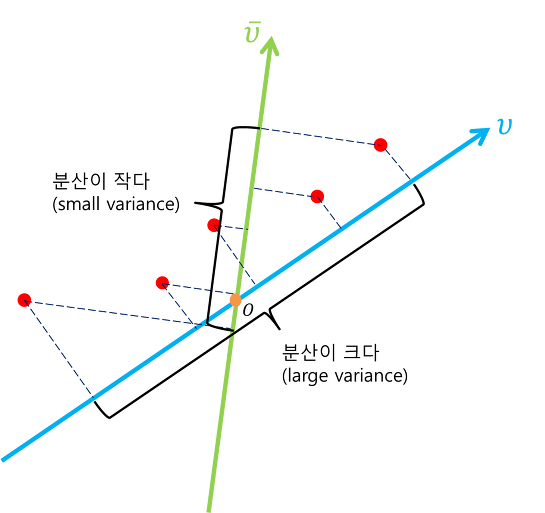


주성분 분석은 여러 피처가 통계적으로 서로 상관관계가 없도록 변환시키는 방법. 피쳐 $p$개가 있다고 가정하면 각 피쳐 벡터는 $x_1,x_2,\dots,x_p$라고 나타냄. 주성분 분석은 오로지 공분산 행렬(Covariance matrix)에만 영향을 받음.

공분산 행렬 참고 : https://angeloyeo.github.io/2019/07/27/PCA.html

참고 : ratgo blog
변수가 여러 개인 다변량 데이터에선 변수 간 관련성, 즉 상관성(correlation)이 매우 중요한 문제가 됩니다. 확률변수 X의 값이 X의 평균보다 클 때 Y의 값도 Y의 평균보다 커지고, X의 값이 X의 평균보다 작을 때에는 Y의 값도 Y의 평균보다 작아지는 경향이 있으면 표준화된 X와 Y의 곱인 상관계수(correlation coefficient)는 양의 값을 가질 가능성이 큽니다. 바꿔 말하면 두 확률변수의 직선 관계가 얼마나 강하고 어떤 방향인지를 나타내는 값이라고 볼 수 있습니다.

확률변수 X와 Y의 상관계수와 공분산(Covariance)는 다음과 같이 정의되는데요, 공분산을 X, Y의 표준편차로 나누어 표준화한 값이 X와 Y의 상관관계라고 할 수 있겠습니다. (N=데이터 개수, u1=X의 평균, u2=Y의 평균, s1=X의 표준편차, s2=Y의 표준편차)

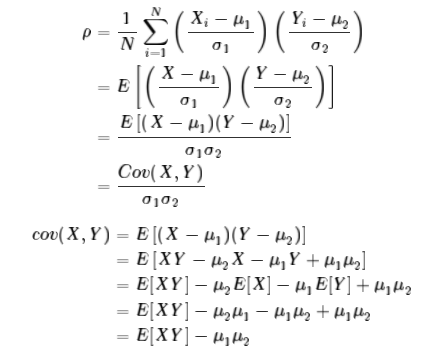


### PCA 구하는 과정

 축을 구하는 과정을 단계별로 살펴보자,


 1) 공분산(Covariance)

 보통 분산은 한 개의 특정한 변수의 데이터 변동을 의미하나, 공분산은 두 변수 간의 변동을 의미함.

 **공분산 행렬은 여러 변수와 관련된 공분산을 포함하는 정방형 행렬이며, 대칭 행렬이다.**

 먼저, 주성분(PC)를 구하기 위해서는 공분산에 대해 알아야 한다. 공분산(covariance)은 2개의 특성(또는 변수)간의 상관정도를 나타낸 값이다.

공분산 행렬(Covariance matrix)이란 데이터의 좌표 성분들 사이의 공분산 값을 원소로 하는 행렬로서 데이터의 i번째 좌표 성분과 j번째 좌표 성분의 공분산 값을 행렬의 i행 j열 원소값으로 하는 행렬.

예를들어, 아래의 그림과 같이 ​ 두 개의 특성에 대해 공분산을 구하면 다음과 같다.

<figure>
<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile5.uf.tistory.com%2Fimage%2F997C013C5B8A49951B60F9'>
<figure>



- $\mathbf{X}, \mathbf{Y}$에 대한 각 기대값

$$
E[\mathbf{X}] = \mu, \quad E[\mathbf{Y}] = v
$$

- 공분산 $cov(\mathbf{X}, \mathbf{Y})$는 다음과 같이 나타낼 수 있다.

$$
\begin{align*}
cov(\mathbf{X}, \mathbf{Y}) &= E[\left( \mathbf{X} - \mu \right)\left( \mathbf{Y} - v \right)] \\ &= E[\mathbf{XY} - v \mathbf{X} - \mu \mathbf{Y} + \mu v] \\ &= E[\mathbf{XY}] - vE[\mathbf{X}] - \mu E[\mathbf{Y}] + \mu v \\ &= E[\mathbf{XY}] - v \mu -\mu v +  \mu v \\ &= E[\mathbf{XY}] - \mu v
\end{align*}
$$

- 다음은 $n$개의 특성(feature)과 $m$개의 관측치로 구성된 데이터에 대한 공분산 $cov(\mathbf{X})$을 구해보자. 오른쪽의 데이터 행렬에서 각 열벡터의 평균은 $E[X_i - \mu_i]=E[X_i] - \mu_i = \mu_i - \mu_i = 0$이다. $X_i - \mu_i$를 편차라 한다.

![](./images/pca03.png)

$$
cov(\mathbf{X}) = \frac{1}{m-1} \mathbf{X}^{T} \mathbf{X}
$$

#### 2) PCA 계산

PCA의 목적은 원 데이터(original data)의 분산을 최대한 보존하는 축을 찾아 투영(projection)하는 것이다. 예를들어, 평균 0으로 조정한(편차를 구한) 데이터셋 $\mathbf{X}$를 단위벡터 $\vec{e}$인 임의의 축 $P$에 투영한다고 했을 때, $\mathbf{X}$의 투영된 결과는 $\mathbf{X}\vec{e}$로 표현할 수 있다. 이때의 분산은 다음과 같이 나타낼 수 있다.

$$
\begin{align*}
Var\left[ \mathbf{X} \vec{e} \right] &= \frac{1}{m-1} \sum_{i=1}^{m}{\left[ X \vec{e} - E\left( X \vec{e} \right) \right]^{2}} \\ &= \frac{1}{m-1} \sum_{i=1}^{m}{\left[ X \vec{e} - E(X)\vec{e} \right]^{2}}, \quad (E(X) = 0) \\ &= \frac{1}{m-1} \sum_{i=1}^{m}{\left( X \vec{e} \right)^{2}} \\ &= \frac{1}{m-1} \left( \mathbf{X}\vec{e} \right)^{T} \left( \mathbf{X}\vec{e} \right) \\ &= \frac{1}{m-1} \vec{e}^{T} \mathbf{X}^{T} \mathbf{X} \vec{e} \\ &= \vec{e}^{T} \left( \frac{\mathbf{X}^{T} \mathbf{X}}{m-1} \right) \vec{e}, \quad \left( \frac{\mathbf{X}^{T} \mathbf{X}}{m-1} = \mathbf{C} \right) \\ &= \vec{e}^{T} \mathbf{C} \vec{e}
\end{align*}
$$

따라서, PCA는 $Var\left[ \mathbf{X} \vec{e} \right] = \vec{e}^{T} \mathbf{C} \vec{e}$를 목적함수로 하는 최대화 문제이며 이때 제약조건은 $\left\| \vec{e} \right\|^{2} = 1$ 이다.

$$
\text{maximize} \quad \vec{e}^{T} \mathbf{C} \vec{e}
$$
$$
\text{s.t.} \quad \left\| \vec{e} \right\|^{2} = 1
$$

위의 식을 ['서포트벡터머신, SVM'](http://excelsior-cjh.tistory.com/165)에서 살펴본 라그랑제 승수법을 이용하여 계산할 수 있다. 위의 식을 라그랑지안 함수 $L$로 나타내면 다음과 같다.

$$
L\left( \vec{e}, \lambda \right) = \vec{e}^{T} \mathbf{C} \vec{e} - \lambda \left( \vec{e}^{T} \vec{e} -1 \right)
$$

즉, $ \mathbf{C} \vec{e} = \lambda \vec{e} $를 만족하는 $\vec{e}$가 바로 분산 $Var\left[ \mathbf{X} \vec{e} \right]$를 최대화한다.

위의 식에서 $\vec{e}$는 공분산 $\mathbf{C}$의 **고유벡터**(eigenvector)이며, $\lambda$는 $\mathbf{C}$의 **고유값**(eigenvalue)이자 eigenvector로 투영했을 때의 **분산**(variance)이다. 이때, 고유벡터의 열벡터를 **주성분**(PC, principal component)이라고 한다. 따라서, 고유벡터(eigenvector)에 투영하는 것이 분산이 최대가 된다.

** Dimensional reduction ** 의 핵심 아이디어는, 상관도가 높은(interrleated, correlated) 변수들이 많이 존재하는 데이터 집합의 차원 (dimensionality)을 줄이면서, 동시에 데이터 집합에 존재하고 있는 차이(variation, 정보)를 최대한 유지하는 것이다. 즉, 차원을 줄이되 '정보 손실을 최소화'하는 것이다.

여기서 말하는 '정보'란 데이터 간의 거리, 상대적인 위치 관계 등을 의미한다.

차원이 줄어들기 때문에 정보의 손실은 어느 정도 감수해야 한다.


- 원래 공간에서 데이터가 퍼져 있는 정도를 변환된(축소된) 공간에서 얼마나 잘 유지하느냐를 척도로 삼는다.

- 원래 공간의 정보가 변환된 공간에서 얼마나 잘 유지하는지는 변환된 공간에서의 데이터의 분산으로 측정한다.

- 따라서, 변환된 공간에서 데이터의 분산을 최대로 할 수 있는 좌표축을 찾아야 한다.

- 원래 공간에서, 데이터가 분산되어 있는 주요한 방향(Principal direction)을 찾자.


# 참고자료 :  https://www.slideshare.net/JeonghunYoon/07-pca

### 8.3.4 Scikit-Learn에서의 PCA 계산

Scikit-Learn에서는 PCA를 계산할 때, 데이터셋에 대한 공분산의 **고유값 분해(eigenvalue-decomposition)**이 아닌 **특이값 분해(SVD, Singular Value Decomposition)**를 이용해 계산한다. SVD에 대한 자세한 내용은 ['다크프로그래머'님의 블로그](http://darkpgmr.tistory.com/106)에서 확인할 수 있다. 데이터셋 $\mathbf{X}$에 대한 SVD는 다음과 같이 나타낼 수 있다.

$$
\mathbf{X} = \mathbf{U} \Sigma \mathbf{V}^{T}
$$

- $\mathbf{U}$ : $m \times m$ 직교행렬 → $\mathbf{X} \mathbf{X}^{T}$의 eigenvector, $\mathbf{X}$의 **left singular vector**
- $\mathbf{V}$ : $n \times n$ 직교행렬 → $\mathbf{X}^{T} \mathbf{X}$의 eigenvector, $\mathbf{X}$의 **right singular vector**라 하며, PCA의 주성분행렬
- $\Sigma$ : $m \times n$ 대각행렬 → $\mathbf{X} \mathbf{X}^{T}$ 또는 $\mathbf{X}^{T} \mathbf{X}$의 **eigenvalue의 제곱근**을 대각원소로 하는 행렬

그렇다면, 왜 Scikit-Learn은 [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)계산에서 SVD를 사용하는 것일까?

그 이유는 정확히는 모르겠지만 [stackoverflow](https://stackoverflow.com/questions/42291068/why-in-doing-pca-scikit-learn-use-svd-to-get-eigenvalue-while-the-traditional-m?rq=1)에서 확인할 수 있듯이, eigenvalue-decomposition에서는 공분산 행렬을 메모리상에 가지고 있어야하는 반면 SVD는 공분산 행렬을 따로 메모리에 저장할 필요가 없으므로 효율적이기 때문이다.

# 참고 : https://angeloyeo.github.io/2019/08/01/SVD.html

### 8.3.5 예제 데이터를 이용한 PCA 구하기

위에서 살펴본 PCA 구하는 방법을 가지고, 예제 데이터셋에 적용해보자.

In [ ]:
import numpy as np

np.random.seed(4) #재현성 때문에 조정
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3)) # 빈칸을 만들어 놓고 가상 데이터(0,1,2) 채워넣는것. size(60,3) X:60 feautre 3
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

print('X.shape:', X.shape)

In [ ]:
import pandas as pd

df = pd.DataFrame(X, columns=['X_1', 'X_2', 'X_3'])
df.head(10)

#### 1) eigen-decomposition을 이용한 PCA 구하기

eigen-decomposition을 이용해 PCA를 구하기 위해서는 먼저 공분산 행렬을 구해야 한다.

In [ ]:
X_cen = X - X.mean(axis=0)  # 평균을 0으로
X_cov = np.dot(X_cen.T, X_cen) / 59
print(X_cov)

# np.cov()를 이용해 구할 수도 있다.
# print(np.cov(X_cen.T))

위에서 구한 공분산 행렬 `X_cov`에 대해 [`np.linalg.eig`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html)를 이용해 eigenvalue(`w`)와 eigenvector(`v`)를 구할 수 있다.

In [ ]:
w, v = np.linalg.eig(X_cov)

print('eigenvalue :', w)
print('eigenvector :\n', v)

In [ ]:
print('explained variance ratio :', w / w.sum())

#### 2) SVD를 이용한 PCA 구하기

SVD는 공분산 행렬 `X_cov`을 사용하지 않고, `X_cen`의 singular value와 singular vector를 계산한다. 마찬가지로 [`np.linalg.svd`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html)를 이용하여 SVD를 구할 수 있다.

In [ ]:
U, D, V_t = np.linalg.svd(X_cen)

print('singular value :', D)
print('singular vector :\n', V_t.T)

In [ ]:
print('explained variance ratio :', D ** 2 / np.sum(D**2))

### 3) Scikit-Learn을 이용한 PCA 구하기

Scikit-Learn의 [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)를 이용해 간단하게 구할 수 있다. Scikit-Learn은 편차 또한 자동으로 처리해 계산해준다. 아래의 코드에서 `singular vector` 즉 주성분 행렬을 보면 위의 결과와 부호(`-`)가 다른것을 확인할 수 있다. 이는 벡터의 방향만 반대일 뿐 주성분 벡터가 구성하는 축은 동일하다.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X)

In [ ]:
print('singular value :', pca.singular_values_)
print('singular vector :\n', pca.components_.T)

Scikit-Learn 0.18버전에서 부터 공분산 행렬의 eigenvalue 또한 확인할 수 있도록 추가되었다.

In [ ]:
print('eigen_value :', pca.explained_variance_)
print('explained variance ratio :', pca.explained_variance_ratio_)

### 8.3.6 Explained Variance Ratio 와 적절한 차원 수 선택하기

**Explained Variance Ratio**은 각각의 주성분 벡터가 이루는 축에 투영(projection)한 결과의 분산의 비율을 말하며, 각 eigenvalue의 비율과 같은 의미이다.

아래의 코드는 위의 8.3.5에서 구한 주성분 벡터를 이용해 투영한 뒤 분산의 비율 즉, Explained Variance Ratio를 계산한 코드이다.

In [ ]:
# PC1에 projection
pc1 = v[:, 0]
proj1 = np.dot(X, pc1)

# PC2에 projection
pc2 = v[:, 1]
proj2 = np.dot(X, pc2)

# PC3에 projection
pc3 = v[:, 2]
proj3 = np.dot(X, pc3)

proj_list = np.array([proj1.var(), proj2.var(), proj3.var()])

print('variance(==eigenvalue) :', proj_list)
print('explained variance ratio :', proj_list / proj_list.sum())

Scikit-Learn의 `PCA`에서는 `explained_variance_ratio_`를 통해 위의 코드를 단 한줄로 구할 수 있다.

In [ ]:
print('explained variance ratio :', pca.explained_variance_ratio_)

위의 결과의 의미는 원 데이터셋 분산의 `84.2%`가 첫 번째 주성분 축에 놓여 있고, `14.6%`가 두 번째 주성분 축에 놓여 있다는 것을 말한다. 그리고 세 번째 주성분 축에는 `1.1%` 정도로 매우 적은 양의 정보가 들어 있다는 것을 알 수 있다.

따라서, 첫 번째 주성분과 두 번째 주성분을 이용해 3차원의 데이터셋 `X`를 2차원으로 투영할 경우, 원래 데이터셋의 분산에서 `1.1%`를 잃게 된다.

#### 적절한 차원 수 선택하기

'Explained Variance Ratio'를 이용해 축소할 차원의 수를 선택할 수 있다. 예를들어, 누적된 분산의 비율이 `95%`가 되는 주성분 축, 차원을 선택하는 것과 같은 방법이다.

In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print('선택할 차원 수 :', d)

Scikit-Learn의 `PCA`에서는 `n_components`에 `0 ~ 1`사이의 값을 지정해 PCA 계산을 할 수 있다.

In [ ]:
pca = PCA(n_components=0.95)
X_proj = pca.fit_transform(X)

print('principal component vec :\n', pca.components_.T)

# PCA 실습

In [ ]:
# 기본 데이터 분석을 위한 Library
import pandas as pd
import numpy as np

# 시각화 Library
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn에 있는 기본 데이터셋을 가져오기 위한
from sklearn import datasets

# sklearn의 PCA를 통해서 쉽게 PCA 적용가능
from sklearn.decomposition import PCA
# 그렇지 않으면 Matrix만들고 COV 구해서
# eigen_vector, eigen_value를 구해야하는 등 과정이 복잡해진다.

In [ ]:
print(pd.__version__)

In [ ]:
from pandas.plotting import scatter_matrix

#loading dataset
iris = datasets.load_iris()
#creating data frame for pandas
dataframe = pd.DataFrame(iris['data'], columns=iris['feature_names'])
scatter_matrix(dataframe, c=iris['target'],marker='o', s=10,alpha=.8, figsize=(12,8))
#s : marker size # c: target
plt.show()

In [ ]:
X = iris.data
y = iris.target
feature_names = iris.feature_names

df_X = pd.DataFrame(X)
df_Y = pd.DataFrame(y)
df_Y[0].value_counts().plot(kind='bar')
plt.show()

In [ ]:
import seaborn as sns
for i in range(df_X.shape[1]):
    sns.distplot(df_X[i])
    plt.title(feature_names[i])
    plt.show()

In [ ]:
# sklearn을 통해서 PCA 객체 생성 및 PC값을 구할 수 있습니다.
pca = PCA()
pca.fit(X)
PC_score = pca.transform(X)
PC_score[:5]

- Transform을 통해서 아주 쉽게 PC값들을 구할 수 있습니다. array 형식으로 각 성분들의 값이 나타나는 것을 확인할 수 있습니다.

In [ ]:
# pca의 eigen_vector
pca.components_

- pca를 통해 얻은 eigen_vector를 components_를 통해서 확인할 수 있습니다.

PC값의 설명력 정도

explained_variance를 통해서 PC값 들의 설명 정도를 확인 가능

In [ ]:
pca.explained_variance_

- PC값이 클수록 설명력이 높습니다.

- 첫 번째, PC 값이 가장 크므로 가장 설명력이 높은 축일 것으로 생각할 수 있습니다.

- 마지막 두 개의 PC를 보면 값이 낮습니다.

- 마지막 값의 경우는 약 170배 정도의 설명력 차이가 나는 것을 알 수 있습니다. 즉, 거의 설명력이 없다고 생각할 수 있겠습니다. -> 그렇다고 전혀 없는 것은 아닙니다.

In [ ]:
ratio = pca.explained_variance_ratio_
ratio

PC1이 92%의 설명력을 가지고 PC4가 0.5%의 설명력을 가지고 있음.

In [ ]:
df_v = pd.DataFrame(ratio, index=['PC1','PC2','PC3','PC4'], columns=['V_ration'])
df_v.plot.pie(y='V_ration')
df_v

Feature에 따른 분포 확인

X[0].X[1] 을 통해서 IRIS 데이터를 확인


In [ ]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0,1,2] , iris.target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

PCA에 따른 데이터 분포 확인

PC1,PC2에 의한 분포를 확인


In [ ]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0,1,2] , iris.target_names):
    plt.scatter(PC_score[y == i, 0], PC_score[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

# Logistic regression 적용

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
clf = LogisticRegression(max_iter=1000, random_state=0,
                        multi_class='multinomial')
clf.fit(X,y)
pred = clf.predict(X)
confusion_matrix(y,pred)

In [ ]:
clf.fit(PC_score,y)
pred = clf.predict(PC_score)
confusion_matrix(y,pred)


두 값이 동일한 것을 알 수 있습니다. 모든 feature를 사용했을 때, 설명력이 동일하다고 생각할 수 있겠습니다.
이러한 경우 PCA를 왜 하는지에 대해 의문이 들 수 있습니다. 하지만 사용하는 feature의 개수가 줄어들면 확연하게 차이가 나는 것을 확인할 수 있습니다.

아래에서는 2개의 feature를 사용해서 LogisticRegression을 진행해서 비교해보겠습니다.

Feature 2개

In [ ]:
clf = LogisticRegression(max_iter=1000, random_state=0,
                        multi_class='multinomial')
clf.fit(X[:,:2],y)
pred = clf.predict(X[:,:2])
confusion_matrix(y,pred)

PC score 2개

In [ ]:
clf2 = LogisticRegression(max_iter=1000, random_state=0,
                        multi_class='multinomial')
clf2.fit(PC_score[:,:2],y)
pred = clf2.predict(PC_score[:,:2])
confusion_matrix(y,pred)

두 결과가 확연하게 차이가 나는 것을 확인할 수 있습니다.
PC1이 상당히 많은 설명력을 가지고 있기 때문에 PC1과 PC2만으로도 대부분을 분류할 수 있습니다.
그 덕분에 model의 결과가 상당히 좋게 나온 것을 확인하였습니다.
반면 그냥 iris.data의 feature의 첫 번째와 두 번째는 그다지 설명력이 별로 좋지 못한 것을 확인할 수 있습니다. 이처럼 별 의미 없는 변수가 있을 수 있습니다. 실무에서 feature가 매우 많은 경우에는 이러한 것들을 빼고 계산하는 것이 훨씬 편하겠죠.

# 주성분 분석이 성능을 높여줄까??
- 와인데이터로 검증

In [ ]:
# 사용한 Library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 와인 데이터 불러오기
data = datasets.load_wine()
X = data.data
y = data.target
feature_names = data.feature_names
print(data.target_names)
print(data.feature_names)

In [ ]:
# Train / Test로 데이터 분류
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [ ]:
# 설명 변수들의 분포를 확인하며 정규성을 띄는지 확인해 봅니다.
dfX = pd.DataFrame(x_train)
dfy = pd.DataFrame(y_train)

for i in range(dfX.shape[1]):
    sns.distplot(dfX[i])
    plt.title(feature_names[i])
    plt.show()

In [ ]:
# 종속변수가 골고루 있는지 확인해봅니다.
pd.DataFrame(y)[0].value_counts().plot(kind='bar')

In [ ]:
# 모델 생성 / 최대 iter 2000 / 다중 분류이므로 multi_class 적용
clf = LogisticRegression(max_iter=2000, random_state=0,
                        multi_class='multinomial',
                        solver='sag')
clf.fit(x_train, y_train)

In [ ]:
# 예측 및 결과 확인
pred = clf.predict(x_test)
print(accuracy_score(y_test, pred))

# PCA

In [ ]:
# 모델 생성 및 적용
pca = PCA()
pca.fit(X)

# PC score 구하기
pcscore = pca.transform(X)

PC는 새로운 좌표축을, pcscore는 설명력을 가지는 PC 축들에 데이터를 사영시 켜 가지는 새로운 좌표라고 생각하시면 되겠습니다.

각 PC 축이 가지는 설명력 정도를 pca.explained_variance_를 통해서 알 수 있습니다. 기본적으로 PC 축은 설명력 순서대로 축이 놓여있어서 높은 것들부터 먼저 보입니다.

In [ ]:
pca.explained_variance_

In [ ]:
PC_ratio = pca.explained_variance_ratio_
PC_ratio_df = pd.DataFrame(PC_ratio)
PC_ratio_df.plot(kind='bar', logy=True)

Raw Data Feature VS PCA PC Score

In [ ]:
# train data만을 가지고 pca 생성
pca = PCA()
pca.fit(x_train)
train_score = pca.transform(x_train)
test_score = pca.transform(x_test)

In [ ]:
# pca 적용하지 않은 데이터와 적용한 데이터에
# 동일하게 적용할 로지스틱회귀모델 생성
clf = LogisticRegression(max_iter=2000, random_state=0,
                        multi_class='multinomial',
                        solver='sag')
clf2 = LogisticRegression(max_iter=2000, random_state=0,
                        multi_class='multinomial',
                        solver='sag')

In [ ]:
# 2개의 feature만을 사용해서 모델 생성 및 예측

# Raw Data
clf.fit(x_train[:,:2], y_train)
pred = clf.predict(x_test[:,:2])
cf1 = confusion_matrix(y_test, pred)
print(cf1)
print(accuracy_score(y_test, pred))

# PC score
clf2.fit(train_score[:,:2], y_train)
pred2 = clf2.predict(test_score[:,:2])
cf2 = confusion_matrix(y_test, pred2)
print(cf2)
print(accuracy_score(y_test, pred2))

  첫 두 개의 feature만을 사용해서 모델을 생성하고 test case를 예측하면 큰 차이를 보이는 것을 확인할 수 있습니다. 기존의 Raw Data의 경우는 약 70%의 정확도를 가지고 PCA 적용 모델은 83%의 정확도를 가지고 있습니다. PCA가 더 좋은 성능을 보이고 있습니다.

  하지만, pca의 경우 기본적으로 설명력이 높은 순서대로 정렬이 되어있기 때문에 앞쪽의 데이터를 사용하면 설명력 차이로 인해서 pca를 적용한 모델이 높을 수밖에 없습니다. 그러므로 raw_data 모델의 feature들 중에서 2개를 뽑아서 모델을 생성하고 정확도를 모두 살펴보겠습니다.

In [ ]:
# 조합 case를 만들기 위한 library
from itertools import combinations

# 점수들을 모두 담기 위한 빈 리스트
score_board = []

# 순서가 없고 조합되지 않은 모든 케이스에 대해서 모델을 생성하고 결과를 확인
for comb in combinations(list(range(0,x_train.shape[1])),2):
    clf.fit(x_train[:,comb],y_train)
    pred = clf.predict(x_test[:,comb])
    score = accuracy_score(y_test, pred)
    score_board.append(score)
    print(comb)
    print(score)

대부분의 경우가 pca를 적용한 case보다 낮지만 최대치의 경우는 일반 feature 중에서 설명력이 높은 것 2개를 선택해서 모델을 생성한 경우가 가장 효과가 좋은 것을 알 수 있습니다.

In [ ]:
# 최대 점수 확인
max(score_board)

 데이터와 feature에 따라서 상황은 다르지만 pca가 더 좋거나 raw_data가 더 좋다고 할 수는 없는 것 같습니다. 현재 자신이 분석하는 데이터와 상황에 따라서 적절하게 맞는 것을 확인해서 사용해야 할 것입니다.

가장 높은 정확도는 raw_Data 중에서 뽑는 것이 도 좋은 결과를 가지고 있습니다. 하지만, 위의 연습용 데이터처럼 얼마 되지 않은 데이터의 경우는 큰 문제가 없지만, 현업에서의 아주 큰 데이터와 수백 개가 넘는 feature가 있는 경우에는 모든 경우를 확인하기 어려울 것입니다. feature 간의 관계를 다 파악하고 어떤 독립변수가 설명력이 높은지 찾는 데까지 생각보다 시간이 오래 걸릴 수 있습니다. 따라서, feature selection을 통해서 설명력이 높은 feature들을 찾아 뽑아서 사용해야 할 것입니다.

  실제로 데이터가 이런 경우에는 쉽게 pca를 사용하면 설명력이 높은 경우를 바로 뽑아낼 수 있으므로 수많은 column으로 인해 너무 높은 차원의 계산을 낮은 차원의 계산으로 간단하게 줄일 수 있을 것입니다. 아직 데이터 사이언스를 공부한 지 얼마 되지 않아서 짧은 지식이지만 pca 통해서 프로토타입을 제작하고 간략하게 모델을 생성할 때 좋지 않을까라는 생각을 하였습니다.

### 8.3.8 압축을 위한 PCA

데이터셋의 차원을 축소하게 되면 데이터셋의 크기가 줄어든다. 다음의 예제는 MNIST 데이터셋에 분산의 `95%`만 유지하도록 PCA를 적용한 것이다.

![](./images/mnist.png)

In [ ]:
from tensorflow.keras.datasets import mnist

# MNIST load
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# reshape
train_x = train_x.reshape(-1, 28*28)

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(train_x)  # PCA 계산 후 투영

In [ ]:
print('선택한 차원(픽셀) 수 :', pca.n_components_)

PCA 적용결과 총 784 차원에서 154로 80%정도 차원이 축소된 것을 알 수 있다. 이러한 압축한 데이터셋을 이용해 SVM과 같은 분류알고리즘을 학습 시킬 경우 학습 속도를 빠르게 할 수 있다.

또한, 압축된 데이터셋에 PCA 투영 변환을 반대로 적용하여 다시 원 데이터의 차원(mnist 경우 784)로 복원할 수 있다. 위에서 `5%` 만큼의 정보(분산)을 잃었기 때문에 완벽하게 복원은 할 수 없지만, 원본 데이터와 비슷하게 복원할 수 있다. 이러한 원본 데이터와 복원한 데이터간의 평균 제곱 거리를 **재구성 오차**(reconstruction error)라고 한다. 압축 후 복원하는 과정을 식으로 나타내면 다음과 같다.

$$
\mathbf{X}_{\text{recovered}} = \mathbf{X}_{d \text{-proj}} \mathbf{V}_{d}^{T}
$$

- $\mathbf{X}_{d \text{-proj}} = \mathbf{X} \mathbf{V}_{d}$
- $\mathbf{V}_{d}$ = orthogonal matrix → $\mathbf{V}_{d}\mathbf{V}_{d}^{T} = \mathbf{I}$

아래의 예제는 위의 예제에서 압축한 `X_reduced`에다가 `PCA`의 `inverse_transform()`메소드를 이용해 784차원으로 복원한 코드이다.

In [ ]:
X_recovered = pca.inverse_transform(X_reduced)

In [ ]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

In [ ]:
import matplotlib
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(train_x[::2100])
plt.title("원본", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("압축 후 복원", fontsize=16)
plot_digits(X_recovered[::2100])

### 8.3.9 Incremental PCA (IPCA)

PCA의 단점은 SVD(scikit-learn에서)를 수행하기 위해서는 전체 학습 데이터셋을 메모리에 올려야 한다는 것이다. 이러한 단점을 보완하기 위해 **Incremental PCA(IPCA)** 알고리즘이 개발되었다.

IPCA는 학습 데이터셋을 미니배치로 나눈 뒤 IPCA 알고리즘에 하나의 미니배치를 입력으로 넣어준다. IPCA는 학습 데이터셋이 클때 유용하다.

Scikit-Learn에서는 [`IncrementalPCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.IncrementalPCA.html#sklearn.decomposition.IncrementalPCA)를 통해 Incremental PCA를 사용할 수 있다. 아래의 예제는 MNIST 데이터를 100개의 미니배치로 나눠 PCA를 수행하는 코드이다.

In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for batch_x in np.array_split(train_x, n_batches):
    print(".", end="") # not shown in the book
    inc_pca.partial_fit(batch_x)

X_reduced = inc_pca.transform(train_x)

In [ ]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

In [ ]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(train_x[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

### 8.3.9 랜덤 PCA

Scikit-Learn의 `PCA`에서는 **Randomized PCA**를 제공한다. 이 방법은 첫 $d$개의 주성분에 대해 근사값을 빠르게 찾는다.

In [ ]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(train_x)

In [ ]:
X_reduced.shape

### EigenFace로 해보는 PCA

- 미국의 AT&T와 캠프리지 대학 전산 연구실에서 공동으로 제작한 얼굴 사진 데이터
- 얼굴 인식 등 다양한 분야에서 활용되고 있음
- 일부 데이터가 sklearn에 dataset으로 내장되어 있음

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

faces_all = fetch_olivetti_faces()
print(faces_all.DESCR)

#### 특정 샘플을 선택 후 출력

In [ ]:
import matplotlib.pyplot as plt

K=20
faces = faces_all.images[faces_all.target==K]

N = 2
M = 5

fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05) # 현재 배치되어 있는 subplot들의 위치를 직접 조정한다.
#left,bottom,right,top : subplot의 4면을 위치 조정 / hspace,wspace : subplot간의 간격을 위해 figure의 너비와 높이에 대한 비율 조절
for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(faces[n], cmap = plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
plt.suptitle('Olivetti')
plt.tight_layout()
plt.show()

- 두 개의 성분으로만 분석

In [ ]:
from sklearn.decomposition import PCA

K=20

pca = PCA(n_components=2)

X = faces_all.data[faces_all.target==K]
W = pca.fit_transform(X)

X_inv = pca.inverse_transform(W)

- PCA 후 해당 데이터로 원점으로 복귀한 데이터로 그린 이미지

In [ ]:
N=2
M=5

fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(X_inv[n].reshape(64,64), cmap = plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
plt.suptitle('PCA Result')
plt.tight_layout()
plt.show()

- 원 데이터와 두 개의 eigenface를 비교

In [ ]:
face_mean = pca.mean_.reshape(64,64)
face_p1 = pca.components_[0].reshape(64,64)
face_p2 = pca.components_[1].reshape(64,64)

plt.figure(figsize=(12,7))
plt.subplot(131)
plt.imshow(face_mean,cmap=plt.cm.bone)
ax.grid(False);ax.xaxis.set_ticks([]);ax.yaxis.set_ticks([]);plt.title('mean')
plt.subplot(132)
plt.imshow(face_p1,cmap=plt.cm.bone)
ax.grid(False);ax.xaxis.set_ticks([]);ax.yaxis.set_ticks([]);plt.title('face_p1')
plt.subplot(133)
plt.imshow(face_p2,cmap=plt.cm.bone)
ax.grid(False);ax.xaxis.set_ticks([]);ax.yaxis.set_ticks([]);plt.title('face_p2')
plt.show()

- 첫 번째 성분의 변화

In [ ]:
import numpy as np
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
N=2;M=5;
w = np.linspace(-5,10,N*M)

for n in range(N*M):
    ax = fig.add_subplot(N,M,n+1)
    ax.imshow(face_mean+w[n]*face_p1, cmap=plt.cm.bone)
    ax.grid(False);plt.xticks([]);plt.yticks([])
    plt.title('Weight :' + str(round(w[n])))

plt.tight_layout()
plt.show()

- 평균얼굴(원점)에 가중치를 곱한 face_p1을 더하면 해당 얼굴이 보인다. 오른쪽과 왼쪽을 보는 얼굴로 파악된다

- 두 번째 성분의 변화

In [ ]:
import numpy as np
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
N=2;M=5;
w = np.linspace(-5,10,N*M)

for n in range(N*M):
    ax = fig.add_subplot(N,M,n+1)
    ax.imshow(face_mean+w[n]*face_p2, cmap=plt.cm.bone)
    ax.grid(False);plt.xticks([]);plt.yticks([])
    plt.title('Weight :' + str(round(w[n])))

plt.tight_layout()
plt.show()

- 두번째 얼굴은 정면을 바라보고 있고, 가중치가 더해짐에 따라 점점 무표정이 되거나 웃는 얼굴로 변화하는 것으로 파악됨.

- 두 개의 성분을 겹쳐보자!

In [ ]:
nx,ny = (5,5)
x = np.linspace(-5,8,nx)
y = np.linspace(-5,8,ny)
w1,w2 = np.meshgrid(x,y)
#shape 변경
w1 = w1.reshape(-1,) # 5x5 ->25X1
w2 = w2.reshape(-1,) # 5x5 ->25X1

- 성분 2개에 가중치를 준 것을 출력

In [ ]:
import numpy as np
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N,M,n+1)
    ax.imshow(face_mean+w1[n]*face_p1+w2[n]*face_p2, cmap=plt.cm.bone)
    ax.grid(False);plt.xticks([]);plt.yticks([])
    plt.title('Weight :' + str(round(w1[n],1))+','+str(round(w2[n],1)))

plt.tight_layout()
plt.show()

- 위의 사진들은 원점(평균 얼굴)에서 성분1과 성분2의 사이들에 퍼져있는 사진이라고 생각하면 된다.

- 앞에서 K값을 변경하면 다른 사람들의 얼굴이 나오고, 해당 얼굴로도 PCA를 해보면 정면. 좌우가 아닌 다른 성분으로 분리된 사진들이 나오게 됨.

## 8.4 Kernel PCA

['서포트벡터머신, SVM'](http://excelsior-cjh.tistory.com/165)에서 커널을 이용해 데이터를 저차원에서 고차원으로 매핑시켜 비선형 데이터셋에 SVM을 적용시키는 Kernel SVM에 대해 알아보았다.

이렇게 같은 기법을 PCA에 적용해 비선형 투영으로 차원을 축소할 수 있는데, 이것을 **Kernel PCA**(KPCA)라고 한다. Scikit-Learn의 [`KernelPCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA)를 통해 Kernel PCA를 적용할 수 있다.

## Wine dataset실습

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import KernelPCA

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# 데이터 불러오기
raw_wine = datasets.load_wine()

# 피쳐, 타겟 데이터 지정
X = raw_wine.data
y = raw_wine.target

# 트레이닝/테스트 데이터 분할
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=1)

# 데이터 표준화
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std  = std_scale.transform(X_te)

# kernel PCA
k_pca = KernelPCA(n_components=2, kernel='poly')
k_pca.fit(X_tn_std)
X_tn_kpca = k_pca.transform(X_tn_std)
X_te_kpca = k_pca.transform(X_te_std)

# 차원축소 전후 데이터 차원 비교
print(X_tn_std.shape)
print(X_tn_kpca.shape)

# 고유값 확인
print(k_pca.eigenvalues_)

# 고유벡터 확인
print(k_pca.eigenvectors_)

# 차원축소 이후 데이터셋
kpca_columns = ['kpca_comp1', 'kpca_comp2']
X_tn_kpca_df = pd.DataFrame(X_tn_kpca,
                            columns=kpca_columns)
X_tn_kpca_df['target'] = y_tn
X_tn_kpca_df.head(5)

df = X_tn_kpca_df
markers=['o','x','^']

for i, mark in enumerate(markers):
    X_i = df[df['target']== i]
    target_i = raw_wine.target_names[i]
    X1 = X_i['kpca_comp1']
    X2 = X_i['kpca_comp2']
    plt.scatter(X1, X2,
                marker=mark,
                label=target_i)
plt.xlabel('kernel_pca_component1')
plt.ylabel('kernel_pca_component2')
plt.legend()
plt.show()

# 학습
clf_rf_kpca = RandomForestClassifier(max_depth=2,
                                     random_state=0)
clf_rf_kpca.fit(X_tn_kpca, y_tn)

# 예측
pred_rf_kpca = clf_rf_kpca.predict(X_te_kpca)

# PCA 적용 후 정확도
from sklearn.metrics import accuracy_score
accuracy_kpca = accuracy_score(y_te, pred_rf_kpca)
print(accuracy_kpca)

## Swiss_roll

In [ ]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [ ]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

In [ ]:
lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "선형 커널"), (132, rbf_pca, "RBF 커널, $\gamma=0.04$"), (133, sig_pca, "시그모이드 커널, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced

    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

## 8.5 LLE (Locally Linear Embedding)

**LLE**(Locally Liner Embedding, 지역 선형 임베딩)는 [Nonlinear Dimensionality Reduction by Locally Linear Ebedding](http://www.robots.ox.ac.uk/~az/lectures/ml/lle.pdf) (Roweis et.al) 논문에서 제안된 알고리즘이다. LLE는 **비선형 차원 축소**(NonLinear Dimensionality Reduction, NLDR) 기법으로 '[차원 축소 - PCA, 주성분분석 (1)](http://excelsior-cjh.tistory.com/167)' 포스팅에서 살펴본 PCA와 달리 투영(projection)이 아닌 **매니폴드 학습**(manifold learning) 이다.



![](./images/manifold05.PNG)



LLE는 머신러닝 알고리즘 중 Unsuperviesed Learning에 해당하며, 서로 인접한 데이터들을 보존(neighborhood-preserving)하면서 고차원인 데이터셋을 저차원으로 축소하는 방법이다. 즉, LLE는 입력 데이터셋을 낮은 차원의 단일 글로벌 좌표계(single global coordinate system)으로 매핑하는 알고리즘이다.

### 8.5.1 LLE 알고리즘

LLE의 과정은 아래 논문의 그림과 같이 크게 세 단계로 나눌 수 있다.

1. **Step 1**: Select neighbors
2. **Step 2**: Reconstruct with linear weights
3. **Step 3**: Map to embedded coordinates

![](./images/LLE.png)



LLE 알고리즘을 각 단계별로 자세히 살펴보도록 하자.


### Step 1: Select Neighbors

먼저, $N$-차원($N$-Features)을 가지는 $m$-개의 데이터셋의 각 데이터 포인트 $X_i$에 대해, $X_i$와 가장 가까운 $k$-개의 이웃점($k$-nearest neighbors) $X_j$, $(j=1, \dots, k)$ 들을 선택한다. 여기서 $k$는 하이퍼파라미터(hyper-parmeter)로써 사람이 직접 적절한 개수를 정해준다.

### Step 2: Reconstruct with linear weights

LLE는 'Step 1'에서 선택한 각 데이터 포인트 $\vec{x_i}$와 그리고 $x_i$에 가까운 $k$-개의 이웃점들 $\vec{x_j}$  $(j=1,\dots,k)$는 매니폴드의 **locally linear patch** 상에 있거나 가까이 있을 것이라 가정한다.


이러한 가정을 바탕으로 해당 데이터 포인트 $\vec{x_i}$와 가장 가까운 $k$-개의 이웃들 $\vec{x_j}$로 부터 $\vec{x_i}$를 가장 잘 **재구성(reconstruction)**하는 가중치 $w_{ij}$를 구한다. 즉, 이웃점 $\vec{x_j}$에 대해  $w_{ij}$와의 행렬 곱을 통해 $\sum_{j=1}^{k}{w_{ij}\vec{x}_j} \approx \vec{x}_i$를 만족하는 $w_{ij}$를 구하는 것이다. $\vec{x}_i$와 $\sum_{j=1}^{k}{w_{ij}\vec{x}_j}$ 간의 오차(error)를 Reconstruction error라 하고 다음과 같이 식으로 나타낼 수 있다.
$$
\varepsilon_{i} (\mathbf{w}) = \left\| \vec{x_i} - \sum_{\underset{j \neq i}{j=1}}^{k}{w_{ij}\vec{x_j}} \right\|^{2}
$$

따라서, 위의 식 $\varepsilon_{i}(\mathbf{w})$를 **최소화(minimize)** 하는 문제이며, 이때의 제약식은 $\sum_{j=1}^{k}{w_{ij}} = 1$이다. 이를 식으로 나타내면 다음과 같다.
$$
\text{min} \quad \varepsilon_i (\mathbf{w}) = \left\| \vec{x_i} - \sum_{\underset{j \neq i}{j=1}}^{k}{w_{ij}\vec{x_j}} \right\|^{2}
$$

$$
\text{s.t.} \quad \sum_{\underset{j \neq i}{j=1}}^{k}{w_{ij}} = 1
$$

위의 식에서 $\vec{x_i}, \vec{x_j}$에 어떤 상수 벡터 $\vec{c}$를 더하거나 해도 $w_{ij}$를 최소화하는데 아무런 영향을 주지 않는다.
$$
\begin{align*}
\varepsilon_i(\mathbf{w}) &= \left\| \vec{x_i} + \vec{c} - \sum_{\underset{j \neq i}{j=1}}^{k}{w_{ij} \left( \vec{x_j} + \vec{c} \right)} \right\|^{2} \\ &= \left\| \vec{x}_i + \vec{c} - \sum_{\underset{j \neq i}{j=1}}^{k}{w_{ij}\vec{x}_{j}} - \vec{c} \right\|^{2} \\ &= \left\| \vec{x_i} - \sum_{\underset{j \neq i}{j=1}}^{k}{w_{ij}\vec{x_j}} \right\|^{2}
\end{align*}
$$

만약, 위의 식 $\vec{c} = -\vec{x}_i$ 라고 한다면 아래와 같이 나타낼 수 있다.
$$
\begin{align*}
\varepsilon_i (\mathbf{w}) &= \left\| \sum_{\underset{j \neq i}{j=1}}^{k}{w_{ij}\left( \vec{x}_{j} - \vec{x}_{i} \right)} \right\|^{2} \\ &= \left\| \sum_{\underset{j \neq i}{j=1}}^{k}{w_{ij} \vec{z}_{j}} \right\|^{2}, \quad (\vec{z}_{j} = \vec{x}_{j} - \vec{x}_{i})
\end{align*}
$$


$\mathbf{w}_i = \sum_{j=1}^{k}{w_{ij}}$는 $(k \times 1)$-행렬이고, $\mathbf{z} = \sum_{j=1}^{k}{\vec{z}_{j}}$는 $(k \times N)$-행렬이므로 위의 식을 행렬 형태로 나타내면 아래와 같다.
$$
\begin{align*}
\left\| \sum_{\underset{j \neq i}{j=1}}^{k}{w_{ij} \vec{z}_{j}} \right\|^{2} &= \left( \mathbf{z}^{T} \mathbf{w}_i \right)^{T}\left( \mathbf{z}^{T} \mathbf{w}_i \right) \\ &= \mathbf{w}_{i}^{T} \mathbf{z} \mathbf{z}^{T} \mathbf{w}_{i} \\ &= \mathbf{w}_{i}^{T} \mathbf{G}_{i} \mathbf{w}_{i}, \quad (\mathbf{G}_{i} = \mathbf{z}\mathbf{z}^{T})
\end{align*}
$$

위의 식에서 $\mathbf{G}_{i}$는 symmetric 한 행렬이며, 이러한 행렬을 [**Gram Matrix**](https://en.wikipedia.org/wiki/Gramian_matrix) 라고 한다.  $\mathbf{G}_{i}$는 선택한 데이터 포인트 $\vec{x}_i$에 대응되는 Gram Matrix 이다.

이러한 과정을 통해  $\varepsilon_i (\mathbf{w})$를 최소화 하는 문제를 다음과 같은 식으로 나타낼 수 있다.
$$
\text{min} \quad \varepsilon_i (\mathbf{w}) = \left\| \vec{x_i} - \sum_{\underset{j \neq i}{j=1}}^{k}{w_{ij}\vec{x_j}} \right\|^{2} = \mathbf{w}_{i}^{T} \mathbf{G}_{i} \mathbf{w}_{i}
$$

$$
\text{s.t.} \quad \sum_{\underset{j \neq i}{j=1}}^{k}{w_{ij}} = 1 = \mathbf{1}^{T} \mathbf{w}_{i}
$$

$\mathbf{1}$은 $(k \times 1)$-행렬이 모두 1로 구성된 행렬을 의미한다.

위의 식을 ['서포트벡터머신, SVM'](http://excelsior-cjh.tistory.com/165)에서 살펴본 라그랑제 승수법을 이용하여 계산할 수 있다. 위의 식을 라그랑지안 함수 $L$로 나타내면 다음과 같다 ($\lambda$는 라그랑제 승수이다).
$$
L(\mathbf{w}_{i}, \lambda) = \mathbf{w}_{i}^{T} \mathbf{G}_{i} \mathbf{w}_{i} - \lambda \left( \mathbf{1}^{T} \mathbf{w}_{i} - 1 \right)
$$

이렇게 라그랑지안으로 나타낸 함수 $L$ 을 $\mathbf{w_i}$에 대한 편미분 $\frac{\partial L}{\partial \mathbf{w}_{i}} = 0$을 통해 $\mathbf{w}_{i}$를 구할 수 있다.
$$
\begin{align*}
\frac{\partial L}{\partial \mathbf{w}_{i}} &= \left( \mathbf{G}_{i} + \mathbf{G}_{i}^{T} \right) \mathbf{w}_{i} - \lambda \mathbf{1}, \quad (\mathbf{G}_{i} = \mathbf{G}_{i}^{T}) \\ &= 2 \mathbf{G}_{i} \mathbf{w}_{i} - \lambda \mathbf{1} \\ &= 0
\end{align*}
$$

$$
\therefore \mathbf{w}_{i} = \frac{\lambda}{2} \mathbf{G}_{i}^{-1} \mathbf{1}
$$


### Step 3: Map to Embedded Coordinates

'Step 2'에서 구한 가중치 $w_{ij}$는 데이터 포인트 $\vec{x}_i$와 이웃점들 $\vec{x}_j$간의 지역 선형 관계(locally linear relationship)를 나타낸다. 마지막 단계인 'Step 3'에서는 이러한 관계가 최대한 보존 되도록 데이터를 저차원인 $d$-차원 공간($d < N$)으로 매핑(mapping)한다.  이 때, $\vec{y}_i$를 $d$-차원 공간에서의 $\vec{y}_i$의 상(image, $\vec{x}_i \mapsto \vec{y}_i$를 의미) 이라고 한다면, $\vec{y}_i$와 $d$-차원 공간에서의 이웃점들 $\vec{y}_j$에 대해 재구성(reconstructed)된 $\sum_{j=1}^{k}{w_{ij}} \vec{y}_j$ 사이의 거리를 최소화하는 $\mathbf{Y}$를 찾는 최소화 문제가 된다. 여기서 $w_{ij}$는 'Step 2'에서 구한 $w_{ij}$이다. 이를 식으로 나타내면 다음과 같다.
$$
\text{min} \quad \Phi(\mathbf{Y}) = \sum_{i=1}^{m}{\left\| \vec{y}_{i} - \sum_{\underset{j \neq i}{j=1}}^{k}{w_{ij}\vec{y}_{j}} \right\|^{2}}
$$

이 때, 논문에서는 위의 최소화 문제가 잘 풀리기(well-posed) 위해 다음과 같은 제약식을 추가해 준다.
$$
\text{s.t.} \quad \begin{cases} \frac{1}{m} \sum_{i=1}^{m}{\vec{y}_i} = 0 \\ \\ \frac{1}{m} \mathbf{Y}^{T} \mathbf{Y} = \mathbf{I} \end{cases}
$$
위의 제약식을 살펴보면, ['차원축소 - PCA'](http://excelsior-cjh.tistory.com/167)에서 공분산 구하는 방법을 살펴본 것과 같이 $d$-차원 공간상에 매핑된 $m$-개의 데이터셋($\mathbf{Y}$)에서 데이터 포인트 $\vec{y}_{i}$의 평균은 $0$이고, $\mathbf{Y}$의 공분산(covariance)는 $\mathbf{I}$ (identity) 행렬인 것을 알 수 있고, $\mathbf{Y}$은 symmetric 한것을 알 수 있다.

위의 $\Phi (\mathbf{Y})$는 아래와 같이 풀어서 나타낼 수 있다.
$$
\begin{align*}
\Phi (\mathbf{Y}) &= \sum_{i=1}^{m}{\left\| \vec{y}_{i} - \sum_{\underset{j \neq i}{j=1}}^{k}{w_{ij}\vec{y}_{j}} \right\|^{2}} \\ &= \sum_{i=1}^{m}{\left[ \vec{y}_{i}^{2} - \vec{y}_{i} \left( \sum_{j=1}^{k}{w_{ij} \vec{y}_{j}} \right) - \left( \sum_{j=1}^{k}{w_{ij} \vec{y}_{j}} \right)\vec{y}_{i} + \left( \sum_{j=1}^{k}{w_{ij} \vec{y}_{j}} \right)^{2} \right]} \\ &= \mathbf{Y}^{T}\mathbf{Y} - \mathbf{Y}^{T} (\mathbf{wY}) - (\mathbf{wY})^{T}\mathbf{Y} + (\mathbf{wY})^{T} (\mathbf{wY}) \\ &= \left( \mathbf{Y}^{T} - \mathbf{Y}^{T}\mathbf{w}^{T} \right) \mathbf{Y} - \left( \mathbf{Y}^{T} - \mathbf{Y}^{T}\mathbf{w}^{T} \right) \mathbf{w}\mathbf{Y} \\ &= \mathbf{Y}^{T} \left( \mathbf{I} - \mathbf{w}^{T} \right) \mathbf{Y} - \mathbf{Y}^{T} \left( \mathbf{I} - \mathbf{w}^{T} \right) \mathbf{wY} \\ &= \mathbf{Y}^{T} \left( \mathbf{I} - \mathbf{w}^{T} \right) \left( \mathbf{Y} - \mathbf{wY} \right) \\ &= \mathbf{Y}^{T} \left( \mathbf{I} - \mathbf{w}^{T} \right)\left( \mathbf{I} - \mathbf{w} \right) \mathbf{Y} \\ &= \mathbf{Y}^{T} \left( \mathbf{I} - \mathbf{w} \right)^{T} \left( \mathbf{I} - \mathbf{w} \right) \mathbf{Y}, \quad \left( \mathbf{M} =  \left( \mathbf{I} - \mathbf{w} \right)^{T} \left( \mathbf{I} - \mathbf{w} \right) \right) \\ &= \mathbf{Y}^{T} \mathbf{M} \mathbf{Y}
\end{align*}
$$

따라서, 위의 최소화 문제를 다음과 같이 나타낼 수 있다.
$$
\text{min} \quad \Phi (\mathbf{Y}) = \mathbf{Y}^{T} \mathbf{M} \mathbf{Y}
$$

$$
\text{s.t.} \begin{cases} \frac{1}{m} \sum_{i=1}^{m}{\vec{y}_i} = 0 \\ \\ \frac{1}{m} \mathbf{Y}^{T} \mathbf{Y} = \mathbf{I} \end{cases}
$$


위의 식을 라그랑제 승수 $\alpha$를 이용해 라그랑지안 함수 $L$로 나타내면 아래의 식과 같다.
$$
L(\mathbf{Y}, \alpha) = \mathbf{Y}^{T} \mathbf{M} \mathbf{Y} - \alpha \left( m^{-1} \mathbf{Y}^{T}\mathbf{Y} - \mathbf{I} \right)
$$

이렇게 라그랑지안 함수로 나타낸 함수 $L$을 $\mathbf{Y}$에 대한 편미분 $\frac{\partial L}{\partial \mathbf{Y}} = 0$을 통해 $\mathbf{Y}$를 구할 수 있다.
$$
\begin{align*}
\frac{\partial L}{\partial \mathbf{Y}} &= \left( \mathbf{Y} + \mathbf{Y}^{T} \right) \mathbf{M} - \frac{2}{m} \alpha \mathbf{Y} \\ &= 2 \mathbf{M}\mathbf{Y} - \frac{2}{m} \alpha \mathbf{Y} \\ &= 0
\end{align*}
$$

$$
\therefore \mathbf{M} \mathbf{Y} = \frac{\alpha}{m} \mathbf{Y}
$$


위의 결과에서, $\mathbf{Y} $는 $\mathbf{M} $의 **eigenvectors** 인 것을 알 수 있고, $\frac{\alpha}{m}$은 **eigenvalue**인 것을 알 수 있다. 위의 문제는 $\mathbf{Y}$를 찾는 것이며, PCA와는 다르게 $\mathbf{Y} $ 중에서도 가장 값을 최소화하는 eigenvector인 맨 오른쪽에 위치하는 열벡터이다.

#### 계산 복잡도

LLE 알고리즘의 계산 복잡도는 다음과 같다.

- $k$-개의 가까운 이웃 찾기 : $O(m\log{(m)}n\log{(k)})$
- 가중치 $w_{ij}$ 최적화: $O(mnk^{3})$
- 저차원으로의 매핑: $O(dm^{2})$

마지막의 저차원으로의 매핑의 복잡도에서 $m^{2}$ , 전체 데이터 셋의 제곱이므로 LLE 알고리즘은 대용량의 데이터셋에 적용하기는 어려운 점이 있다.

### 8.5.3 Scikit-Learn을 이용한 LLE 예제

Scikit-Learn에서는 [`LocallyLinearEmbedding`](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html)클래스를 이용해 LLE를 구현할 수 있다. 아래의 예제는 스위스롤 예제 데이터를 LLE를 이용해 차원 축소하는 코드이다.

In [ ]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
lle.fit(X)

In [ ]:
plt.title("LLE를 사용하여 펼쳐진 스위스 롤", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()

## 8.6 다른 차원 축소 기법

위에서 살펴본 PCA, LLE 차원 축소 알고리즘 외에 MDS, IsoMap, t-SNE, LDA 등 다양한 차원 축소 알고리즘들이 있다. 그 중에서 인기있는 차원 축소 알고리즘을 간단하게 알아보도록 하자.

- **MDS**(Multi-Dimensional Scaling): MDS는 데이터 포인트 간의 거리를 보존하면서 차원을 축소하는 기법이다.
- **Isomap**: Isomap은 각 데이터 포인트를 가장 가까운 이웃과 연결하는 식의 그래프를 만든 후 그래프에서 두 노드 사이의 최단 경로를 이루는 노드의 수인  **geodesic distance**를 유지 하면서 차원을 축소한다.
- **t-SNE**(t-distributed Stochastic Neighbor Embedding): t-SNE는 비슷한 데이터는 가까이, 비슷하지 않은 데이터는 멀리 떨어지도록 차원을 축소한다. 주로 시각화에 많이 사용되며, 특히 고차원 공간에 있는 데이터의 군집을 시각화할 때 사용한다.
- **LDA**: LDA는  Supervised learning이며, 분류 알고리즘에 속한다. LDA는 학습 단계에서 클래스를 가장 잘 구분하는 축을 학습하며, 이 축은 데이터가 투영되는 초평면을 정의하는 데 사용할 수 있다. 이러한 초평면으로 데이터를 투영하게 되면 클래스 간의 거리를 멀리 떨어지게 축소할 수 있다.

아래의 예제는 Scikit-Learn을 이용해 MDS, Isomap, t-SNE를 구현한 코드이다.

In [ ]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [ ]:
from sklearn.manifold import MDS, Isomap, TSNE

# MDS
mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

# Isomap
isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

In [ ]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

### 주성분 분석

In [ ]:
mglearn.plots.plot_pca_illustration()


 - PCA 적용해 유방암 데이터셋 시각화하기

In [ ]:
!pip install mglearn
import mglearn

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [ ]:
import numpy as np
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc="best")
fig.tight_layout()

In [ ]:
from sklearn.decomposition import PCA
# 데이터의 처음 두 개 주성분만 유지시킵니다
pca = PCA(n_components=2)
# 유방암 데이터로 PCA 모델을 만듭니다
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환합니다
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태:", str(X_scaled.shape))
print("축소된 데이터 형태:", str(X_pca.shape))

In [ ]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["악성", "양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")
plt.show()

In [ ]:
print("PCA 주성분 형태:", pca.components_.shape)

In [ ]:
print("PCA 주성분:", pca.components_)

In [ ]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")
plt.show()

#### PCA Visualization in python(Plotly)

In [ ]:
import plotly.express as px

df = px.data.iris()
features = ['sepal_width','sepal_length','petal_width','petal_length']

fig = px.scatter_matrix(
    df,
    dimensions = features,
    color = 'species'
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
import plotly.express as px
from sklearn.decomposition  import PCA

df = px.data.iris()
features = ['sepal_width','sepal_length','petal_width','petal_length']

pca = PCA()
compoents = pca.fit_transform(df[features])

labels = {
    str(i) : f'PC {i+1} (var:.1f)%'
    for i, var in enumerate(pca.explained_variance_ratio_*100)
}

fig = px.scatter_matrix(
    compoents,
    dimensions = range(4),
    color = df['species']
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
import plotly.express as px
from sklearn.decomposition  import PCA
import numpy as np

df = px.data.iris()
features = ['sepal_width','sepal_length','petal_width','petal_length']
X = df[features]

pca = PCA(n_components=2)
compoents = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(compoents,x=0,y=1, color = df['species'])

for i,feature in enumerate(features):
    fig.add_annotation(
        ax=0,ay=0,
        axref='x',ayref='y',
        x = loadings[i,0],
        y = loadings[i,1],
        showarrow = True,
        arrowsize=2,
        arrowhead=2,
        xanchor = 'right',
        yanchor = 'top'
    )
    fig.add_annotation(
        x = loadings[i,0],
        y = loadings[i,1],
        ax=0,ay=0,
        xanchor = 'center',
        yanchor = 'bottom',
        text = feature,
        yshift=5
    )
fig.show()

고유 특성 추출

In [ ]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [ ]:
people.target[0:10], people.target_names[people.target[0:10]]

In [ ]:
print("people.images.shape:", people.images.shape)
print("클래스 개수:", len(people.target_names))

In [ ]:
# 각 타깃이 나타난 횟수 계산
counts = np.bincount(people.target)
# 타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

In [ ]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 사이로 스케일 조정합니다.
# (옮긴이) MinMaxScaler를 적용하는 것과 거의 동일합니다.
X_people = X_people / 255.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# 데이터를 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# 이웃 개수를 한 개로 하여 KNeighborsClassifier 모델을 만듭니다
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

In [ ]:
mglearn.plots.plot_pca_whitening()

In [ ]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape:", X_train_pca.shape)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

In [ ]:
print("pca.components_.shape:", pca.components_.shape)

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("주성분 {}".format((i + 1)))

In [ ]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

image_shape = people.images[0].shape
plt.figure(figsize=(20, 3))
ax = plt.gca()

imagebox = OffsetImage(people.images[0], zoom=2, cmap="gray")
ab = AnnotationBbox(imagebox, (.05, 0.4), pad=0.0, xycoords='data')
ax.add_artist(ab)

for i in range(4):
    imagebox = OffsetImage(pca.components_[i].reshape(image_shape), zoom=2,
                           cmap="viridis")

    ab = AnnotationBbox(imagebox, (.285 + .2 * i, 0.4),
                        pad=0.0, xycoords='data')
    ax.add_artist(ab)
    if i == 0:
        plt.text(.155, .3, 'x_{} *'.format(i), fontdict={'fontsize': 30})
    else:
        plt.text(.145 + .2 * i, .3, '+ x_{} *'.format(i),
                 fontdict={'fontsize': 30})

plt.text(.95, .3, '+ ...', fontdict={'fontsize': 30})

plt.rc('text')
plt.text(.12, .3, '=', fontdict={'fontsize': 30})
plt.axis("off")
plt.show()
plt.close()
plt.rc('text')


In [ ]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

In [ ]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")
plt.show()

###NMF(음수 미포함 행렬 분해)

PCA와 거의 비슷.


조건)  non-negative 데이터는 non-negative feature로 설명하는 것이 좋다.

참고 : https://angeloyeo.github.io/2020/10/15/NMF.html



인위적 데이터에 NMF 적용하기

In [ ]:
mglearn.plots.plot_nmf_illustration()

얼굴 이미지에 NMF 적용하기

In [ ]:
mglearn.plots.plot_nmf_faces(X_train, X_test[:3], image_shape)

In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, init='nndsvd', random_state=0, max_iter=1000, tol=1e-2)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("성분 {}".format(i))

In [ ]:
compn = 3
# 4번째 성분으로 정렬하여 처음 10개 이미지를 출력합니다
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

compn = 7
# 8번째 성분으로 정렬하여 처음 10개 이미지를 출력합니다
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

In [ ]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("시간")
plt.ylabel("신호")
plt.margins(0)


In [ ]:
# 원본 데이터를 사용해 100개의 측정 데이터를 만듭니다
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("측정 데이터 형태:", X.shape)

In [ ]:
nmf = NMF(n_components=3, init='nndsvd', random_state=42, max_iter=1000, tol=1e-2)
S_ = nmf.fit_transform(X)
print("복원한 신호 데이터 형태:", S_.shape)

In [ ]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

In [ ]:
models = [X, S, S_, H]
names = ['측정 신호 (처음 3개)',
         '원본 신호',
         'NMF로 복원한 신호',
         'PCA로 복원한 신호']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')
    ax.margins(0)

t-SNE를 이용한 매니폴드 학습

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

In [ ]:
# PCA 모델을 생성합니다
pca = PCA(n_components=2)
pca.fit(digits.data)
# 처음 두 개의 주성분으로 숫자 데이터를 변환합니다
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")
plt.show()

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# TSNE에는 transform 메소드가 없으므로 대신 fit_transform을 사용합니다
digits_tsne = tsne.fit_transform(digits.data)

In [ ]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE 특성 0")
plt.ylabel("t-SNE 특성 1")
plt.show() # 책에는 없음

# 선형판별분석법과 이차판별분석법

선형판별분석법(linear discrimiant analysis,LDA)과 이차판별분석법(quadratic discrimiant analysis, QDA)는 대표적인 확률론적 생성모형(generative model)이다. 가능도 즉,y의 클래스값에 따른 x에 분포에 대한 정보를 먼저 알아낸 후, 베이즈 정리를 사용하여 주어진 x에 대한 y의 확률분포를 찾아낸다.

- 데이터 포인트가 속하는 클래스를 속하는 클래스를 구분하는 판별 함수가 선형(linear) 형태의 함수라는 뜻.

 - 지도 학습적인 접근 방법을 통한 차원 축소 알고리즘입니다.

 - 지도 학습적인 접근 방법을 통한 차원 축소 알고리즘

 - 데이터 셋의 기존 공간으로부터 집단 간 분산과 집단 내 분산의 비율을 최대화하는 기존 공간보다 더 작은 차원의 공간으로 원래 데이터를 투영시킴으로써 차원 축소합니다. 즉, 데이터를 최대한 분리해 주는 기능을 합니다.

LDA는 크게 3단계 과정을 거칩니다.

1. 집단 단 거리를 계산합니다.이를 집단 간 분산(between-class variance)이라고 함.
2. 각 집단 평균과 각 데이터 포인트의 거리를 계산. 이를 집단 내 분산(within-class variance)
3. 기존 데이터 셋의 공간보다 더 작은 차원의 공간을 만드는 것이다.

**이 공간은 집단 간 분산을 최대화하고 집단 내 분산을 최소**로 하는 공간

# 선형 판별 분석(Linear Discriminant Analysis)

참고 : https://mingtory.tistory.com/69

 - 데이터를 특정 한 축에 사영(projection)한 후에 두 범주를 잘 구분할 수 있는 직선을 찾는 것이 목표.


<figure>
<img src = 'http://sebastianraschka.com/images/blog/2014/linear-discriminant-analysis/lda_1.png'>
<figure>

## 가정(Assumptions)
 - 아래의 가정을 만족해야 이 모델을 사용할 수 있다.

 1. 각 클래스 집단은 정규 분포(normal distribution) 형태의 확률분포를 가짐
 2. 각 클래스 집단은 비슷한 형태의 공분산(Covaiance) 구조를 가짐
  -> 각 클래스 집단 모두가 아래의 3가지 형태중 한가지 형태를 띄워야 함.

### Covariace(공분산)
 - 2개의 확률변수의 상관 정도를 나타내는 값

#### 공분산의 3가지 유형

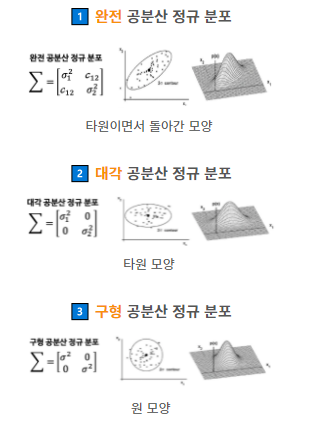

#### LDA는 **판별+차원 축소**의 기능을 한다.

2차원(2가지 독립변수)의 2개의 클라스를 갖는 데이터를 분류하는 문제에서 LDA는 먼저 하나의 차원(1d)에 사영(Projection)하여 차원을 축소시킨다.

<figrue>
<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FZLIzC%2FbtqKTGoLUpw%2Fq5bY1I3mL5b3cvI1TEUdRk%2Fimg.png'>
<figure>


#### LDA의 결정 경계(decision boundary)

사영축(=아래의 그림에서 검은 실선) 에 직교하는 축(=아래의 그림에서 회색 점선)

정사영은 두 분포의 특징이 아래의 목표를 달성해야함.

1. 각 클래스 집단의 평균의 차이가 큰 지점을 결정 경계로 지정 ->아래의 그림에서 초록 선이 긴 것
2. 각 클래스 집단의 분산이 작은 지점을 결정 경계로 지정-> 아래의 그림에서 빨간 선이 짧은 것.


-> 분산 대비 평균의 차이를 극대화 하는 결정 경계를 찾고자 하는 것.

<figure>
<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fcbgtt6%2FbtqKRtDXBJ7%2FAhYp6kdHjKyxPKndvDyCzk%2Fimg.png'>
<figure>

**[Tip]** 사영 데이터의 분포에서 겹치는 영역이 작은 결정 경계를 선택하는 것!!


#### 장점
1. 변수 간 공분산 구조를 반영
2. 공분산 구조가 가정이 살짝 위반되더라고 비교적 robust하게 동작

#### 단점
1. 가장 작은 그룹의 데이터 개수가 독립변수가 개수보다 많아야 함-> 판별분석의 기본적인 조건(참고 : https://mingtory.tistory.com/66)
2. 정규분포가 가정에 크게 벗어나는 경우 잘 동작하지 못함
3. 범주 사이(Y)에 공분산 구조가 많이 다른 경우를 반영하지 못함 ->이차판별분석(QDA)를 통해 해결 가능.


#1. IRIS 데이터 LDA적용

train/test 데이터로 나누기

In [ ]:
# Iris data 불러오기
import seaborn as sns # seaborn을 불러옴.
iris=sns.load_dataset('iris') # iris라는 변수명으로 Iris data를 download함.
X=iris.drop('species',axis=1) # 'species'열을 drop하고 특성변수 X를 정의함.
y_=iris['species'] # 'species'열을 label y를 정의함.

from sklearn.preprocessing import LabelEncoder # LabelEncoder() method를 불러옴
classle=LabelEncoder()
y=classle.fit_transform(iris['species'].values) # species 열의 문자형을 범주형 값으로 전환

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.4, random_state=123, stratify=y)

2. LDA를 사용하기 위해 sklearn.discrimiant_analysis에서 LinearDiscrimiantAnalysis 임포트

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
cld=LinearDiscriminantAnalysis(store_covariance=True)

3. 적용 후 정확도 확인

In [ ]:
cld.fit(X_train, y_train) # LDA 적합
y_train_pred=cld.predict(X_train)
y_test_pred=cld.predict(X_test)


from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred)) # train data에 대한 accuracy
print(accuracy_score(y_test, y_test_pred)) # test data에 대한 accuracy


# QDA(Quadratic Discrimiant Analaysis)
- 서로 다른 공분산 데이터 분류 가능(비선형 분류 가능)
- 서로 다른 공분산 데이터 분류를 위해 샘플이 많이 필요하다.
- 독립변수(설명변수)의 개수가 많을 경우, 추정해야하는 모수가 많아짐->연산량이 큼.

## 모수
- 아래의 식에서 $\beta$에 해당하는 것을 모수라고 함.

$~~~~~~~~~~~~~~~Z = \beta_0+\beta_1 X_1+\beta_2X_2 + \cdots + \beta_p X_p$

QDA 예시)

평균이 각각 (0,0),(1,1),(-1,1)이고 class2와 class3의 공분산 구조는 같지만 class1의 구조가 다르기 때문에 QDA를 사용한다.


<figure>
<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FewNz6B%2FbtqK3D6manr%2F9C0ECf4Hb80BoBVCeBVagk%2Fimg.png'>
<figure>

IRIS 데이터 QDA에 적용

1.iris 데이터 불러오기+test/train 데이터

In [ ]:
# Iris data 불러오기
import seaborn as sns # seaborn을 불러옴.
iris=sns.load_dataset('iris') # iris라는 변수명으로 Iris data를 download함.
X=iris.drop('species',axis=1) # 'species'열을 drop하고 특성변수 X를 정의함.
y_=iris['species'] # 'species'열을 label y를 정의함.

from sklearn.preprocessing import LabelEncoder # LabelEncoder() method를 불러옴
classle=LabelEncoder()
y=classle.fit_transform(iris['species'].values) # species 열의 문자형을 범주형 값으로 전환

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.4, random_state=123, stratify=y)

2. LDA를 사용하기 위해 sklearn.discrimiant_analysis에서 QuadraticDiscriminantAnalysis

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

cqd=QuadraticDiscriminantAnalysis(store_covariance=True)

3. 적용 후 정확도 확인

In [ ]:
cqd.fit(X_train, y_train) # QDA 적합
y_train_pred=cqd.predict(X_train)
y_test_pred=cqd.predict(X_test)


from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred)) # train data에 대한 accuracy
print(accuracy_score(y_test, y_test_pred)) # test data에 대한 accuracy

# Advanced regression

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Advanced Regression/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Advanced Regression/test.csv')

data = pd.concat([train,test],ignore_index = True)

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(train.YearBuilt,train.SalePrice)

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(x = train.GrLivArea, y = train.SalePrice)
plt.xlabel('GrLivArea', fontsize = 13)
plt.ylabel('SalePrice', fontsize = 13)

In [ ]:
# 이상치 강제적으로 drop
train.drop(train[(train["GrLivArea"]>4000)&(train["SalePrice"]<300000)].index,inplace=True)

In [ ]:
#train/test concate
full=pd.concat([train,test], ignore_index=True)

In [ ]:
full.drop(['Id'],axis=1, inplace=True)
full.shape

- Data clearning
  - Missing Data

In [ ]:
#결측치가 큰것 부터 나열
aa = full.isnull().sum()
aa[aa>0].sort_values(ascending=False)

In [ ]:
#Neighborhood : 미국 물리적 주소위치 / LotFrontage : 주택에 연결된 거리의 직선 피트 의 groupby
full.groupby(['Neighborhood'])[['LotFrontage']].agg(['mean','median','count'])

In [ ]:
full["LotAreaCut"] = pd.qcut(full.LotArea,10) #binning

In [ ]:
# LotAreaCut / Neighborhood : 미국 물리적 위치 와  LotFrontage : 주택에 연결된 거리의 직선 피트를 묶고 결측치는 medain으로 채워줌.,
full['LotFrontage']=full.groupby(['LotAreaCut','Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# LotArea와 Neighborhood의 일부 조합을 사용할 수 없으므로 LotAreaCut 만 사용.
full['LotFrontage']=full.groupby(['LotAreaCut'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [ ]:
#결측치 채움.
cols=["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]
for col in cols:
    full[col].fillna(0, inplace=True)

In [ ]:
cols1 = ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish", "GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
for col in cols1:
    full[col].fillna("None", inplace=True)

In [ ]:
# fill in with mode
cols2 = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functional", "Electrical", "KitchenQual", "SaleType","Exterior1st", "Exterior2nd"]
for col in cols2:
    full[col].fillna(full[col].mode()[0], inplace=True)

In [ ]:
full.isnull().sum()[full.isnull().sum()>0]

Feature engineering

In [ ]:
NumStr = ["MSSubClass","BsmtFullBath","BsmtHalfBath","HalfBath","BedroomAbvGr","KitchenAbvGr","MoSold","YrSold","YearBuilt","YearRemodAdd","LowQualFinSF","GarageYrBlt"]
for col in NumStr:
    full[col]=full[col].astype(str)

In [ ]:
full.groupby(['MSSubClass'])[['SalePrice']].agg(['mean','median','count'])

In [ ]:
def map_values():
    full["oMSSubClass"] = full.MSSubClass.map({'180':1,
                                        '30':2, '45':2,
                                        '190':3, '50':3, '90':3,
                                        '85':4, '40':4, '160':4,
                                        '70':5, '20':5, '75':5, '80':5, '150':5,
                                        '120': 6, '60':6})

    full["oMSZoning"] = full.MSZoning.map({'C (all)':1, 'RH':2, 'RM':2, 'RL':3, 'FV':4})

    full["oNeighborhood"] = full.Neighborhood.map({'MeadowV':1,
                                               'IDOTRR':2, 'BrDale':2,
                                               'OldTown':3, 'Edwards':3, 'BrkSide':3,
                                               'Sawyer':4, 'Blueste':4, 'SWISU':4, 'NAmes':4,
                                               'NPkVill':5, 'Mitchel':5,
                                               'SawyerW':6, 'Gilbert':6, 'NWAmes':6,
                                               'Blmngtn':7, 'CollgCr':7, 'ClearCr':7, 'Crawfor':7,
                                               'Veenker':8, 'Somerst':8, 'Timber':8,
                                               'StoneBr':9,
                                               'NoRidge':10, 'NridgHt':10})

    full["oCondition1"] = full.Condition1.map({'Artery':1,
                                           'Feedr':2, 'RRAe':2,
                                           'Norm':3, 'RRAn':3,
                                           'PosN':4, 'RRNe':4,
                                           'PosA':5 ,'RRNn':5})

    full["oBldgType"] = full.BldgType.map({'2fmCon':1, 'Duplex':1, 'Twnhs':1, '1Fam':2, 'TwnhsE':2})

    full["oHouseStyle"] = full.HouseStyle.map({'1.5Unf':1,
                                           '1.5Fin':2, '2.5Unf':2, 'SFoyer':2,
                                           '1Story':3, 'SLvl':3,
                                           '2Story':4, '2.5Fin':4})

    full["oExterior1st"] = full.Exterior1st.map({'BrkComm':1,
                                             'AsphShn':2, 'CBlock':2, 'AsbShng':2,
                                             'WdShing':3, 'Wd Sdng':3, 'MetalSd':3, 'Stucco':3, 'HdBoard':3,
                                             'BrkFace':4, 'Plywood':4,
                                             'VinylSd':5,
                                             'CemntBd':6,
                                             'Stone':7, 'ImStucc':7})

    full["oMasVnrType"] = full.MasVnrType.map({'BrkCmn':1, 'None':1, 'BrkFace':2, 'Stone':3})

    full["oExterQual"] = full.ExterQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

    full["oFoundation"] = full.Foundation.map({'Slab':1,
                                           'BrkTil':2, 'CBlock':2, 'Stone':2,
                                           'Wood':3, 'PConc':4})

    full["oBsmtQual"] = full.BsmtQual.map({'Fa':2, 'None':1, 'TA':3, 'Gd':4, 'Ex':5})

    full["oBsmtExposure"] = full.BsmtExposure.map({'None':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4})

    full["oHeating"] = full.Heating.map({'Floor':1, 'Grav':1, 'Wall':2, 'OthW':3, 'GasW':4, 'GasA':5})

    full["oHeatingQC"] = full.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

    full["oKitchenQual"] = full.KitchenQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

    full["oFunctional"] = full.Functional.map({'Maj2':1, 'Maj1':2, 'Min1':2, 'Min2':2, 'Mod':2, 'Sev':2, 'Typ':3})

    full["oFireplaceQu"] = full.FireplaceQu.map({'None':1, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

    full["oGarageType"] = full.GarageType.map({'CarPort':1, 'None':1,
                                           'Detchd':2,
                                           '2Types':3, 'Basment':3,
                                           'Attchd':4, 'BuiltIn':5})

    full["oGarageFinish"] = full.GarageFinish.map({'None':1, 'Unf':2, 'RFn':3, 'Fin':4})

    full["oPavedDrive"] = full.PavedDrive.map({'N':1, 'P':2, 'Y':3})

    full["oSaleType"] = full.SaleType.map({'COD':1, 'ConLD':1, 'ConLI':1, 'ConLw':1, 'Oth':1, 'WD':1,
                                       'CWD':2, 'Con':3, 'New':3})

    full["oSaleCondition"] = full.SaleCondition.map({'AdjLand':1, 'Abnorml':2, 'Alloca':2, 'Family':2, 'Normal':3, 'Partial':4})




    return "Done!"

In [ ]:
map_values()

In [ ]:
# drop two unwanted columns
full.drop("LotAreaCut",axis=1,inplace=True)
full.drop(['SalePrice'],axis=1,inplace=True)

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
# BaseEstimator : Base class for all estimators in scikit-learn
# TransformerMinin : Mixin class for all transformers in scikit-learn.
# 파이썬은 다중 상속을 지원하며 그것에 의해 Mixins 를 만들 수 있다.
#Mixin 은 클래스에 추가적인 속성이나 메소드를 제공하는 것을 말하는데, 스칼라는 traits 를 통해서 제공하며, 루비등도 제공한다.
#파이썬은 Mixin 을 위한 특별한 키워드는 없으며, 단지 다중상속을 통해서 만들기 때문에 이 과정에서 문제가 생길 소지가 생긴다.
#스칼라의 경우 stackable traits pattern이라고 동일한 메소드가 있을 경우 순서대로 하나씩 실행되지만 파이썬의 경우 덮어 써 버린다.


- 파이썬에서 이름에 Mixin이 있으면 객체의 기능을 확장하려는 목적으로 만들어진 클래스를 나타냅니다. TransformerMixin은 fit_transform() 메서드 하나를 가지고 있으며 이를 상속하는 모든 파이썬 클래스에 이 메서드를 제공합니다. TransformerMixin의 fit_transform() 메서드는 단순히 fit()과 transform()을 메서드 연결(method chaining)한 것입니다.

In [ ]:
class labelenc(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        lab=LabelEncoder()
        X["YearBuilt"] = lab.fit_transform(X["YearBuilt"])
        X["YearRemodAdd"] = lab.fit_transform(X["YearRemodAdd"])
        X["GarageYrBlt"] = lab.fit_transform(X["GarageYrBlt"])
        return X

In [ ]:
class skew_dummies(BaseEstimator, TransformerMixin):
    def __init__(self,skew=0.5):
        self.skew = skew

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        X_numeric=X.select_dtypes(exclude=["object"])
        skewness = X_numeric.apply(lambda x: skew(x))
        skewness_features = skewness[abs(skewness) >= self.skew].index
        X[skewness_features] = np.log1p(X[skewness_features]) #log1p : log(1+x) , log0을 방지. / log(a) , a=0이여야 함.
        X = pd.get_dummies(X)
        return X

In [ ]:
# build pipeline
# skew_dummies : Convert categorical variable into dummy/indicator variables.
pipe = Pipeline([
    ('labenc', labelenc()),
    ('skew_dummies', skew_dummies(skew=1)),
    ])

In [ ]:
# save the original data for later use
full2 = full.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
data_pipe = pipe.fit_transform(full2)

In [ ]:
data_pipe.shape

In [ ]:
data_pipe.head()

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [ ]:
train.shape

In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler
n_train=train.shape[0] # 1458

X = data_pipe[:n_train]
test_X = data_pipe[n_train:]
y= train.SalePrice

X_scaled = scaler.fit(X).transform(X)
y_log = np.log(train.SalePrice)
test_X_scaled = scaler.transform(test_X)

Feature Selection

In [ ]:
from sklearn.linear_model import Ridge,Lasso
lasso=Lasso(alpha=0.001)
lasso.fit(X_scaled,y_log)

In [ ]:
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=data_pipe.columns)

In [ ]:
FI_lasso.sort_values("Feature Importance",ascending=False)

In [ ]:
FI_lasso[FI_lasso["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.show()

In [ ]:
class add_feature(BaseEstimator, TransformerMixin):
    def __init__(self,additional=1):
        self.additional = additional

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        if self.additional==1:
            X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]
            X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"]

        else:
            X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]
            X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"]

            X["+_TotalHouse_OverallQual"] = X["TotalHouse"] * X["OverallQual"]
            X["+_GrLivArea_OverallQual"] = X["GrLivArea"] * X["OverallQual"]
            X["+_oMSZoning_TotalHouse"] = X["oMSZoning"] * X["TotalHouse"]
            X["+_oMSZoning_OverallQual"] = X["oMSZoning"] + X["OverallQual"]
            X["+_oMSZoning_YearBuilt"] = X["oMSZoning"] + X["YearBuilt"]
            X["+_oNeighborhood_TotalHouse"] = X["oNeighborhood"] * X["TotalHouse"]
            X["+_oNeighborhood_OverallQual"] = X["oNeighborhood"] + X["OverallQual"]
            X["+_oNeighborhood_YearBuilt"] = X["oNeighborhood"] + X["YearBuilt"]
            X["+_BsmtFinSF1_OverallQual"] = X["BsmtFinSF1"] * X["OverallQual"]

            X["-_oFunctional_TotalHouse"] = X["oFunctional"] * X["TotalHouse"]
            X["-_oFunctional_OverallQual"] = X["oFunctional"] + X["OverallQual"]
            X["-_LotArea_OverallQual"] = X["LotArea"] * X["OverallQual"]
            X["-_TotalHouse_LotArea"] = X["TotalHouse"] + X["LotArea"]
            X["-_oCondition1_TotalHouse"] = X["oCondition1"] * X["TotalHouse"]
            X["-_oCondition1_OverallQual"] = X["oCondition1"] + X["OverallQual"]


            X["Bsmt"] = X["BsmtFinSF1"] + X["BsmtFinSF2"] + X["BsmtUnfSF"]
            X["Rooms"] = X["FullBath"]+X["TotRmsAbvGrd"]
            X["PorchArea"] = X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]
            X["TotalPlace"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"] + X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]


            return X

In [ ]:
pipe = Pipeline([
    ('labenc', labelenc()),
    ('add_feature', add_feature(additional=2)),
    ('skew_dummies', skew_dummies(skew=1)),
    ])


PCA

In [ ]:
full_pipe = pipe.fit_transform(full)

In [ ]:
full_pipe.shape

In [ ]:
n_train=train.shape[0]
X = full_pipe[:n_train]
test_X = full_pipe[n_train:]
y= train.SalePrice

X_scaled = scaler.fit(X).transform(X)
y_log = np.log(train.SalePrice)
test_X_scaled = scaler.transform(test_X)

In [ ]:
pca = PCA(n_components=30)

In [ ]:
X_scaled=pca.fit_transform(X_scaled)
test_X_scaled = pca.transform(test_X_scaled)

In [ ]:
X_scaled.shape, test_X_scaled.shape

modeling

In [ ]:
# define cross validation strategy
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
models = [LinearRegression(),Ridge(),Lasso(alpha=0.01,max_iter=10000),RandomForestRegressor(),GradientBoostingRegressor(),SVR(),LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),SGDRegressor(max_iter=1000,tol=1e-3),BayesianRidge(),KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor(),XGBRegressor()]

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra","Xgb"]
for name, model in zip(names, models):
    score = rmse_cv(model, X_scaled, y_log)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

In [ ]:
class grid():
    def __init__(self,model):
        self.model = model

    def grid_get(self,X,y,param_grid):
        grid_search = GridSearchCV(self.model,param_grid,cv=5, scoring="neg_mean_squared_error")
        grid_search.fit(X,y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])

Lasso

In [ ]:
grid(Lasso()).grid_get(X_scaled,y_log,{'alpha': [0.0004,0.0005,0.0007,0.0009],'max_iter':[10000]})

Ridge

In [ ]:
grid(Ridge()).grid_get(X_scaled,y_log,{'alpha':[35,40,45,50,55,60,65,70,80,90]})

SVR

In [ ]:
grid(SVR()).grid_get(X_scaled,y_log,{'C':[11,13,15],'kernel':["rbf"],"gamma":[0.0003,0.0004],"epsilon":[0.008,0.009]})

Kernel Ridge

In [ ]:
param_grid={'alpha':[0.2,0.3,0.4], 'kernel':["polynomial"], 'degree':[3],'coef0':[0.8,1]}
grid(KernelRidge()).grid_get(X_scaled,y_log,param_grid)

Elastic Net

In [ ]:
grid(ElasticNet()).grid_get(X_scaled,y_log,{'alpha':[0.0008,0.004,0.005],'l1_ratio':[0.08,0.1,0.3],'max_iter':[10000]})

ensemble

- weight averge
  - Average base models accoring to their weights

In [ ]:
class AverageWeight(BaseEstimator, RegressorMixin):
    def __init__(self,mod,weight):
        self.mod = mod
        self.weight = weight

    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.mod]
        for model in self.models_:
            model.fit(X,y)
        return self

    def predict(self,X):
        w = list()
        pred = np.array([model.predict(X) for model in self.models_])
        # for every data point, single model prediction times weight, then add them together
        for data in range(pred.shape[1]):
            single = [pred[model,data]*weight for model,weight in zip(range(pred.shape[0]),self.weight)]
            w.append(np.sum(single))
        return w

In [ ]:
lasso = Lasso(alpha=0.0005,max_iter=10000)
ridge = Ridge(alpha=60)
svr = SVR(gamma= 0.0004,kernel='rbf',C=13,epsilon=0.009)
ker = KernelRidge(alpha=0.2 ,kernel='polynomial',degree=3 , coef0=0.8)
ela = ElasticNet(alpha=0.005,l1_ratio=0.08,max_iter=10000)
bay = BayesianRidge()

In [ ]:
# assign weights based on their gridsearch score
w1 = 0.02
w2 = 0.2
w3 = 0.25
w4 = 0.3
w5 = 0.03
w6 = 0.2

In [ ]:
weight_avg = AverageWeight(mod = [lasso,ridge,svr,ker,ela,bay],weight=[w1,w2,w3,w4,w5,w6])

In [ ]:
score = rmse_cv(weight_avg,X_scaled,y_log)
print(score.mean())

Stacking

In [ ]:
class stacking(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,mod,meta_model):
        self.mod = mod
        self.meta_model = meta_model
        self.kf = KFold(n_splits=5, random_state=42, shuffle=True)

    def fit(self,X,y):
        self.saved_model = [list() for i in self.mod]
        oof_train = np.zeros((X.shape[0], len(self.mod)))

        for i,model in enumerate(self.mod):
            for train_index, val_index in self.kf.split(X,y):
                renew_model = clone(model)
                renew_model.fit(X[train_index], y[train_index])
                self.saved_model[i].append(renew_model)
                oof_train[val_index,i] = renew_model.predict(X[val_index])

        self.meta_model.fit(oof_train,y)
        return self

    def predict(self,X):
        whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1)
                                      for single_model in self.saved_model])
        return self.meta_model.predict(whole_test)

    def get_oof(self,X,y,test_X):
        oof = np.zeros((X.shape[0],len(self.mod)))
        test_single = np.zeros((test_X.shape[0],5))
        test_mean = np.zeros((test_X.shape[0],len(self.mod)))
        for i,model in enumerate(self.mod):
            for j, (train_index,val_index) in enumerate(self.kf.split(X,y)):
                clone_model = clone(model)
                clone_model.fit(X[train_index],y[train_index])
                oof[val_index,i] = clone_model.predict(X[val_index])
                test_single[:,j] = clone_model.predict(test_X)
            test_mean[:,i] = test_single.mean(axis=1)

In [ ]:
from sklearn.impute import SimpleImputer
# must do imputer first, otherwise stacking won't work, and i don't know why.
a = SimpleImputer().fit_transform(X_scaled)
b = SimpleImputer().fit_transform(y_log.values.reshape(-1,1)).ravel()

In [ ]:
stack_model = stacking(mod=[lasso,ridge,svr,ker,ela,bay],meta_model=ker)

In [ ]:
score = rmse_cv(stack_model,a,b)
print(score.mean())

현실 세계에서 만나게 되는 데이터에 항상 label이 주어지는 것은 아닙니다. 이러한 unlabeled 데이터에 숨겨진 패턴을 찾아내고 구조화하는 머신러닝 기법을 비지도학습(unsuppervised learning)이라고 합니다. Clustering(클러스터링)은 가장 널리 알려진 비지도학습 중 한 가지 기법으로, 비슷한 유형의 데이터를 그룹화함으로써 unlabeled  데이터에 숨겨진 구조를 파악합니다. 클러스터링을 응용하여 다음과 같이 구현가능합니다.

- Recommendation Engines(추천 엔진): 개인화된 사용자 경험을 제공하기위해 상품들을 그룹화 합니다
- Search Engines(검색 엔진): 뉴스 토픽들과 검색 결과를 그룹화 합니다
- Market Segmentation(시장 세분화): 지역, 인구, 행동 등을 바탕으로 고객을 그룹화 합니다


##군집화(Clustering)
- 군집은 각 데이터의 유사성(거리)를 측정한 후 유사성이 높은(거리가 짧은) 데이터끼리 집단으로 분류하는 것.
- 대표적인 비지도학습 알고리즘
- 레이블이 없는 데이터를 그룹화하는 알고리즘


sklearn의 clustering 알고리즘
![clustering](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)

- 데이터 간 유사도(거리) 측정 방법

![distance](https://miro.medium.com/max/1400/1*n97707zKau5I5libJWl_XQ.png)





### K-means Clustering

K-Means 알고리즘은 가장 유명한 클러스터링 알고리즘입니다. “K”는 주어진 데이터로부터 그룹화 할 그룹, 즉 클러스터의 수를 말합니다. “Means”는 각 클러스터의 중심과 데이터들의 평균 거리를 의미합니다. 이 때 클러스터의 중심을 centroids 라고 합니다.

K-Means 알고리즘은 다음과 같은 과정으로 수행됩니다.

1. 데이터셋에서 K 개의 centroids를 임의로 지정합니다.
2. 각 데이터들을 가장 가까운 centroids가 속한 그룹에 할당합니다.
3. 2번 과정에서 할당된 결과를 바탕으로 centroids를 새롭게 지정합니다.
4. 2 ~ 3번 과정을 centroids가 더 이상 변하지 않을 때 까지 반복합니다.

<figure>
<img src = 'https://i.imgur.com/WL1tIZ4.gif'>
<figure>
출처 : https://eunsukimme.github.io/ml/2019/12/16/K-Means/


## Defination

데이터 $X = (x_1,\cdots, X_N), X_i \in R^{d}$에 대해서 $X$의 클러스터(또는 파티션)을 $S ={S_1,\cdots,S_k}라 하자.$

$~~~~~~~~~\cup_{i=1}^{k} F_{i} = X, S_i \cap S_j \neq \emptyset, \forall i \neq  j $

K-means는 클러스터  $S$의 분산 또는 within-cluster sum of squared(WCSS)를 최소화 하는 클러스터를 S를 찾는 문제이다. 즉, 다음 목적함수를 최소화 한다.


<figure>
<img src = 'https://i.stack.imgur.com/73EAw.png'>
<figrue>


<figure>
<img src = 'https://cdn-images-1.medium.com/max/800/1*elDpzAzFuvFtm62DusqI_Q.png'>
<figrue>


$~~~~~~~~~~$

여기서 $\mu_{i}$ 는 클러스터  $S_{i}$의 샘플 평균을 의미한다.

$~~~~~~~~~~~~ \mu_{i} := {\dfrac{1}{|S_i|}}  \sum_{x \in S_{i}} x $

### 참고)

- K-means는 NP-hard 문제로 글로벌 해로 찾는 것은 어렵기 때문에 heuristic algorithm으로 로컬 해를 찾음.

- NP hard 문제는 모든 NP 문제보다 어려운 문제라고 했으며, NP 문제는 비결정론적 튜링머신으로 “풀 수 있는” 문제라고 했다. 즉, NP-완전 문제는 “풀 수 있는” NP문제 중 가장 어려운 문제이다.


#### 아이디어

$S = \{S_{1}, \cdots,S_{k}\}$ 가 WCSS 목적함수의 글로벌 해라고 가정해보자.

그렇다면 모든 $i=1,\cdots,k$에 대해서 $S_{i}에 있는 샘플을 기준으로 %Euclidean distance$가 가장 가까운 샘플평균은 $\mu_{i}$이다. 즉, $x \in S_{i}$이면 다음 부등식을 만족한다.

$~~~~~~~~~~||x-\mu_{i}|| \le ||x-\mu_{j}||~~\forall, 1 \le j \le k$


WCSS 목접함수가 최소가 되는 클러스터인 경우 샘플들은 각 클러스터의 샘플평균과 가까운 점들의 모임으로 해석할 수 있다(물론 특정 샘플이 두 샘플 평균과 거리가 동일한 거리에 있다면 유일하게 결정되지 않는다.)

그래서 heuristic algorithm은 클러스터 $S = \{S_1,\cdots,S_k\}$를 샘플평균으로 매개화하여 글로벌 해 샘플평균 ${\mu}_1,{\cdots},{\mu}_k$를 찾는다.

#### Standard algorithm

- 센트로이드(Centroid)로 클러스터를 매개화(센트로이드에 가까이 있는 점들의 모임) 하고 클러스터 내에 있는 샘플들과 샌트로이드의 Edclidean 거리 제곱합이 최소가 되는 방식으로 센트로이드를 업데이트한다.

- K개의 초기 센트로이드 $m_1^(1),\cdots,\m_k^{k}, m_{i}^(1)$



### 군집
 - k-평균 군집

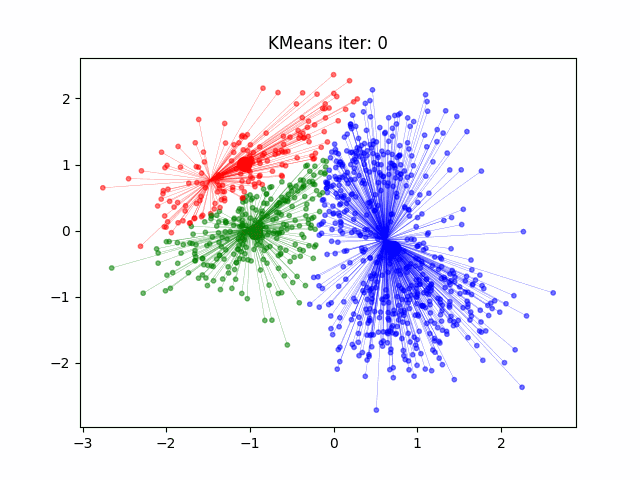

In [ ]:
mglearn.plots.plot_kmeans_algorithm()

In [ ]:
mglearn.plots.plot_kmeans_boundaries()

In [ ]:
!pip install mglearn

In [ ]:
import mglearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적으로 2차원 데이터를 생성합니다
X, y = make_blobs(random_state=1)

# 군집 모델을 만듭니다
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

In [ ]:
print(kmeans.labels_)

In [ ]:
print(kmeans.predict(X))

In [ ]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 두 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])
plt.show()

- k-평균 알고리즘이 실패하는 경우

In [ ]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc='best')
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

In [ ]:
# 무작위로 클러스터 데이터 생성합니다
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경합니다
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 나타냅니다
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

In [ ]:
# two_moons 데이터를 생성합니다(이번에는 노이즈를 조금만 넣습니다)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 두 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 표시합니다
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2, edgecolors='k')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

벡터 양자화 또는 분해 메소드로서의 k-평균

In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=42)
nmf = NMF(n_components=100, init='nndsvd', max_iter=1000, tol=1e-2, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("추출한 성분")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(8, 8))
fig.suptitle("재구성")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
        X_reconstructed_nmf):

    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("원본")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")
plt.show()


In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired', edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired', edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")
print("클러스터 레이블:\n", y_pred)

In [ ]:
distance_features = kmeans.transform(X)
print("클러스터 거리 데이터의 형태:", distance_features.shape)
print("클러스터 거리:\n", distance_features)

In [ ]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

# Though the following import is not directly being used, it is required
# for 3D projection to work with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8, n_init="auto")),
    ("k_means_iris_3", KMeans(n_clusters=3, n_init="auto")),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

### Kmeans의 K값을 정하는 기준 : Elbow Method, Silhouette Score(실루엣 스코어)
- 참고 : https://nicola-ml.tistory.com/66

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# K-Means 알고리즘
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# CLustering 알고리즘의 성능 평가 측도
from sklearn.metrics import homogeneity_score, \
    completeness_score, v_measure_score, \
    adjusted_rand_score, silhouette_score, rand_score,calinski_harabasz_score
# homogeneity_score : Homogeneity metric of a cluster labeling given a ground truth.
# Homogeneity은 0.0에서 1.0까지(큰 값이 좋다)이며 1.0은 각 군집들이 각 범주의 데이터 점들만을 포함함을 나타낸다
# completeness_score : Compute completeness metric of a cluster labeling given a ground truth.
# v_measure_score : V-measure cluster labeling given a ground truth.
# V-measure는 Homogeneity와 Completeness의 조합 평균이다.
# adjusted_rand_score : Rand index adjusted for chance.
# silhouette_score : Compute the mean Silhouette Coefficient of all samples.
# 목적 변수가 없다면 silhouette_score를 검토한다.
# rand_score : Rand index.
# calinski_harabasz_score: Compute the Calinski and Harabasz score.
from sklearn.metrics.cluster import contingency_matrix
# contingency_matrix : Build a contingency matrix describing the relationship between labels.

from sklearn.preprocessing import StandardScaler  # 변수 표준화
from sklearn import metrics

# iris data
iris = load_iris()
X = iris.data
y = iris.target

# 변수 표준화
scaler = StandardScaler() # 변수 표준화 클래스
scaler.fit(X)  # 표준화를 위해 변수별 파라미터(평균, 표준편차) 계산
# scaler.mean_, scaler.scale_
X_std = scaler.transform(X)
#X_std = scaler.fit_transform(X)

- 모형 적합
    - K-means++ 참고)https://hleecaster.com/k-means-clustering-concept/

In [ ]:
km = KMeans(
    n_clusters=3,
    init="k-means++",
    max_iter=100,
    n_init=1
)
km.fit(X_std) # k-means alogorithm 적합
km.labels_    # 결과: 레코드별 군집 라벨

In [ ]:
centers = km.cluster_centers_ # 결과: 군집별 컬럼별 중심평균

In [ ]:
km.inertia_ # 목적함수의 값

In [ ]:
# Clustering 결과 scatter plot
K = 3
cluster = km.labels_
color=['blue','green','cyan']
for k in range(K):
    data = X_std[cluster == k]
    plt.scatter(data[:, 0],data[:, 1], c=color[k], alpha=0.8, label='cluster %d' % k)
    plt.scatter(centers[k, 0],centers[k, 1], c='red', marker="x")
plt.legend(fontsize=12, loc='upper right') # legend position
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

- 모형 평가

In [ ]:
print('contingency_matrix\n' , contingency_matrix(y, km.labels_))
print('Silhouette Coefficient: %.3f' % silhouette_score(X_std, km.labels_, sample_size=1000))
print('Calinski and Harabasz score: %.3f' % calinski_harabasz_score(X_std, km.labels_))

print("Homogeneity: %0.3f" % homogeneity_score(y, km.labels_))
print("Completeness: %0.3f" % completeness_score(y, km.labels_))
print("V-measure: %0.3f" % v_measure_score(y, km.labels_))
print("Rand-Index: %0.3f" % rand_score(y, km.labels_))
print("Adjusted Rand-Index: %.3f" % adjusted_rand_score(y, km.labels_))

- 군집의 수 결정 방법: elbow method
    - 군집의 개수와 군집내 변동의 합을 그래프로 나타내고, 변동량의 변화가 작아지는 지점의 군집의 수를 적정 군집의 수로 결정함

In [ ]:
Objectives = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_std)
    Objectives.append(km.inertia_)

plt.plot(K, Objectives, 'bx-')
plt.xlabel('k')
plt.ylabel('Objectives')
plt.xlabel('number of clusters')
plt.show()

- Hierachical clustering by ‘scipy’ library

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

fig = plt.figure(figsize=(20,10))
linked = linkage(X_std, 'average')
dendrogram(linked)
plt.title('average linkage')
plt.show()

### 실루엣 분석

- 실루엣 분석 : 각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는지를 나타내는 것. 다른 방법으로는 Elbow method가 있음(Inertia)

- 실루엣 계수(Silhouette Coefficient)
    - 각각의 샘플마다 계산
    - a : 나와 같은 군집에 속한 샘플들 사이의 평균 거리
    - b : 나랑 그 다음으로 가까운 군집에 속한 샘플들 사이의 평균 거리

${\hspace {1.5cm}} \cdot -1 {\leq}  S_i {\leq} +1$ 을 가짐.


즉, a가 낮고, b가 높으면 잘 군집화 된 것!

-> 나의 군집의 샘플들과는 가깝고, 다른 군집과는 멀기 때문입니다.

${\hspace {6cm}} S_i  = {\dfrac{b_i - a_i} {max(a_i,b_i)}}$

- 실루엣 스코어 (Silhouette Score)
    - 전체 실루엣 계수의 평균
    - mean$(S_i)$
- 높을수록 좋지만, 높다고 무조건 좋은 군집화라고 말하기는 어려움



실루엣 분석 실습


scikit-learn을 이용해서 실루엣 계수와 실루엣 스코어를 구해보고,
시각화를 통한 군집 수 최적화까지 해보자

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)

# 군집화 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF)

# 개별 데이터에 대한 군집 결과를 cluster 컬럼으로 DataFrame에 저장
irisDF['cluster'] = kmeans.labels_

irisDF.head(10)

In [ ]:
# iris 의 모든 개별 데이터에 실루엣 계수값을 구함
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

In [ ]:
print(np.mean(score_samples))
print(silhouette_score(iris.data, irisDF['cluster']))

In [ ]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화
visualize_silhouette([ 2, 3, 4, 5], X)

- 각 군집별 실루엣 스코어를 나타내고, 실루엣 계수를 시각화한 것임
- 각 군집별 샘플의 실루엣 계수를 아래에서 위로 오름차순으로 쭉 이어서 만든 것
- 실루엣 스코어만 보면 군집이 2일 때가 제일 좋지만, 보통 군집이 4일 때처럼 개별 - 군집의 실루엣 계수의 평균값의 편차가 작은 게 좋다.
- 군집 수 최적화는 이런식으로 시각화를 주로 이용함!

- iris dataset

In [ ]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4,5 ], iris.data)

1. K-Centroid clustering (k-중심 군집)
2. K-means clustering (K-평균 군집)
3. K-median clustering (K-중앙갑 군집)
4. K-Medoids clustering (K- 메도이드 군집)

### K-중심군집(K-centroid Clustering) 이란?


- 프로토타입 기반 군집화(Prototype-based Clustering)는 미리 정해놓은 각 군집의 프로토타입에 각 객체가 얼마나 유사한가를 가지고 군집을 형성하는 기법이다.



- K-중심군집에서는 연속형 데이터의 경우 평균(mean)이나 중앙값(median)을 그 군집의 프로토 타입으로 하며,이산형 데이터의 경우 최빈값(mode)이나 메도이드(medoid)로 해당 군집을 가장 잘 나타내는 측도를 정해 프로토타입으로 정하게 된다.
    - '평균(Mean)'을 쓰는 K-means Clustering, '중앙값(Median)'을 쓰는 K-median Clustering,'메도이드(Medoid)'를 쓰는 K-medoid Clustering 등으로 세분화되며 이들을 모두 묶어서 K-중심군집(K-centroid Clustering)이라고 한다.




- 여기서 K 는 군집의 수(number of clusters)를 나타내는 모수(parameter)로서,

분석가가 사정에 정의해주어야하며, K를 미리 지정해주어야 하는 군집분석 기법으로는 이번 주제인 K-중심군집(K-centroid Clustering) 외에 퍼지군집(Fuzzy Clustering), 혼합분포 군집(Mixture Distribution Clustering) 등이 있다.




- K-중심군집(K-centroid Clustering) 의 원리\
    - 1. 군집 내 응집도 최대화(maximizing cohesion within cluster)
        - : 군집 내 중심(centroid)과 해당 군집의 각 객체 간 거리의 합 최소화 하는것
    - 2. 군집 간 분리도 최대화(maxizing separation between clusters)
        - : 각 군집의 중심(centroid) 사이의 거리 합을 최대화하는것

의 두 가지 목적함수를 만족하는 솔루션을 찾는것이다.




- 즉, 군집분석은 결국 위의 두 목적함수에 대한 최적화 (optimization of global objective function) 문제임을 알 수 있다.

- 복잡도(complexity)를 살펴보면, 군집의 수가 k, 차원의 수가 d, 객체의 수가 n 일 때 이다.

- 기본적으로 객체의 수(n)가 많을 수록 시간이 오래걸리며, 특히 변수의 수(d)와 군집의 수(k)가 늘어날 수록 지수적으로 계산 시간이 증가함을 알 수 있다. 따라서 허접한 변수들 몽땅 때려넣고 군집화하라고 컴퓨터한테 일 시킬 것이 아니라, 똘똘하고 핵심적인 변수를 선별해서 차원을 줄인 후에 군집분석을 실행하는 것이 좋다.

- 클러스터링은 데이터 객체 집합을 다수의 그룹으로 쪼개는 작업을 말한다. 유사성과 비슷한 정도는 대상을 정의하는 속성 값을 통해 계산하며 주로 거리 측정법을 사용한다.

- k-means는 평균값을 구하는 연산을 수행하기 때문에 잡음이나 이상치(아웃라이어)에 민감하다. 이러한 단점을 해결하기 위해 나온것이 k-medoids 알고리즘이다.
- k-medoids는 클러스터의 대표값으로 오브젝트의 중심점을 구하는 것이 아니라, 오브젝트 중에서 클러스터를 대표할 수 있는 가장 가까운 대표 오브젝트를 뽑는다. 대표로 뽑히지 않은 나머지 오브젝트는 가장 가까운 대표 오브젝트를 따라 해당 클러스터에 배정한다. 이러한 분할 알고리즘은 불일치의 총합을 최소화 하는 원칙에 따라 각 오브젝트 p와 p가 속한 대표 오브젝트사이의 차이를 절대오차(Absolute criterion) 기준으로| 결정한다.


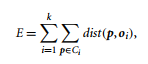

- k-means의 경우 평균을 대표값으로 가져가기 때문에 분산을 기준으로 알고리즘이 진행되는것에 반해 k-medoid는 중앙값을 대표값으로 가져가므로 위 처럼 절대오차를 기준으로 알고리즘이 진행되게 된다.
k-medoid 알고리즘을 가장 일반적으로 실현화한 것중 대표적인것은 PAM(Partitoning Around Medoid) 알고리즘이 있다.

In [ ]:
!pip install scikit-learn-extra

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
import pandas as pd

sns.color_palette("Set2")
%matplotlib inline

In [ ]:
X, Y = make_blobs(n_samples=500, random_state=0, centers=3, n_features=2, cluster_std=0.9)

- Kmeans 알고리즘과 비교해보세요!

In [ ]:
model = KMedoids(metric="euclidean", n_clusters = 3)
# Obtain labels for each point in mesh. Use last trained model.
model.fit(X)
b_pred = model.predict(X)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=b_pred, cmap='viridis')

centers = model.cluster_centers_
plt.rcParams["figure.figsize"] = (8, 8)
plt.grid()
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=125, c='red');

In [ ]:
model = KMedoids(metric="manhattan", n_clusters = 3)
model.fit(X)
b_pred = model.predict(X)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=b_pred, cmap='viridis')

centers = model.cluster_centers_
plt.rcParams["figure.figsize"] = (8, 8)
plt.grid()
plt.scatter(centers[:, 0], centers[:, 1],  marker='X', s=125, c='red');


In [ ]:
model = KMedoids(metric="cosine", n_clusters = 3)
model.fit(X)
b_pred = model.predict(X)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=b_pred, cmap='viridis')
centers = model.cluster_centers_
plt.rcParams["figure.figsize"] = (8, 8)
plt.grid()
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=125, c='red');

참고 : https://heung-bae-lee.github.io/2020/05/30/machine_learning_19/

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans



X, _ = make_blobs(n_samples=20, random_state=4)

def plot_KMeans(n):
    model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=n, random_state=42).fit(X)
    c0, c1 = model.cluster_centers_
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], marker='v', facecolor='r', edgecolors='k')
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], marker='^', facecolor='y', edgecolors='k')
    plt.scatter(c0[0], c0[1], marker='v', c="r", s=200)
    plt.scatter(c1[0], c1[1], marker='^', c="y", s=200)
    plt.grid(False)
    plt.title("반복횟수={}, 관성={:5.2f}".format(n, -model.score(X)))

plt.figure(figsize=(12, 10))
plt.subplot(3,3,1)
plt.subplot(331)
plot_KMeans(1)
plt.subplot(332)
plot_KMeans(2)
plt.subplot(333)
plot_KMeans(3)
plt.subplot(224)
plot_KMeans(10)
plt.tight_layout()

plt.show()

In [ ]:
X, _ = make_blobs(n_samples=20, random_state=4)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(42)

iris = datasets.load_iris()
X = iris.data
y = iris.target


Error =[]
# elbow를 사용함-> kmeans -> k 를 optimal하게 돌린것.
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

참고 : https://kolikim.tistory.com/31

- 병합 군집(Aggolmerative Clustering) : 각각의 데이터 포인트를 하나의 클러스터로 지정하고, 지정된 개수의 클러스터가 남을 때까지 가장 비슷한 두 클러스터를 합쳐 나가는 알고리즘. 두 클러스터를 합쳐 나가는 방식에는 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터를 합치는 방식(Ward), 클러스터 포인트 사이의 평균 거리가 가장 짧은 두 클러스터를 합치는 방식(Average), 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터를 합치는 방식(Complete) 등이 있다. Ward 방식이 대부분의 데이터 세트에 알맞게 동작한다.

- 초기에는 각 포인트가 하나의 클러스터이다. 그 다음 가장 가까운 두 클러스터가 합쳐지기 시작한다. 클러스터가 성장하면서 점점 더 멀리 있는 (다른 클러스터보다는 가까운) 데이터를 포함시키고, 지정해준 클러스터 개수가 되면 성장(병합)을 멈춘다. 이러한 병합 군집 알고리즘의 작동 특성상 새로운 데이터 포인트에 대해서는 예측을 할 수 없다.



 - 병합 군집은 계층적 군집(Hierarchical Clustering)을 만든다. 군집이 반복하여 진행되면 모든 포인트는 하나의 포인트를 가진 클러스터에서 시작하여 마지막 클러스터까지 이동하게 된다. 즉, 작은 클러스터들이 모여 큰 클러스터를 이루는 계층적 구조를 가지는 것이다.

In [ ]:
mglearn.plots.plot_agglomerative_algorithm()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc="best")
plt.xlabel("특성 0")
plt.ylabel("특성 1")

계층적 군집과 덴드로그램(dendrograms)

In [ ]:
mglearn.plots.plot_agglomerative()

In [ ]:
# SciPy에서 ward 군집 함수와 덴드로그램 함수를 임포트합니다
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
# 데이터 배열 X 에 ward 함수를 적용합니다
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된
# 거리 정보가 담긴 배열을 리턴합니다
linkage_array = ward(X)
# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램을 그립니다
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시합니다
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' 두 개 클러스터', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' 세 개 클러스터', va='center', fontdict={'size': 15})
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")

make blos(인위적 데이터)

In [ ]:
# library import

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import numpy as np

# dataset
x, y = make_blobs(random_state=1)

# 모델 생성 및 학습
agg = AgglomerativeClustering(n_clusters=3)
assign = agg.fit_predict(x)

# 배열 x 오른쪽에 열 한개 추가
a = assign.reshape(-1, 1)
x1 = np.hstack([x, a])

# 각 클래스별로 데이터 추출
x_0 = x1[x1[:, 2]==0, :]
x_1 = x1[x1[:, 2]==1, :]
x_2 = x1[x1[:, 2]==2, :]

# 시각화
plt.scatter(x_0[:, 0], x_0[:, 1], cmap=mglearn.cm3)
plt.scatter(x_1[:, 0], x_1[:, 1], cmap=mglearn.cm3)
plt.scatter(x_2[:, 0], x_2[:, 1], cmap=mglearn.cm3)
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc=2)
plt.show()

## Hierarchical Clustering(계층적 군집)

- 계층적 군집(Hierarchical Clustering) : 계층적 군집이란 계층적 트리 모형을 이용하여 개별 데이터 포인트들을 순차적, 계층적으로 유사한 클러스터로 통합하여 군집화를 수행하는 알고리즘이다. k-평균 군집 알고리즘과는 달리 클러스터의 개수를 사전에 정하지 않아도 학습을 수행할 수 있다. 계층적 군집에는 개개의 포인트를 순차적으로 병합하는 상향식의 병합 군집 방식(Agglomerative Clustering), 전체를 하나의 클러스터로 하여 그것을 분할해 나가는 하향식의 분할 군집 방식(Divisive Clustering)이 있다.

- 덴드로그램(Dendrogram) : 덴드로그램은 계층 군집을 시각화하는 도구로서, 다차원 데이터 세트를 처리할 수 있다. 계층적 군집에서 클러스터의 개수를 지정해주지 않아도 학습을 수행할 수 있는 것은 개체들이 결합되는 순서를 나타내는 트리 형태의 구조인 덴드로그램 덕분이다. 덴드로그램에서 가지의 길이는 합쳐진 클러스터가 얼마나 멀리 떨어져 있는지를 보여준다.


- 덴드로그램을 가로 선으로 분할하면 클러스터를 임의로 나눌 수 있다. 즉 군집화를 하기 전에 클러스터의 개수를 정해주어야 하는 k-평균 군집 알고리즘과는 달리, 병합 군집같은 계층척 군집 알고리즘은 계층적으로 군집화를 완료한 후에 사용자가 시각화된 덴드로그램을 보고 클러스터를 나눌 수 있는 것이다. 그러나 k-평균 군집과 마찬가지로, 계층적 군집에서도 데이터 간의 거리를 기반으로 하기 때문에 복잡한 형상의 데이터 세트는 구분하지 못한다.



-> 덴드로그램은 일련의 병합이나 분할을 기록한 tree 다이어그램.

<center>
<img src='https://www.mathworks.com/help/stats/stats_9.44.png'>
</center>

- 계층적 군집의 두가지 유형
    1. 병합 군집(Agglomerative clustering, 가장 유명)

        : 시작할 때, 각 포인트를 하나의 클러스터로 지정

        : 어떤 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터를 합쳐나갑니다.
    2. 분리 군집(Divisive Clustering)

        : 하나의 포괄적인 클러스터로 시작합니다.(전체 데이터셋이 하나의 클러스터)

        : 어떤 종료 조건을 만족할 때까지 클러스터를 분할합니다.

- 병합 군집의 예시

<center>
<img src='https://t1.daumcdn.net/cfile/tistory/99852E3B5A76BFFC2B'>
</center>

- 병합 군집
    - linkage 옵션

linkage 옵션에서 가장 비슷한 클러스터를 측정하는 방법을 제시. 이 측정은 항상 두 cluster 사이에서 이뤄집니다.

<img src='https://blog.kakaocdn.net/dn/KlyG9/btqzokdfxuA/60rEdd8aJtl33zy0BCDrnK/img.png'>

- 워드 연결법(ward linkage) : 두 군집이 합쳐졌을 때 증가하는 오차 제곱합(ESS, Error Sum of Squares)의 증가분에 기반해 유사도(거리) 측정

<img src='https://algotech.netlify.com/img/intro_hc/linkage.png'>

- Sklearn을 이용한 계층 분석 모델 구현

In [ ]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

먼저 linkage 함수를 import 한 다음 linkage 함수에 data를 넘겨주면 Hierarchical clustering을 수행한다. 이때 method=’complete’로 정했는데, 이 부분은 뒤에서 설명한다.

Hierarchical clustering 한 결과를 dendrogram 함수를 이용하여 dendrogram 그래프를 표현해 보면 다음과 같이 출력된다.

In [ ]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(data,method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(40,20))
dendrogram(mergings,
           labels = labels.to_numpy(),
           leaf_rotation=90,
           leaf_font_size=20,
)
plt.show()

계층 분석을 통한 군집의 결정
계층 분석은 최종적으로 1개의 군집으로 모든 데이타를 클러스터링 하는데, 그렇다면 n개의 군집으로 나누려면 어떻게 해야 하는가?

아래 dendrogram을 보자 y축이 각 클러스터간의 거리를 나타내는데, 위로 올라갈 수 록 클러스터가 병합되는 것을 볼 수 있다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99E7833359DE217614'>

즉 적정 y 값에서 클러스터링을 멈추면 n개의 군집 까지만 클러스터링이 되는데, 위의 그림은 y 값을 3에서 클러스터링을 멈춰서 총 3개의 클러스터로 구분을 한 결과이다.



이렇게 계층형 분석에서 sklearn을 사용할 경우 fcluster 함수를 이용하면, 특정 y값에서 클러스터링을 멈출 수 있다. 다음 코드를 보자.

In [ ]:
from scipy.cluster.hierarchy import fcluster

predict = pd.DataFrame(fcluster(mergings,3,criterion='distance'))
predict.columns=['predict']
ct = pd.crosstab(predict['predict'],labels['labels'])
print(ct)

세로축이 예측 결과, 가로측이 원래 값이다.

원래 label이 0인 데이타와 1인 데이타는 각각 잘 분류가 되었고, 2인 데이타는 34개만 정확하게 분류가 되었고 16개는 원본 레이블이 1인 데이타로 분류가 되었다.

# Gaussian Mixture Model(GMM)

참고 : https://untitledtblog.tistory.com/133

- Gaussian 분포가 여러 개 혼합된 clstering 알고리즘. 현실에 존재하는 복잡한 형태의 확률 분포가 그림과 같이 K개의 Gaussian distribution을 혼합하여 표현하자는 것이 GMM 의 기본 아이디어. 이 때, K는 hyperparamer
<figure>
<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile7.uf.tistory.com%2Fimage%2F99BC00385AC75F9A03072C'>
<figure>

주어진 데이터 x에 대해 GMM은 x가 발생할 확률을 여러 Gaussian probability density function의 합으로 표현한다.

<figure>
<img src = 'https://t1.daumcdn.net/cfile/tistory/99DEDB455AC8C4141B'>
<figure>

위에서 mixing coefficient라고 하는 $\pi_k$는 k번째, Gaussian distribution이 선택될 확률을 나타낸다. 따라서 $pi_k$는 아래의 두 조건을 만족 해야 됨.
<figure>
<img src  = ' https://t1.daumcdn.net/cfile/tistory/993FF4395AC763833C'>
<figure>




GMM을 학습시킨다는 것은 주어진 데이터 $X = \{x_1,x_2,\dots,x_N\}$에 대하여 적절한 $pi_i.,u_k,\sum_k$를 추정하는 것과 같다.


# GMM을 이용하면 Classificiation

GMM을 이용한 classification은 주어진 데이터 $x_n$에 대해 이 데이터가 어떠한 Gaussian distribtuion에서 생성되었는지를 찾는 것이다. 이를 위해 responsiblility $\gamma(Z_nk)$를 다음과 같이 정의한다.

<figure>
<img src = 'https://t1.daumcdn.net/cfile/tistory/99E6C5455AC8AA8A01'>
<figure>



 $z_{nk}∈{0,1}$는 xn이 주어졌을 때 GMM의 k번째 Gaussian distribution이 선택되면 1, 아니면 0의 값을 갖는 binary variable이다. 즉, $z_{nk}$가 1이라는 것은 $x_{n}$이 k번째 Gaussian distribution에서 생성되었다는 것을 의미한다. GMM을 이용한 classification은 $x_{n}$이 주어졌을 때, k개의 $\gamma(z_{nk})$를 계산하여 가장 값이 높은 Gaussian distribution을 선택하는 것이다.

학습을 통해 GMM의 모든 parameter $\pi,\mu,\sum$의 값이 정해졌다면, 베이즈 정리(Bayes' theoerem)을 이용하여 $\gamma(z_{nk})$를 다음과 같이 계산할 수 있다.

<figure>
<img src = 'https://t1.daumcdn.net/cfile/tistory/99AD6E4A5AC8C7C639'>
<figure>



$pi_k$와 $p(z_{nk} = 1)$은 모두 $k$번째 Gaussian distribution이 선택될 호가률을 나타내기 때문에 위의 식에서는 $p(z_{nk} = 1)$가 $\pi_j$로 치환 됨.

# Expectation-maximization algorithm (EM algorithm)을 이용한 GMM의 학습

일반적으로 GMM은 주어진 데이터 $X = \{x_1,x_2,\dots,x_N \}$에 대해 EM 알고리즘을 적용하여 GMM을 구성하는 paramere인 $\pi,\mu,\sum$를 추정한다. parameter를 추정하기 위해 먼저 밑에 식과 같이 log-likelihood $L(X;\theta)$를 정의

<figure>
<img src = 'https://t1.daumcdn.net/cfile/tistory/99B62E4E5AC8A0CF24'>
<figure>

직관적으로 likelihood는 어떠한 모델에서 데이터 $X=\{x_1,x_2,...,x_N\}$가 생성되었을 확률을 나타낸다. 위에서 정의한 log-likelihood는 기본적인 likelihood와 동일한 의미를 가지며, 계산상의 편의를 위해 likelihood에 log를 취한 형태이다. 따라서, log-likelihood를 최대화하는 $\pi,\mu,\sum$ 추정하는 것은 주어진 데이터 $X$를 가장 잘 표현하는 GMM을 구성하는 것과 동일한 의미를 갖는다.

이를 위해 각각의 $\pi_k,\mu_k,\sum_k$에 대해 $L(X;\theta)$를 편미분한다. Log-likelihood를 최대화하기 위한 $\mu_k$ 의 추정 과정은 아래와 같다.

<figure>
<img src = 'https://t1.daumcdn.net/cfile/tistory/99A074505AC8A8D50C'>
<figure>

$\sum_k$는 다음과 같이 계산됨.
<figure>
<img src = 'https://t1.daumcdn.net/cfile/tistory/99043F505AC8B19B01'>
<figure>

GMM의 마지막 parameter인 $\pi_k$는 $\sum_{k=1}^{K} {\pi_k} =1$의 조건을 만족하면서 log-likelihood를 최대화해야 한다. 따라서, πk는 라그랑주 승수법 (Lagrange multiplier method)을 이용하여 추정하며, 라그랑지안 $J(X;\theta,\lambda)$는  아래와 같다

<figure>
<img src = 'https://t1.daumcdn.net/cfile/tistory/9997D3495AC8C3E724'>
<figure>

$J(X;\theta,\lambda)$를 $\pi_k$에 대해 편미분하면 다음과 같이 $\lambda$ 를 계산 할 수 있음.

<figure>
<img src = 'https://t1.daumcdn.net/cfile/tistory/991622405AC8C24C30'>
<figure>

위의 과정을 통해 계산한 $\lambda$를 이용하여 다음과 같이 $pi_k$를 추정할 수 있다.
<figure>
<img src = 'https://t1.daumcdn.net/cfile/tistory/99C26F445AC8C39D15'>
<figure>

GMM의 parameter 추정을 위한 EM 알로기즘의 Expectation step에서는 모든 데이터와 Gaussian distribtuion에 대해 $\gamma(z_{nk})$를 계산한다. Maximization에서는 Gaussian distribution에 대한 $\pi,\mu,\sum$를 추정함.

이러한 E-step,M-step을 일정 횟수 또는 수렴할 때까지 반복함.

# 구현

EM 알고리즘을 이용한 GMM의 parameter는 아래의 같이 추정됨.
<figure>
<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile6.uf.tistory.com%2Fimage%2F9944374C5AC8CE832C5932'>
<figure>

입력받은 데이터 $ X = \{x_1,x_2,\dots,x_n\}$에 대한 classification은 아래와 같이 수행 됨.
<figure>
<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile27.uf.tistory.com%2Fimage%2F9993EC425AC8CE991E2AF5'>
<figure>

- iris dataset

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#글씨가 흐릿하게 보이는 현상을 막기 위해 레티나 설정도 합니다.
#(참고) retina 설정은 디스플레이 장비(모니터)에서 레티나를 지원할 때만 선명하게 표현됩니다. svg, png 등의 설정도 가능합니다.

mpl.rc('font', family = 'NanumGothic') #폰트 설정.
mpl.rc('axes', unicode_minus = False) #유니코드에서 음수 부호 설정.

#차트 스타일 설정
sns.set(font='NanumGothic',rc={'axes.unicode_minus':False}, style='darkgrid')
plt.rc('figure', figsize=(10,8))

### GMM(Gaussian Mixture Model)

GMM은 데이터가 여러 개의 정규 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행한다.

GMM은 여러 개의 정규 분포 곡선을 추출하고, 개별 데이터가 그 중 어떤 정규 분포에 속하는지 결정한다.

이와 같은 방식은 GMM에서는 모수 추정이라고 하는데, 모수 추정은 대표적으로 2가지를 추정한다.

1. 개별 정규 분포의 평균과 분산

2. 각 데이터가 어떤 정규 분포에 해당되는지의 확률

모수 추정을 위해 GMM은 EM(Expectation and Maximization) 방법을 적용한다.

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

iris_df = pd.DataFrame(iris.data,columns = feature_names)
iris_df['target'] = iris.target

iris_df.head()

In [ ]:
from sklearn.mixture import GaussianMixture

# GMM: n_components = 모델의 총 수
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# target, gmm_cluster 비교
iris_df["gmm_cluster"] = gmm_cluster_labels

iris_df.groupby(["target","gmm_cluster"]).size()

GMM은 sklearn.mixture()의 GaussianMixture()로 수행 가능하다.

n_components는 모델의 총 개수로 K-Means의 n_clusters와 마찬가지로 군집의 개수를 정한다.

여기서 gmm_cluster는 target이 1인 경우, 5개만 다르게 매핑되고 나머지는 모두 잘 매핑되었다.

In [ ]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):

    # 군집별 중심 위치: K-Means, Mean Shift 등
    if iscenter:
        centers = clusterobj.cluster_centers_

    # Cluster 값 종류
    unique_labels = np.unique(dataframe[label_name].values)

    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        # 군집별 데이터 프레임
        label_cluster = dataframe[dataframe[label_name]==label]

        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else:
            cluster_legend = 'Cluster '+str(label)

        # 각 군집 시각화
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        # 군집별 중심 위치 시각화
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)

    if isNoise:
        legend_loc='upper center'
    else:
        legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

- clusterobj: fit()과 predict()로 군집 완료된 사이킷런 객체, 혹은 가상데이터 시각화면 None

- dataframe: 피처와 target을 가진 데이터 프레임, 군집분석 시각화면 군집 label을 포함

- label_name: dataframe 내의 군집 label, 혹은 가상데이터 target

- iscenter: 군집 분석 객체의 군집 중심 좌표 제공 여부

- K_means
    - 가상의 데이터(원형)

In [ ]:
from sklearn.datasets import make_blobs

#가상 데이터
X,y = make_blobs(n_samples =300,n_features=2,centers=3, cluster_std=0.5, random_state=0)

#데이터 프레임
cluster_df = pd.DataFrame(X, columns=['ftr1','ftr2'])
cluster_df['target']=y

#가상데이터 시각화
visualize_cluster_plot(None, cluster_df,'target',iscenter=False)

가상데이터의 cluster_std를 0.5로 작게 설정해 군집 내 데이터를 뭉치게 하였다.

In [ ]:
from sklearn.cluster import KMeans

# KMeans
kmeans = KMeans(n_clusters=3)
kmeans_label = kmeans.fit_predict(X)

# 군집 레이블 추가
cluster_df["kmeans_label"] = kmeans_label

# 군집분석 시각화
visualize_cluster_plot(kmeans, cluster_df, "kmeans_label", iscenter=True)


K-Means는 개별 군집의 중심에서 원형의 범위에서 군집화를 수행하므로 위 데이터의 경우 군집화 효율이 높아진다.

앞서 가상데이터의 target에 맞게 시각화 한 것과 거의 동일하게 매핑되었다.

이번엔 가상데이터를 살짝 변형에서 타원형의 데이터를 생성

In [ ]:
# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함.
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = X @ transformation

# 데이터 프레임
cluster_df = pd.DataFrame(X_aniso, columns=["ftr1","ftr2"])
cluster_df["target"] = y

# 가상데이터 시각화
visualize_cluster_plot(None, cluster_df, "target", iscenter=False)

In [ ]:
#kmeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)

#군집 레이블 추가
cluster_df['kmeans_label'] = kmeans_label

#군집분석 시각화
visualize_cluster_plot(kmeans, cluster_df, "kmeans_label", iscenter=True)

- 타원형의 가상데이터에 대해 K-Means 군집화가 잘 이루어지지 않았다.

- K-Means는 평균 거리 기반으로 군집화하므로 같은 거리상 원형으로 군집을 구성한다.
-
위와 같은 데이터에 대해선 최적의 군집화가 어렵다.

- GMM

In [ ]:
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit_predict(X_aniso)

#군집 레이블 추가
cluster_df['gmm_label'] = gmm_label

#군집분석 시각화
visualize_cluster_plot(gmm, cluster_df, 'gmm_label',iscenter=False)

GMM을 적용하였을 때 데이터가 분포된 방향에 따라 정확하게 군집화되었다.

이처럼 GMM은 K-Means보다 유연하게 다양한 데이터에 잘 적용할 수 있다.

다만 군집화를 위한 수행 시간이 오래 걸린다.


In [ ]:
print('### KMeans Clustering ###')
print(cluster_df.groupby('target')['kmeans_label'].value_counts())

print('\n### Gaussian Mixture Clustering ###')
print(cluster_df.groupby('target')['gmm_label'].value_counts())

### DBSCAN(Density-based Spatial Clustering of Application with Noise)

- 일정 밀도 이상을 가진 데이터를 기준으로 군집을 형성하는 방법.

- 노이즈(noise)에 영향을 받지 않으며, K-평균 군집화에 비해 연산량은 많지만, K-평균 군집화가 잘 처리하지 못하는 오목하거나 볼록한 부분을 처리하는 데 유용함.

- DBSCAN은 각각의 데이터들에 대해 이웃한 데이터와의 밀도를 계산하면서 불특정한 모양의 클러스터를 생성한다. 따라서, DBSCAN을 정의하기 위해서는 이웃한 데이터와 클러스터에 대한 정의가 필요하다. 이를 위해 DBSCAN의 hyper-parameter로 주어지는 주변 거리 $\varepsilon$과 최소 이웃 데이터의 수 $n_c$를 기반으로 아래와 같은 개념들을 정의한다.



- 이웃 데이터: 어떠한 데이터 x와의 거리가 ϵ 보다 가깝거나 같은 데이터를 x의 이웃 데이터라고 한다.

- 핵심 데이터: 이웃 데이터의 수가 nc보다 많거나 같은 데이터를 핵심 데이터라고 한다.

- 외곽 데이터: 핵심 데이터는 아니지만, 어떠한 핵심 데이터의 이웃 데이터인 것을 말한다.

- 노이즈 데이터: 핵심 데이터도 아니며, 외곽 데이터도 아닌 것을 말한다. 즉, 거리 $\varepsilon$ 이내에 $n_c$개 미만의 데이터가 있으며, 그 데이터들 모두 핵심 데이터가 아닐 경우를 노이즈 데이터라고 한다.

<figure>
<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile26.uf.tistory.com%2Fimage%2F99F0D33D5B9D146E142A11'>
<figrue>



In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("클러스터 레이블:\n", clusters)

In [ ]:
!pip install mglearn
!pip install --upgrade joblib==1.1.0

In [ ]:
import mglearn
mglearn.plots.plot_dbscan()

In [ ]:
from sklearn.datasets import make_blobs,make_moons
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# 클러스터 할당을 표시합니다
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

군집 알고리즘의 비교와 평가



타겟값으로 군집 평가하기

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN,KMeans
from sklearn.cluster import AgglomerativeClustering
import numpy as np
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# 사용할 알고리즘 모델을 리스트로 만듭니다
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# 비교를 위해 무작위로 클러스터 할당을 합니다
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터를 그립니다
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위 할당 - ARI: {:.2f}".format(
        adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # 클러스터 할당과 클러스터 중심을 그립니다
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y, clusters)))

In [ ]:
from sklearn.metrics import accuracy_score

# 포인트가 클러스터로 나뉜 두 가지 경우
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
# 모든 레이블이 달라졌으므로 정확도는 0입니다
print("정확도: {:.2f}".format(accuracy_score(clusters1, clusters2)))
# 같은 포인트가 클러스터에 모였으므로 ARI는 1입니다
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

타겟값 없이 군집 평가하기

In [ ]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# 비교를 위해 무작위로 클러스터 할당을 합니다
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터를 그립니다
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위 할당: {:.2f}".format(
        silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # 클러스터 할당과 클러스터 중심을 그립니다
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60, edgecolors='black')
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))

- credict_card.csv로 clustering

얼굴 데이터셋으로 군집 알고리즘 비교

In [ ]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import sys
if 'google.colab' in sys.modules:
    !wget -q https://raw.githubusercontent.com/gilbutITbook/080263/master/chap3/data/credit%20card.csv

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [ ]:
X = pd.read_csv('credit card.csv')
X = X.drop('CUST_ID', axis = 1)
X.fillna(method ='ffill', inplace = True)
print(X.head())

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

In [ ]:
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal)
labels = db_default.labels_
colours = {}
colours[0] = 'y'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

cvec = [colours[label] for label in labels]

r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k');

plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)

plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
plt.show()

- clustering의 튜닝이 필요함.
- DBSCAN에서 사용하는 min_samples(minpts)의 hyperparameter를 3에서 50으로 변경한 후 시각화 부분을 수정해보자.

In [ ]:
db = DBSCAN(eps = 0.0375, min_samples = 50).fit(X_principal)
labels1 = db.labels_

colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels1]
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ]

r = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[0])
g = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[1])
b = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[2])
c = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[3])
y = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[4])
m = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[5])
k = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[6])

plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((r, g, b, c, y, m, k),
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'),
           scatterpoints = 1,
           loc ='upper left',
           ncol = 3,
           fontsize = 8)
plt.show()

In [ ]:
db = DBSCAN(eps = 0.0375, min_samples = 100).fit(X_principal)
labels1 = db.labels_

colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels1]
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ]

r = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[0])
g = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[1])
b = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[2])
c = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[3])
y = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[4])
m = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[5])
k = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[6])

plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((r, g, b, c, y, m, k),
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'),
           scatterpoints = 1,
           loc ='upper left',
           ncol = 3,
           fontsize = 8)
plt.show()

- KneeLocator to Detect Elbow Point

참고 : https://www.kaggle.com/code/kevinarvai/knee-elbow-point-detection

In [ ]:
!pip install kneed

In [ ]:
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
centers = [[1, 0.5], [2, 2], [1, -1]]
stds = [0.1, 0.4, 0.3]
X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=stds, random_state=0)
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels_true])

In [ ]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,10], axis=0)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
# plt.savefig("Distance_curve.png", dpi=300)

- KneeLocator to Detect Elbow Point

In [ ]:
import numpy as np
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=distances[knee.knee], min_samples=10).fit(X)
labels = db.labels_

fig = plt.figure(figsize=(5, 5))
sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels])
# plt.savefig("dbscan_with_knee.png", dpi=300)

- We can see that the detected knee point by this method is at distance 0.178. Now we can use this value as our eps to see how our new clustering would look like.

DBSCAN으로 얼굴 데이터셋 분석

In [ ]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [ ]:
people.target[0:10], people.target_names[people.target[0:10]]

In [ ]:
print("people.images.shape:", people.images.shape)
print("클래스 개수:", len(people.target_names))

In [ ]:
# 각 타깃이 나타난 횟수 계산
counts = np.bincount(people.target)
# 타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

In [ ]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 사이로 스케일 조정합니다.
# (옮긴이) MinMaxScaler를 적용하는 것과 거의 동일합니다.
X_people = X_people / 255.

In [ ]:
# LFW 데이터에서 고유얼굴을 찾은 다음 데이터를 변환합니다
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
X_pca = pca.fit_transform(X_people)

In [ ]:
# 기본 매개변수로 DBSCAN을 적용합니다
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:", np.unique(labels))

In [ ]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:", np.unique(labels))

In [ ]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:", np.unique(labels))

In [ ]:
# 잡음 포인트와 클러스터에 속한 포인트 수를 셉니다.
# bincount는 음수를 받을 수 없어서 labels에 1을 더했습니다.
# 반환값의 첫 번째 원소는 잡음 포인트의 수입니다.
print("클러스터별 포인트 수:", np.bincount(labels + 1))

In [ ]:
noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [ ]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print("\neps=", eps)
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("클러스터 수:", len(np.unique(labels)))
    print("클러스터 크기:", np.bincount(labels + 1))

In [ ]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images =  np.sum(mask)
    fig, axes = plt.subplots(1, 14, figsize=(14*1.5, 4),
                             subplot_kw={'xticks': (), 'yticks': ()})
    i = 0
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])
        i += 1
    for j in range(len(axes) - i):
        axes[j+i].imshow(np.array([[1]*65]*87), vmin=0, vmax=1)
        axes[j+i].axis('off')

k-평균으로 얼굴 데이터셋 분석하기

In [ ]:
n_clusters = 10
# k-평균으로 클러스터를 추출합니다
km = KMeans(n_clusters=n_clusters, random_state=0)
labels_km = km.fit_predict(X_pca)
print("k-평균의 클러스터 크기:", np.bincount(labels_km))

In [ ]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape),
              vmin=0, vmax=1)

In [ ]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people,
                                y_people, people.target_names)

병합 군집으로 얼굴 데이터셋 분석하기

In [ ]:
# 병합 군집으로 클러스터를 추출합니다
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("병합 군집의 클러스터 크기:",
       np.bincount(labels_agg))

In [ ]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

In [ ]:
from scipy.cluster.hierarchy import ward
linkage_array = ward(X_pca)
# 클러스터 사이의 거리가 담겨있는 linkage_array로 덴드로그램을 그립니다
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [36, 36], '--', c='k')

In [ ]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize': 9})


In [ ]:
# 병합 군집으로 클러스터를 추출합니다
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("병합 군집의 클러스터 크기:", np.bincount(labels_agg))

n_clusters = 40
for cluster in [13, 16, 23, 38, 39]: # 흥미로운 클러스터 몇개를 골랐습니다
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)

- 참고 : https://techblog-history-younghunjo1.tistory.com/109#:~:text=silhouette_score%20%3A%20%EC%A0%84%EC%B2%B4%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%9D%98%20%EC%8B%A4%EB%A3%A8%EC%97%A3,%EC%A0%95%EA%B7%9C%ED%99%94%20%EC%8B%9C%EC%BC%9C%EC%A4%80%20%EA%B0%92%EC%9D%B4%EB%8B%A4.



- 지금 소개할 개념은 군집화 모델이 아닌 군집화 모델의 성능을 평가하기 위한 일종의 지표이다. 바로 Silhouette(실루엣)지표이다. 물론 Clustering 모델들이 정답이 없는 상태로 학습하는 Unsupervised Learning(비지도 학습) 모델이지만 이러한 비지도 학습 모델도 어쨌거나 정확도의 성능을 평가해야 하기 때문에 결국에는 정답이 필수적으로 필요하다.



- 하지만 실루엣 지표는 정답을 갖고와서 군집화 모델을 정답과 비교하며 평가한다기 보다는 군집화를 얼마나 잘 수행했는지를 살펴보는 지표 중 하나로 볼 수 있다.


- 다시 말해, 실루엣 지표는 각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는지를 나타내며 '실루엣 계수(Coefficient)'를 기반으로 계산을 한다. 개별 데이터가 갖는 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화되어 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리되어 있는지를 나타내는 지표이다. 따라서 간단하게 실루엣 지표의 공식을 나타내면 다음과 같다.


<figure>
<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbD5txf%2FbtqGG9hSD2B%2FSI0hsoDjvro6SkaKIPGVp0%2Fimg.png'>
<figure>

a(i)는 i번째 데이터에서 자신이 속한 군집 내의 다른 데이터들과의 평균적인 거리를 뜻한다. b(i)는 i번째 데이터에서 가장 가까운 다른 군집내의 다른 데이터들과의 평균적인 거리를 뜻한다. 이 두 값을 뺀 b(i) - a(i)는 두 군집 간의 거리가 얼마나 떨어져 있는 것을 의미하며 정규화시켜주기 위해 a(i) 와 b(i) 중 큰 값인 max{a(i), b(i)} 를 나누어준다. 실루엣 지표는 값의 크기에 따라 다음과 같은 의미를 지닌다.



1에 가까운 값 : 근처의 군집과의 거리가 멀다는 의미
0에 가까운 값 : 근처의 군집과의 거리가 가깝다는 의미
-(음수)인 값 : 원래 A라는 군집내의 데이터인데 다른 B 군집에 할당됬다는 의미
이제 Scikit-learn을 이용해 실루엣 지표를 계산해보자. Scikit-learn에서 실루엣 API를 2가지 함수로 제공을 한다.



- silhouette_samples : 모든 데이터포인트들 각각의 실루엣 계수를 계산해주어 반환한다.
- silhouette_score : 전체 데이터의 실루엣 계수값들의 평균값을 반환한다. 이 값이 바로 -1~1사이의 값으로 정규화 시켜준 값이다.

- Kaggle 참고 : https://www.kaggle.com/code/caesarmario/clustering-for-effective-marketing-strategy
    - dataset : https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

- Preparing

In [ ]:
# --- Installing Libraries ---
!pip install -U pandas-profiling[notebook]
!pip install pywaffle

# --- Importing Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick
import scipy.cluster.hierarchy as shc
import matplotlib.patches as patches

from matplotlib.patches import Rectangle
from pywaffle import Waffle
from math import isnan
from random import sample
from numpy.random import uniform
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.style import set_palette
from yellowbrick.contrib.wrapper import wrap

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 600
sns.set(rc = {'axes.facecolor': '#FBFBFB', 'figure.facecolor': '#FBFBFB'})
class clr:
    start = '\033[93m'+'\033[1m'
    color = '\033[93m'
    end = '\033[0m'

- Reading Dataset

In [ ]:
# --- Importing Dataset ---
df = pd.read_csv('/content/CC GENERAL.csv')

# --- Reading Train Dataset ---
print(clr.start+'.: Imported Dataset :.'+clr.end)
print(clr.color+'*' * 23)
df.head().style.background_gradient(cmap='YlOrBr').hide_index()

- Initial Dataaset Exploration

In [ ]:
from pandas_profiling import ProfileReport
# --- Dataset Report ---
ProfileReport(df, title='Credit Card Dataset Report', minimal=True, progress_bar=False, samples=None, correlations=None, interactions=None, explorative=True, dark_mode=True, notebook={'iframe':{'height': '600px'}}, html={'style':{'primary_color': '#FFCC00'}}, missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

In [ ]:
# --- EDA 1 Variables ---
scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
sub_scatter_style_color=dict(s=5, alpha=0.65, linewidth=0.15, zorder=10, edgecolor='#100C07')
sub_scatter_style_grey=dict(s=5, alpha=0.3, linewidth=0.7, zorder=5, color='#CAC9CD')
grid_style=dict(alpha=0.3, color='#9B9A9C', linestyle='dotted', zorder=1)
xy_label=dict(fontweight='bold', fontsize=14, fontfamily='serif')
suptitle=dict(fontsize=22, fontweight='heavy', fontfamily='serif')
title=dict(fontsize=16, fontfamily='serif')
color_pallete=['#2D0F51', '#FF9A00', '#6600A5', '#FFD61E', '#722E9A', '#FFE863', '#A486D5']
sub_axes=[None] * 7

# --- EDA 1 Data Frame ---
eda1 = df[['CREDIT_LIMIT', 'BALANCE', 'TENURE']]
eda1['TENURE'] = eda1['TENURE'].astype(str)
tenure = sorted(eda1['TENURE'].unique())

# --- EDA 1 Settings ---
fig = plt.figure(figsize=(22, 14))
gs = fig.add_gridspec(7, 7)
ax = fig.add_subplot(gs[:, :7])
ax.set_aspect(1)

# --- EDA 1: Main Scatter Plot ---
for x in range(len(tenure)):
    eda1_x = eda1[eda1['TENURE']==tenure[x]]
    ax.scatter(eda1_x['CREDIT_LIMIT'], eda1_x['BALANCE'], s=80, color=color_pallete[x], **scatter_style)
    ax.set_title('There are positive correlation between both variables. Most credit card customers prefer 12 months.\n', loc='left', **title)
    ax.set_xlabel('\nCREDIT_LIMIT', **xy_label)
    ax.set_ylabel('BALANCE\n', **xy_label)
    ax.grid(axis='y', which='major', **grid_style)
    ax.grid(axis='x', which='major', **grid_style)
    for spine in ax.spines.values():
        spine.set_color('None')
    for spine in ['bottom', 'left']:
        ax.spines[spine].set_visible(True)
        ax.spines[spine].set_color('#CAC9CD')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

# --- EDA 1: Sub Plots ---
for idx, tnr in enumerate(tenure):
    sub_axes[idx] = fig.add_subplot(gs[idx, 6], aspect=1)

    sub_axes[idx].scatter(eda1[eda1['TENURE']!=tnr]['CREDIT_LIMIT'], eda1[eda1['TENURE']!=tnr]['BALANCE'], label=tnr, **sub_scatter_style_grey)
    sub_axes[idx].scatter(eda1[eda1['TENURE']==tnr]['CREDIT_LIMIT'], eda1[eda1['TENURE']==tnr]['BALANCE'], color=color_pallete[idx], label=tnr, **sub_scatter_style_color)

    cnt = (eda1['TENURE']==tnr).sum()
    sub_axes[idx].set_title(f'Tenure {tnr} - ({cnt})', loc='left', fontsize=10, fontfamily='serif')
    sub_axes[idx].set_xticks([])
    sub_axes[idx].set_yticks([])
    for spine in sub_axes[idx].spines.values():
        spine.set_color('None')

# --- EDA 1 XY Limit ---
for axes in [ax] + sub_axes:
    axes.set_xlim(-1000, 31000)
    axes.set_ylim(-1000, 20000)

# --- EDA 1 Title ---
plt.suptitle('Scatter Plot Credit Limit vs. Balance based on Tenure', x=0.138, y=0.945, ha='left', **suptitle)
plt.gcf().text(0.81, 0.05, 'kaggle.com/caesarmario', style='italic', fontsize=11)
plt.show();

In [ ]:
# --- EDA 2 Variables ---
title=dict(fontsize=10, fontfamily='serif', style='italic', weight='bold', ha='center')
grid_style = dict(alpha=0.6, color='#9B9A9C', linestyle='dotted', zorder=1)
sct_style = dict(s=175, linewidth=2)
xy_label = dict(fontweight='bold', fontsize=9, fontfamily='serif')
ann_style = dict(xytext=(0, 0), textcoords='offset points', va='center', ha='center', style='italic', fontfamily='serif')
tenure = sorted(df['TENURE'].unique())
color_pallete = ['#2D0F51', '#FF9A00', '#6600A5', '#FFD61E', '#722E9A', '#FFE863', '#A486D5']

# --- EDA 2.1 Data Frame ---
eda2_1 = df[['PURCHASES', 'TENURE']]
eda2_1 = eda2_1.groupby('TENURE').agg(MIN=('PURCHASES', 'min'), AVG=('PURCHASES', 'mean'), MAX=('PURCHASES', 'max')).reset_index()

# --- EDA 2.2 Data Frame ---
eda2_2 = df[['PURCHASES_TRX', 'TENURE']]
eda2_2 = eda2_2.groupby('TENURE').agg(MIN=('PURCHASES_TRX', 'min'), AVG=('PURCHASES_TRX', 'mean'), MAX=('PURCHASES_TRX', 'max')).reset_index()

# --- EDA 2.1 & 2.2 Settings ---
fig = plt.figure(figsize=(10, 6))
plt.suptitle('\nPurchases Amount and Total Purchase Transaction Comparison', fontweight='heavy', fontsize=12, fontfamily='serif')

# --- EDA 2.1 (Left Dumbbell) ---
plt.subplot(1, 2, 1)
plt.tight_layout(rect=[0, 0, 1, 1.01])
axs_left=plt.gca()
min_sct = plt.scatter(x=eda2_1['MIN'], y=eda2_1['TENURE'], c='#FFBB00', **sct_style)
max_sct = plt.scatter(x=eda2_1['MAX'], y=eda2_1['TENURE'], c='#6600A5', **sct_style)
for i in range(len(tenure)):
    eda2_1_x = eda2_1[eda2_1['TENURE']==tenure[i]]
    plt.hlines(y=eda2_1_x['TENURE'], xmin=eda2_1_x['MIN'], xmax=eda2_1_x['MAX'], linewidth=4, color='#CAC9CD', zorder=0)
    plt.annotate('{0:.2f}'.format(eda2_1_x['MIN'].values[0]), xy=(eda2_1_x['MIN'].values[0], eda2_1_x['TENURE'].values[0]+0.25), color='#FFBB00', fontsize=7, **ann_style)
    plt.annotate('{0:.2f}'.format(eda2_1_x['AVG'].values[0]), xy=(eda2_1_x['AVG'].values[0], eda2_1_x['TENURE'].values[0]), color='w', fontsize=8, fontweight='bold', bbox=dict(boxstyle='round', pad=0.2, color='#5829A7'), **ann_style)
    plt.annotate('{0:.2f}'.format(eda2_1_x['MAX'].values[0]), xy=(eda2_1_x['MAX'].values[0], eda2_1_x['TENURE'].values[0]+0.25), color='#6600A5', fontsize=7, **ann_style)
for spine in axs_left.spines.values():
    spine.set_color('None')
plt.xlabel('\nPURCHASES', **xy_label)
plt.ylabel('TENURE\n', **xy_label)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='y', alpha=0)
plt.grid(axis='x', which='major', **grid_style)
plt.title('\nAccount Purchases Amount\n', **title)

# --- EDA 2.2 (Right Dumbbell) ---
plt.subplot(1, 2, 2)
plt.tight_layout(rect=[0, 0, 1, 1.01])
axs_right=plt.gca()
min_sctt = plt.scatter(x=eda2_2['MIN'], y=eda2_2['TENURE'], c='#FFBB00', **sct_style)
max_sctt = plt.scatter(x=eda2_2['MAX'], y=eda2_2['TENURE'], c='#6600A5', **sct_style)
for i in range(len(tenure)):
    eda2_2_x = eda2_2[eda2_2['TENURE']==tenure[i]]
    plt.hlines(y=eda2_2_x['TENURE'], xmin=eda2_2_x['MIN'], xmax=eda2_2_x['MAX'], linewidth=5, color='#CAC9CD', zorder=0)
    plt.annotate('{:.0f}'.format(eda2_2_x['MIN'].values[0]), xy=(eda2_2_x['MIN'].values[0], eda2_2_x['TENURE'].values[0]+0.25), color='#FFBB00', fontsize=7, **ann_style)
    plt.annotate('{0:.2f}'.format(eda2_2_x['AVG'].values[0]), xy=(eda2_2_x['AVG'].values[0], eda2_2_x['TENURE'].values[0]), color='w', fontsize=8, fontweight='bold', bbox=dict(boxstyle='round', pad=0.2, color='#5829A7'), **ann_style)
    plt.annotate('{:.0f}'.format(eda2_2_x['MAX'].values[0]), xy=(eda2_2_x['MAX'].values[0], eda2_2_x['TENURE'].values[0]+0.25), color='#6600A5', fontsize=7, **ann_style)
for spine in axs_right.spines.values():
    spine.set_color('None')
plt.xlabel('\nPURCHASES_TRX', **xy_label)
plt.ylabel('')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='y', alpha=0)
plt.grid(axis='x', which='major', **grid_style)
plt.title('\nPurchase Total Transactions\n', **title)

plt.gcf().text(0.88, -0.01, 'kaggle.com/caesarmario', style='italic', fontsize=6)
plt.show();

- Credit Limit VS Installment Purchases

In [ ]:
# --- EDA 3 Variables ---
scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
sub_scatter_style_color=dict(s=5, alpha=0.65, linewidth=0.15, zorder=10, edgecolor='#100C07')
sub_scatter_style_grey=dict(s=5, alpha=0.3, linewidth=0.7, zorder=5, color='#CAC9CD')
grid_style=dict(alpha=0.3, color='#9B9A9C', linestyle='dotted', zorder=1)
xy_label=dict(fontweight='bold', fontsize=14, fontfamily='serif')
suptitle=dict(fontsize=22, fontweight='heavy', fontfamily='serif')
title=dict(fontsize=16, fontfamily='serif')
color_pallete=['#2D0F51', '#FF9A00', '#6600A5', '#FFD61E', '#722E9A', '#FFE863', '#A486D5']
sub_axes=[None] * 7

# --- EDA 3 Data Frame ---
eda3 = df[['CREDIT_LIMIT', 'INSTALLMENTS_PURCHASES', 'TENURE']]
eda3['TENURE'] = eda1['TENURE'].astype(str)
tenure = sorted(eda1['TENURE'].unique())

# --- EDA 3 Settings ---
fig = plt.figure(figsize=(15, 20))
gs = fig.add_gridspec(7, 7)
ax = fig.add_subplot(gs[:7, :])
ax.set_aspect(1)

# --- EDA 3: Main Scatter Plot ---
for x in range(len(tenure)):
    eda3_x = eda3[eda3['TENURE']==tenure[x]]
    ax.scatter(eda3_x['CREDIT_LIMIT'], eda3_x['INSTALLMENTS_PURCHASES'], s=80, color=color_pallete[x], **scatter_style)
    ax.set_title('There is no heteroscedasticity detected between the credit limit and installment purchases.\n', loc='left', **title)
    ax.set_xlabel('\nCREDIT_LIMIT', **xy_label)
    ax.set_ylabel('INSTALLMENTS_PURCHASES\n', **xy_label)
    ax.grid(axis='y', which='major', **grid_style)
    ax.grid(axis='x', which='major', **grid_style)
    for spine in ax.spines.values():
        spine.set_color('None')
    for spine in ['bottom', 'left']:
        ax.spines[spine].set_visible(True)
        ax.spines[spine].set_color('#CAC9CD')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

# --- EDA 3: Sub Plots ---
for idx, tnr in enumerate(tenure):
    sub_axes[idx] = fig.add_subplot(gs[6, idx], aspect=1)

    sub_axes[idx].scatter(eda3[eda3['TENURE']!=tnr]['CREDIT_LIMIT'], eda3[eda3['TENURE']!=tnr]['INSTALLMENTS_PURCHASES'], label=tnr, **sub_scatter_style_grey)
    sub_axes[idx].scatter(eda3[eda3['TENURE']==tnr]['CREDIT_LIMIT'], eda3[eda3['TENURE']==tnr]['INSTALLMENTS_PURCHASES'], color=color_pallete[idx], label=tnr, **sub_scatter_style_color)

    cnt = (eda3['TENURE']==tnr).sum()
    sub_axes[idx].set_title(f'Tenure {tnr} - ({cnt})', loc='left', fontsize=10, fontfamily='serif')
    sub_axes[idx].set_xticks([])
    sub_axes[idx].set_yticks([])
    for spine in sub_axes[idx].spines.values():
        spine.set_color('None')

# --- EDA 3 XY Limit ---
for axes in [ax] + sub_axes:
    axes.set_xlim(-1000, 31000)
    axes.set_ylim(-1000, 25000)

# --- EDA 3 Title ---
plt.suptitle('Credit Limit vs. Installment Purchases based on Tenure', x=0.123, y=0.775, ha='left', **suptitle)
plt.gcf().text(0.82, 0.12, 'kaggle.com/caesarmario', style='italic', fontsize=8)
plt.show();

- PreProcessing
    - Dropping Variables

In [ ]:
# --- Dropping `CUST_ID` Column ---
df = df.drop(['CUST_ID'], axis=1)

# --- Showing Dataframe ---
print(clr.start+'.: Dataframe after Dropping Variables :.'+clr.end)
print(clr.color+'*' * 41)
df.head().style.background_gradient(cmap='afmhot_r').hide_index()

- Imputation

In [ ]:
# --- List Null Columns ---
null_columns = df.columns[df.isnull().any()].tolist()

# --- Perform Imputation ---
imputer = KNNImputer()
df_imp = pd.DataFrame(imputer.fit_transform(df[null_columns]), columns=null_columns)
df = df.fillna(df_imp)

# --- Showing Dataframe ---
print(clr.start+'.: Dataframe after Imputation :.'+clr.end)
print(clr.color+'*' * 33)
df.head().style.background_gradient(cmap='afmhot_r').hide_index()

- Scaling

In [ ]:
# --- Scaling Dataset w/ Standard Scaler ---
X = pd.DataFrame(StandardScaler().fit_transform(df))

-  Hopkins Test

In [ ]:
# --- Hopkins Test (codes by Matevž Kunaver) ---
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print (ujd, wjd)
        H = 0

    return H

# --- Perform Hopkins Test ---
hopkins_value = hopkins(X)
hopkins_result = 'Result: '+clr.start+'{:.4f}'.format(hopkins_value)+clr.end
print(clr.start+'.: Hopkins Test :.'+clr.end)
print(clr.color+'*' * 19+clr.end)
print(hopkins_result)
if  0.7 < hopkins_value < 0.99:
    print('>> From the result above,'+clr.color+' it has a high tendency to cluster (contains meaningful clusters)'+clr.end)
    print('\n'+clr.color+'*' * 31+clr.end)
    print(clr.start+'.:. Conclusions: Accept H0 .:.'+clr.end)
    print(clr.color+'*' * 31+clr.end)
else:
    print('>> From the result above,'+clr.color+' it has no meaningful clusters'+clr.end)
    print('\n'+clr.color+'*' * 31+clr.end)
    print(clr.start+'.:. Conclusions: Reject H0 .:.'+clr.end)
    print(clr.color+'*' * 31+clr.end)

- PCA

In [ ]:
# --- Transform into Array ---
X = np.asarray(X)

# --- Applying PCA ---
pca = PCA(n_components=2, random_state=24)
X = pca.fit_transform(X)

- Clstering Models

- Kmeans

In [ ]:
# --- Define K-Means Functions ---
def kmeans():

    # --- Figures Settings ---
    color_palette=['#FFCC00', '#54318C']
    set_palette(color_palette)
    title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
    text_style=dict(fontweight='bold', fontfamily='serif')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # --- Elbow Score ---
    elbow_score = KElbowVisualizer(KMeans(random_state=32, max_iter=500), k=(2, 10), ax=ax1)
    elbow_score.fit(X)
    elbow_score.finalize()
    elbow_score.ax.set_title('Distortion Score Elbow\n', **title)
    elbow_score.ax.tick_params(labelsize=7)
    for text in elbow_score.ax.legend_.texts:
        text.set_fontsize(9)
    for spine in elbow_score.ax.spines.values():
        spine.set_color('None')
    elbow_score.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), borderpad=2, frameon=False, fontsize=8)
    elbow_score.ax.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    elbow_score.ax.grid(axis='x', alpha=0)
    elbow_score.ax.set_xlabel('\nK Values', fontsize=9, **text_style)
    elbow_score.ax.set_ylabel('Distortion Scores\n', fontsize=9, **text_style)

    # --- Elbow Score (Calinski-Harabasz Index) ---
    elbow_score_ch = KElbowVisualizer(KMeans(random_state=32, max_iter=500), k=(2, 10), metric='calinski_harabasz', timings=False, ax=ax2)
    elbow_score_ch.fit(X)
    elbow_score_ch.finalize()
    elbow_score_ch.ax.set_title('Calinski-Harabasz Score Elbow\n', **title)
    elbow_score_ch.ax.tick_params(labelsize=7)
    for text in elbow_score_ch.ax.legend_.texts:
        text.set_fontsize(9)
    for spine in elbow_score_ch.ax.spines.values():
        spine.set_color('None')
    elbow_score_ch.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), borderpad=2, frameon=False, fontsize=8)
    elbow_score_ch.ax.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    elbow_score_ch.ax.grid(axis='x', alpha=0)
    elbow_score_ch.ax.set_xlabel('\nK Values', fontsize=9, **text_style)
    elbow_score_ch.ax.set_ylabel('Calinski-Harabasz Score\n', fontsize=9, **text_style)

    plt.suptitle('Credit Card Customer Clustering using K-Means', fontsize=14, **text_style)
    plt.gcf().text(0.9, 0.05, 'kaggle.com/caesarmario', style='italic', fontsize=7)
    plt.tight_layout()
    plt.show();

# --- Calling K-Means Functions ---
kmeans();

In [ ]:
# --- Implementing K-Means ---
kmeans = KMeans(n_clusters=4, random_state=32, max_iter=500)
y_kmeans = kmeans.fit_predict(X)

# --- Define K-Means Visualizer & Plots ---
def visualizer(kmeans, y_kmeans):

    # --- Figures Settings ---
    cluster_colors=['#FFBB00', '#3C096C', '#9D4EDD', '#FFE270']
    labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Centroids']
    title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
    text_style=dict(fontweight='bold', fontfamily='serif')
    scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
    legend_style=dict(borderpad=2, frameon=False, fontsize=8)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

    # --- Silhouette Plots ---
    s_viz = SilhouetteVisualizer(kmeans, ax=ax1, colors=cluster_colors)
    s_viz.fit(X)
    s_viz.finalize()
    s_viz.ax.set_title('Silhouette Plots of Clusters\n', **title)
    s_viz.ax.tick_params(labelsize=7)
    for text in s_viz.ax.legend_.texts:
        text.set_fontsize(9)
    for spine in s_viz.ax.spines.values():
        spine.set_color('None')
    s_viz.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), **legend_style)
    s_viz.ax.grid(axis='x', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    s_viz.ax.grid(axis='y', alpha=0)
    s_viz.ax.set_xlabel('\nCoefficient Values', fontsize=9, **text_style)
    s_viz.ax.set_ylabel('Cluster Labels\n', fontsize=9, **text_style)

    # --- Clusters Distribution ---
    y_kmeans_labels = list(set(y_kmeans.tolist()))
    for i in y_kmeans_labels:
        ax2.scatter(X[y_kmeans==i, 0], X[y_kmeans == i, 1], s=50, c=cluster_colors[i], **scatter_style)
    ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=65, c='#0353A4', label='Centroids', **scatter_style)
    for spine in ax2.spines.values():
        spine.set_color('None')
    ax2.set_title('Scatter Plot Clusters Distributions\n', **title)
    ax2.legend(labels, bbox_to_anchor=(0.95, -0.05), ncol=5, **legend_style)
    ax2.grid(axis='both', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    ax2.tick_params(left=False, right=False , labelleft=False , labelbottom=False, bottom=False)
    ax2.spines['bottom'].set_visible(True)
    ax2.spines['bottom'].set_color('#CAC9CD')

    # --- Waffle Chart ---
    unique, counts = np.unique(y_kmeans, return_counts=True)
    df_waffle = dict(zip(unique, counts))
    total = sum(df_waffle.values())
    wfl_square = {key: value/100 for key, value in df_waffle.items()}
    wfl_label = {key: round(value/total*100, 2) for key, value in df_waffle.items()}

    ax3=plt.subplot(2, 2, (3,4))
    ax3.set_title('Percentage of Each Clusters\n', **title)
    ax3.set_aspect(aspect='auto')
    Waffle.make_waffle(ax=ax3, rows=6, values=wfl_square, colors=cluster_colors,
                       labels=[f"Cluster {i+1} - ({k}%)" for i, k in wfl_label.items()], icons='child', icon_size=30,
                       legend={'loc': 'upper center', 'bbox_to_anchor': (0.5, -0.05), 'ncol': 4, 'borderpad': 2,
                               'frameon': False, 'fontsize':10})
    ax3.text(0.01, -0.09, '** 1 square ≈ 100 customers', weight = 'bold', style='italic', fontsize=8)

    # --- Suptitle & WM ---
    plt.suptitle('Credit Card Customer Clustering using K-Means\n', fontsize=14, **text_style)
    plt.gcf().text(0.9, 0.03, 'kaggle.com/caesarmario', style='italic', fontsize=7)
    plt.tight_layout()
    plt.show();

# --- Calling K-Means Functions ---
visualizer(kmeans, y_kmeans);

In [ ]:
# --- Evaluate Clustering Quality Function ---
def evaluate_clustering(X, y):
    db_index = round(davies_bouldin_score(X, y), 3)
    s_score = round(silhouette_score(X, y), 3)
    ch_index = round(calinski_harabasz_score(X, y), 3)
    print(clr.start+'.: Evaluate Clustering Quality :.'+clr.end)
    print(clr.color+'*' * 34+clr.end)
    print('.: Davies-Bouldin Index: '+clr.start, db_index)
    print(clr.end+'.: Silhouette Score: '+clr.start, s_score)
    print(clr.end+'.: Calinski Harabasz Index: '+clr.start, ch_index)
    return db_index, s_score, ch_index

# --- Evaluate K-Means Cluster Quality ---
db_kmeans, ss_kmeans, ch_kmeans = evaluate_clustering(X, y_kmeans)

- DBSCAN

In [ ]:
# --- Define Epsilon Values ---
def epsilon():

    # --- Calculate Nearest Neighbors ---
    neighbors=NearestNeighbors(n_neighbors=2)
    nbrs=neighbors.fit(X)
    distances, indices=nbrs.kneighbors(X)
    distances=np.sort(distances, axis = 0)

    # --- Figure Settings ---
    bbox=dict(boxstyle='round', pad=0.3, color='#FFDA47', alpha=0.6)
    txt1=dict(textcoords='offset points', va='center', ha='center', fontfamily='serif', style='italic')
    txt2=dict(textcoords='offset points', va='center', fontfamily='serif', style='italic')
    kw=dict(arrowstyle='Simple, tail_width=0.1, head_width=0.4, head_length=1', color='black')
    text_style=dict(fontweight='bold', fontfamily='serif')
    fig=plt.figure(figsize=(14, 5))

    # --- Epsilon Plot ---
    distances_1=distances[:, 1]
    ax1=fig.add_subplot(1, 3, (1, 2))
    plt.plot(distances_1, color='#5829A7')
    plt.xlabel('\nTotal', fontsize=9, **text_style)
    plt.ylabel('Oldpeak\n', fontsize=9, **text_style)
    ax1.add_patch(Rectangle((8600, -0.3), 500, 2.5, edgecolor='#FFCC00', fill=False, lw=1.5))
    plt.annotate('The optimal Epsilon value is\nat the point of maximum curvature.', xy=(6300, 6), xytext=(1, 1), fontsize=10, bbox=bbox, **txt1)
    plt.annotate('', xy=(8600, 1.8), xytext=(6300, 5.1), arrowprops=kw)
    for spine in ax1.spines.values():
        spine.set_color('None')
    plt.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    plt.grid(axis='x', alpha=0)
    plt.tick_params(labelsize=7)

    # --- Explanations ---
    ax2=fig.add_subplot(1, 3, 3)
    plt.annotate('From the plot, the maximum curvature\nof the curve is about 2, and thus\nwe picked our Eps as 2.', xy=(0.1, 0.5), xytext=(1, 1), fontsize=14, bbox=bbox, **txt2)
    for spine in ax2.spines.values():
        spine.set_color('None')
    plt.grid(axis='both', alpha=0)
    plt.axis('off')

    plt.suptitle('DBSCAN Epsilon Value\n', fontsize=14, **text_style)
    plt.gcf().text(0.9, 0.01, 'kaggle.com/caesarmario', style='italic', fontsize=7)
    plt.tight_layout()
    plt.show();

# --- Calling Epsilon Functions ---
epsilon();

In [ ]:
# --- Implementing DBSCAN ---
dbscan = DBSCAN(eps=2, min_samples=4)
y_dbscan = dbscan.fit_predict(X)

# --- Define DBSCAN Result Distribution ---
def dbscan_visualizer(dbscan, y_dbscan):

    # --- Figures Settings ---
    cluster_colors=['#FFBB00', '#9D4EDD', 'black']
    labels = ['Cluster 1', 'Cluster 2', 'Outliers']
    suptitle=dict(fontsize=12, fontweight='heavy', fontfamily='serif')
    title=dict(fontsize=8, fontfamily='serif')
    scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
    bbox=dict(boxstyle='round', pad=0.3, color='#FFDA47', alpha=0.6)
    txt=dict(textcoords='offset points', va='center', ha='center', fontfamily='serif', style='italic')
    legend_style=dict(borderpad=2, frameon=False, fontsize=6)

    # --- Arrow Settings ---
    style = 'Simple, tail_width=0.3, head_width=3, head_length=5'
    kw = dict(arrowstyle=style, color='#3E3B39')
    arrow1 = patches.FancyArrowPatch((23, 18), (24.1, 9.3), connectionstyle='arc3, rad=-0.16', **kw)
    arrow2 = patches.FancyArrowPatch((23.3, 18), (29.5, 9.3), connectionstyle='arc3, rad=-0.16', **kw)

    # --- Percentage labels ---
    unique, counts = np.unique(y_dbscan, return_counts=True)
    dbscan_count = dict(zip(unique, counts))
    total = sum(dbscan_count.values())
    dbscan_label = {key: round(value/total*100, 2) for key, value in dbscan_count.items() if key != -1}

    # --- Clusters Distribution ---
    y_dbscan_labels = list(set(y_dbscan.tolist()))
    fig, ax = plt.subplots(1, 1, figsize=(7, 5))
    for i in np.arange(0, 2, 1):
        plt.scatter(X[y_dbscan==i, 0], X[y_dbscan == i, 1], s=50, c=cluster_colors[i], label=labels[i], **scatter_style)
    plt.scatter(X[y_dbscan==-1, 0], X[y_dbscan == -1, 1], s=15, c=cluster_colors[2], label=labels[2], **scatter_style)
    for spine in ax.spines.values():
        spine.set_color('None')
    plt.legend([f"Cluster {i+1} - ({k}%)" for i, k in dbscan_label.items()], bbox_to_anchor=(0.75, -0.01), ncol=3, **legend_style)
    plt.grid(axis='both', alpha=0.3, color='#9B9A9C', linestyle='dotted')
    ax.add_patch(Rectangle((29, 7.8), 1, 1.5, edgecolor='#3E3B39', fill=False, lw=1.5))
    ax.add_patch(Rectangle((23.6, 7.8), 1, 1.5, edgecolor='#3E3B39', fill=False, lw=1.5))
    ax.add_patch(arrow1)
    ax.add_patch(arrow2)
    plt.annotate('Outliers', xy=(23, 18.8), xytext=(1, 1), fontsize=8, bbox=bbox, **txt)
    plt.tick_params(left=False, right=False , labelleft=False , labelbottom=False, bottom=False)
    plt.title('Two clusters of credit card customers were formed. There are also some outliers detected.\n', loc='left', **title)
    plt.suptitle('Credit Card Customer Clustering using DBSCAN', x=0.123, y=0.98, ha='left', **suptitle)
    plt.gcf().text(0.77, 0.04, 'kaggle.com/caesarmario', style='italic', fontsize=6)
    plt.show();

# --- Calling DBSCAN Functions ---
dbscan_visualizer(dbscan, y_dbscan);

In [ ]:
# --- Evaluate DBSCAN Cluster Quality ---
db_dbscan, ss_dbscan, ch_dbscan = evaluate_clustering(X, y_dbscan)

- Hierarchical Clustering(Agglomerative)

In [ ]:
# --- Define Dendrogram ---
def agg_dendrogram():

    # --- Figure Settings ---
    color_palette=['#472165', '#FFBB00', '#3C096C', '#9D4EDD', '#FFE270']
    set_palette(color_palette)
    text_style=dict(fontweight='bold', fontfamily='serif')
    ann=dict(textcoords='offset points', va='center', ha='center', fontfamily='serif', style='italic')
    title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
    bbox=dict(boxstyle='round', pad=0.3, color='#FFDA47', alpha=0.6)
    fig=plt.figure(figsize=(14, 5))

    # --- Dendrogram Plot ---
    ax1=fig.add_subplot(1, 2, 1)
    dend=shc.dendrogram(shc.linkage(X, method='ward', metric='euclidean'))
    plt.axhline(y=115, color='#3E3B39', linestyle='--')
    plt.xlabel('\nData Points', fontsize=9, **text_style)
    plt.ylabel('Euclidean Distances\n', fontsize=9, **text_style)
    plt.annotate('Horizontal Cut Line', xy=(15000, 130), xytext=(1, 1), fontsize=8, bbox=bbox, **ann)
    plt.tick_params(labelbottom=False)
    for spine in ax1.spines.values():
        spine.set_color('None')
    plt.grid(axis='both', alpha=0)
    plt.tick_params(labelsize=7)
    plt.title('Dendrograms\n', **title)

    # --- Elbow Score (Calinski-Harabasz Index) ---
    ax2=fig.add_subplot(1, 2, 2)
    elbow_score_ch = KElbowVisualizer(AgglomerativeClustering(), metric='calinski_harabasz', timings=False, ax=ax2)
    elbow_score_ch.fit(X)
    elbow_score_ch.finalize()
    elbow_score_ch.ax.set_title('Calinski-Harabasz Score Elbow\n', **title)
    elbow_score_ch.ax.tick_params(labelsize=7)
    for text in elbow_score_ch.ax.legend_.texts:
        text.set_fontsize(9)
    for spine in elbow_score_ch.ax.spines.values():
        spine.set_color('None')
    elbow_score_ch.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), borderpad=2, frameon=False, fontsize=8)
    elbow_score_ch.ax.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    elbow_score_ch.ax.grid(axis='x', alpha=0)
    elbow_score_ch.ax.set_xlabel('\nK Values', fontsize=9, **text_style)
    elbow_score_ch.ax.set_ylabel('Calinski-Harabasz Score\n', fontsize=9, **text_style)

    plt.suptitle('Credit Card Customer Clustering using Hierarchical Clustering\n', fontsize=14, **text_style)
    plt.gcf().text(0.9, 0.08, 'kaggle.com/caesarmario', style='italic', fontsize=7)
    plt.tight_layout()
    plt.show();

# --- Calling Dendrogram Functions ---
agg_dendrogram();

In [ ]:
# --- Implementing Hierarchical Clustering ---
agg_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg_cluster = agg_cluster.fit_predict(X)

# --- Define Hierarchical Clustering Distributions ---
def agg_visualizer(agg_cluster, y_agg_cluster):

    # --- Figures Settings ---
    cluster_colors=['#FFBB00', '#3C096C', '#9D4EDD', '#FFE270']
    labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
    suptitle=dict(fontsize=14, fontweight='heavy', fontfamily='serif')
    title=dict(fontsize=10, fontweight='bold', style='italic', fontfamily='serif')
    scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
    legend_style=dict(borderpad=2, frameon=False, fontsize=9)
    fig=plt.figure(figsize=(14, 7))

    # --- Percentage Labels ---
    unique, counts = np.unique(y_agg_cluster, return_counts=True)
    df_waffle = dict(zip(unique, counts))
    total = sum(df_waffle.values())
    wfl_square = {key: value/100 for key, value in df_waffle.items()}
    wfl_label = {key: round(value/total*100, 2) for key, value in df_waffle.items()}

    # --- Clusters Distribution ---
    y_agg_labels = list(set(y_agg_cluster.tolist()))
    ax1=fig.add_subplot(1, 3, (1, 2))
    for i in y_agg_labels:
        ax1.scatter(X[y_agg_cluster==i, 0], X[y_agg_cluster == i, 1], s=50, c=cluster_colors[i], label=labels[i], **scatter_style)
    for spine in ax1.spines.values():
        spine.set_color('None')
    for spine in ['bottom', 'left']:
        ax1.spines[spine].set_visible(True)
        ax1.spines[spine].set_color('#CAC9CD')
    ax1.legend([f"Cluster {i+1} - ({k}%)" for i, k in wfl_label.items()], bbox_to_anchor=(1.3, -0.03), ncol=4, **legend_style)
    ax1.grid(axis='both', alpha=0.3, color='#9B9A9C', linestyle='dotted')
    ax1.tick_params(left=False, right=False , labelleft=False , labelbottom=False, bottom=False)
    plt.title('Scatter Plot Clusters Distributions\n', **title)

    # --- Waffle Chart ---
    ax2=fig.add_subplot(1, 3, 3)
    ax2.set_title('Percentage of Each Clusters\n', **title)
    ax2.set_aspect(aspect='auto')
    Waffle.make_waffle(ax=ax2, rows=7, values=wfl_square, colors=cluster_colors, icons='user', icon_size=16)
    ax2.get_legend().remove()
    ax2.text(0.01, 0.95, '** 1 square ≈ 100 customers', style='italic', fontsize=7)

    plt.suptitle('Credit Card Customer Clustering using Hierarchical Clustering\n', **suptitle)
    plt.gcf().text(0.83, -0.01, 'kaggle.com/caesarmario', style='italic', fontsize=6)
    plt.show();

# --- Calling Hierarchical Clustering Functions ---
agg_visualizer(agg_cluster, y_agg_cluster);

In [ ]:
# --- Evaluate DBSCAN Cluster Quality ---
db_agg, ss_agg, ch_agg = evaluate_clustering(X, y_agg_cluster)

- Model evaluation

In [ ]:
# --- Comparison Table ---
compare = pd.DataFrame({'Model': ['K-Means', 'DBSCAN', 'Hierarchical Clustering'],
                        'Davies-Bouldin Index': [db_kmeans, db_dbscan, db_agg],
                        'Silhouette Score': [ss_kmeans, ss_dbscan, ss_agg],
                       'Calinski-Harabasz Index': [ch_kmeans, ch_dbscan, ch_agg]})

# --- Create Accuracy Comparison Table ---
print(clr.start+'.: Model Accuracy Comparison :.'+clr.end)
print(clr.color+'*' * 32+clr.end)
compare.sort_values(by='Model', ascending=False).style.background_gradient(cmap='inferno_r').hide_index().set_properties(**{'font-family': 'Segoe UI'})

- Conculston

In [ ]:
# --- Add K-Means Prediction to Data Frame ----
df['cluster_result'] = y_kmeans+1
df['cluster_result'] = 'Cluster '+df['cluster_result'].astype(str)

# --- Calculationg Overall Mean from Current Data Frame ---
df_profile_overall = pd.DataFrame()
df_profile_overall['Overall'] = df.describe().loc[['mean']].T

# --- Summarize Mean of Each Clusters ---
df_cluster_summary = df.groupby('cluster_result').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')

# --- Combining Both Data Frame ---
print(clr.start+'.: Summarize of Each Clusters :.'+clr.end)
print(clr.color+'*' * 33)
df_profile = df_cluster_summary.join(df_profile_overall).reset_index()
df_profile.style.background_gradient(cmap='YlOrBr').hide_index()

# Anomaly Detection(이상 탐지)
 - 이상한 것을 찾는 행위
 - 일반적인 데이터의 정상 패턴에서 벗어난 개체를 식별하기 위한 것이 Anomaly Detection

 비지도 학습을 통해 가능한 anomaly Detection.
 - Manhalanobis 거리를 통한 Outlier 색출
 - rubust scaler
 - K-means를 통한 군집화
 - DBSCAN
 - Isolation Forest

## Isolation Forest
<figure>
<img src ='https://miro.medium.com/max/700/0*OcgzxWbDqcMWN91E.png'>
<figure>

- 다차원 데이터셋에서 효율적으로 작동하는 아웃라이어 제거 방법
- 의사결정 트리기반 이상탐지 기법
- 랜덤하게 칼럼을 선택하고, 선택된 칼럼의 최대값과 최소값을 분리하는 값을 랜덤으로 선택하는 방법.




# Kaggle 실습

Heart UCI data(https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci)

각 데이터 속성 확인
- age : 나이 (int)
- sex : 성별 (0:female, 1= male)
- cp : 통증 유형(0,1,2,3)
- trestbps : 안정시 혈압
- chol : 콜레스테롤 수치
- fbs : 공복시 혈당(120mg 보다 높으면 1, 낮으면 0)
- restecg : 휴식 중 심전도 결과(0,1,2) // 값의 의미는 잘 모르겠음
- thalach : 최대 심박수
- exang : 운동 유발 협심증? (1 : 예, 2 : 아니오) // ????
- oldpeak : 휴식에 비해 운동으로 인해 유발된 ST 우울증 // ???
- slope : ST 세그먼트의 기울기
- ca : 뭔가로 착색된 주요 혈관의 수 (0~3)
- thal : 3 = 정상; 6 = 고정 된 결함; 7 = 가역적 결함(아마도 1,2,3에 매핑된줄 알았는데, 0도 끼어있었다. 일단 무시하자)
- target : 0,1로 분류되어있는데, 뭐가 심장질환이고 뭐가 정상인지를 모르겠다. 일반적으로 생각해서 1을 심장질환이라고 가정하자


In [ ]:
# Loading packages.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

#

import math
import random
import os
import time

from numpy import interp

# Disabling warnings:

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Styling:

cust_palt = [
    '#111d5e', '#c70039', '#f37121', '#ffbd69', '#ffc93c'
]

plt.style.use('ggplot')

In [ ]:
# Seeding:

def seed_all(seed):

    ''' A function to seed everything for getting stable results and reproducibility'''

    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

seed = 42
seed_all(seed)

In [ ]:
train = pd.read_csv('/content/heart_cleveland_upload.csv')
train

In [ ]:
# Taking random samples from data:

train.head(5)

In [ ]:
print(
    f'Train data has {train.shape[1]} features, {train.shape[0]} observations.\nTrain features are:\n{train.columns.tolist()}\n'
)

In [ ]:
# Checking null values:

train.isnull().sum().sum()

In [ ]:
# Renaming columns.
train.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'condition']

In [ ]:
# Number of unique train observartions:

train.nunique()

- categorical variables -> numerical variables

In [ ]:
# Renaming cateorical data for easier understanding:

train['sex'] = train['sex'].map({0:'female',1:'male'})

train['chest_pain_type'] = train['chest_pain_type'].map({3:'asymptomatic', 1:'atypical_angina', 2:'non_anginal_pain', 0:'typical_angina'})

train['fasting_blood_sugar'] = train['fasting_blood_sugar'].map({0:'less_than_120mg/ml',1:'greater_than_120mg/ml'})

train['rest_ecg'] = train['rest_ecg'].map({0:'normal',1:'ST-T_wave_abnormality',2:'left_ventricular_hypertrophy'})

train['exercise_induced_angina'] = train['exercise_induced_angina'].map({0:'no',1:'yes'})

train['st_slope'] = train['st_slope'].map({0:'upsloping',1:'flat',2:'downsloping'})

train['thalassemia'] = train['thalassemia'].map({1:'fixed_defect',0:'normal',2:'reversable_defect'})

train['condition'] = train['condition'].map({0:'no_disease', 1:'has_disease'})

In [ ]:
# Masks for easier selection in future:

categorical = [i for i in train.loc[:,train.nunique()<=10]]
continuous = [i for i in train.loc[:,train.nunique()>=10]]

In [ ]:
def ctg_dist(df, cols, hue=None,rows=3, columns=3):

    '''A function for displaying cateorical distribution'''

    fig, axes = plt.subplots(rows, columns, figsize=(16, 12))
    axes = axes.flatten()

    for i, j in zip(df[cols].columns, axes):
        sns.countplot(x=i,
                    data=df,
                    palette=cust_palt,
                    hue=hue,
                    ax=j,
                    order=df[i].value_counts().index)
        j.tick_params(labelrotation=10)

        total = float(len(df[i]))

        j.set_title(f'{str(i).capitalize()} Distribution')


        for p in j.patches:
            height = p.get_height()
            j.text(p.get_x() + p.get_width() / 2.,
                    height + 2,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha='center')

        plt.tight_layout()

- 단변량 분석(Univariate analysis)

In [ ]:
# Display categorical data:

ctg_dist(train, categorical)

그래프로 알 수 있는 것
1. 남성이 여성보다 더 많이 관찰 됨
2. Cp(가슴통증)이 있는 경우가 50%이상 관측이 됨.
3. fbs(공복시 혈당) 이 연관이 없어 보임
4. resting electrocardiographic results (values 0,1,2) (안정 심선도 결과) -> 좌심실 비대 사이에 고르게 분포.

5. oldpeak = ST depression induced by exercise - relative to rest (비교적 안정되기까지 운동으로 유발되는 ST) -> 환자의 약 67%는 운동으로 인한 협심증이 없음.
6.the slope of the peak exercise ST segment number of major vessels (0-3) colored by flourosopy (최대 운동 ST segment의 기울이(0=하강,1 = 평면, 2= 상승) -> 운동 경사는 주로 오르막과 평평한 것으로 나눠짐


- numercial Data

In [ ]:
train.info()

In [ ]:
# Displaying numeric distribution:

fig = plt.figure(constrained_layout=True, figsize=(16, 12))


grid = gridspec.GridSpec(ncols=6, nrows=3, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])

ax1.set_title('Trestbps Distribution')

sns.distplot(train[continuous[1]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[0])

ax15 = fig.add_subplot(grid[0, 2:3])

ax15.set_title('Trestbps')

sns.boxplot(train[continuous[1]], orient='v', color=cust_palt[0])

ax2 = fig.add_subplot(grid[0, 3:5])

ax2.set_title('Chol Distribution')

sns.distplot(train[continuous[2]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[1])

ax25 = fig.add_subplot(grid[0, 5:])

ax25.set_title('Chol')

sns.boxplot(train[continuous[2]], orient='v', color=cust_palt[1])

ax3 = fig.add_subplot(grid[1, :2])

ax3.set_title('Thalach Distribution')

sns.distplot(train[continuous[3]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[2])

ax35 = fig.add_subplot(grid[1, 2:3])

ax35.set_title('Thalach')

sns.boxplot(train[continuous[3]], orient='v', color=cust_palt[2])

ax4 = fig.add_subplot(grid[1, 3:5])

ax4.set_title('Oldpeak Distribution')

sns.distplot(train[continuous[4]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[3])

ax45 = fig.add_subplot(grid[1, 5:])

ax45.set_title('Oldpeak')

sns.boxplot(train[continuous[4]], orient='v', color=cust_palt[3])

ax5 = fig.add_subplot(grid[2, :4])

ax5.set_title('Age Distribution')

sns.distplot(train[continuous[0]],
                 hist_kws={
                 'rwidth': 0.95,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[4])

ax55 = fig.add_subplot(grid[2, 4:])

ax55.set_title('Age')

sns.boxplot(train[continuous[0]], orient='h', color=cust_palt[4])

plt.show()

- bivariate analysis

In [ ]:
# Categorical data vs condition:

ctg_dist(train, categorical[:-1], 'condition', 4, 2)

- Numerical data vs target

In [ ]:
# Displaying numeric distribution vs condition:

fig = plt.figure(constrained_layout=True, figsize=(16, 12))


grid = gridspec.GridSpec(ncols=4, nrows=3, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])

ax1.set_title('resting_blood_pressure Distribution')

sns.boxplot(x='condition',
                    y='resting_blood_pressure',
                    data=train,
                    palette=cust_palt[2:],
                    ax=ax1)
sns.swarmplot(x='condition',
                    y='resting_blood_pressure',
                    data=train,
                    palette=cust_palt[:2],
                    ax=ax1)

ax2 = fig.add_subplot(grid[0, 2:])

ax2.set_title('cholesterol Distribution')

sns.boxplot(x='condition',
                    y='cholesterol',
                    data=train,
                    palette=cust_palt[2:],
                    ax=ax2)
sns.swarmplot(x='condition',
                    y='cholesterol',
                    data=train,
                    palette=cust_palt[:2],
                    ax=ax2)

ax3 = fig.add_subplot(grid[1, :2])

ax3.set_title('max_heart_rate_achieved Distribution')

sns.boxplot(x='condition',
                    y='max_heart_rate_achieved',
                    data=train,
                    palette=cust_palt[2:],
                    ax=ax3)
sns.swarmplot(x='condition',
                    y='max_heart_rate_achieved',
                    data=train,
                    palette=cust_palt[:2],
                    ax=ax3)

ax4 = fig.add_subplot(grid[1, 2:])

ax4.set_title('st_depression Distribution')

sns.boxplot(x='condition',
                    y='st_depression',
                    data=train,
                    palette=cust_palt[2:],
                    ax=ax4)
sns.swarmplot(x='condition',
                    y='st_depression',
                    data=train,
                    palette=cust_palt[:2],
                    ax=ax4)

ax5 = fig.add_subplot(grid[2, :])

ax5.set_title('age Distribution')

sns.boxplot(x='condition',
                    y='age',
                    data=train,
                    palette=cust_palt[2:],
                    ax=ax5)
sns.swarmplot(x='condition',
                    y='age',
                    data=train,
                    palette=cust_palt[:2],
                    ax=ax5)
plt.show()


- Multivariate analysis

In [ ]:
# Numeric data vs each other and condition:

plt.figure(figsize=(16, 10))
sns.pairplot(train[['resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','age', 'condition']], hue='condition', palette=cust_palt,
           markers=['o','D'], plot_kws=dict(s=25, alpha=0.75)
            )

plt.show()

- Cholesterol, Max Heart Rate, Age, St Depression vs Targe

In [ ]:
# 3D scatterplot of numeric data:

fig = px.scatter_3d(train, x='cholesterol', y='max_heart_rate_achieved', z='age', size='st_depression',
              color='condition', opacity=0.8)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

- Inspecting Age Closer

In [ ]:
def ctn_freq(df, cols, xaxi, hue=None,rows=4, columns=1):

    ''' A function for displaying numerical data frequency vs age and condition '''

    fig, axes = plt.subplots(rows, columns, figsize=(16, 12), sharex=True)
    axes = axes.flatten()

    for i, j in zip(df[cols].columns, axes):
        sns.pointplot(x=xaxi,
                      y=i,
                    data=df,
                    palette=cust_palt[:2],
                    hue=hue,
                    ax=j,ci=False)
        j.set_title(f'{str(i).capitalize()} vs. Age')


        plt.tight_layout()

In [ ]:
ctn_freq(train, ['st_depression','max_heart_rate_achieved','resting_blood_pressure','cholesterol'], 'age', hue='condition',rows=4, columns=1)

In [ ]:
# Loading data for corrmap:

heat_train = pd.read_csv('/content/heart_cleveland_upload.csv')

- Correlations

In [ ]:
# Correlation heatmap between variables:

sns.set(font_scale=1.1)
correlation_train = heat_train.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.3f',
            cmap='Wistia',
            linewidths=1,
            cbar=True)

plt.show()

In [ ]:
# Top correlated variables vs condition:

correlations = heat_train.corrwith(heat_train['condition']).iloc[:-1].to_frame()
correlations['Abs Corr'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('Abs Corr', ascending=False)['Abs Corr']
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(sorted_correlations.to_frame()[sorted_correlations>=.35], cmap='Wistia', annot=True, vmin=-1, vmax=1,linewidths=1,fmt='.5f', ax=ax);

### Modeling

In [ ]:
# Setting train and condition data:

X = train.drop('condition', axis=1)
y = heat_train['condition']

In [ ]:
# One hot encoding train features:

ctg_df = pd.get_dummies(data=train[['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'st_slope', 'num_major_vessels', 'thalassemia']])
X.drop(['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'st_slope', 'num_major_vessels', 'thalassemia'], axis=1, inplace=True)
X = pd.concat([X, ctg_df], axis=1)

In [ ]:
# Loading sklearn packages:

from sklearn.model_selection import cross_validate, KFold, learning_curve,  cross_val_score, RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.covariance import EllipticEnvelope
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Selecting some sklearn classifiers:

gradclass = GradientBoostingClassifier(random_state=seed)

knclass = KNeighborsClassifier()

dectree = DecisionTreeClassifier(random_state=seed)

svc = SVC()

randfclass = RandomForestClassifier(random_state=seed)

adaclass = AdaBoostClassifier(random_state=seed)

mlpclass = MLPClassifier(random_state=seed)

gsclass = GaussianNB()

In [ ]:
# Setting 5 fold CV:

cv = KFold(5, shuffle=True, random_state=seed)

classifiers = [gradclass, knclass, dectree, svc, randfclass, adaclass, mlpclass, gsclass]

- Baseline Results

In [ ]:
def model_check(X, y, classifiers, cv):

    ''' A function for testing multiple classifiers and return several metrics. '''

    model_table = pd.DataFrame()

    row_index = 0
    for cls in classifiers:

        MLA_name = cls.__class__.__name__
        model_table.loc[row_index, 'Model Name'] = MLA_name

        cv_results = cross_validate(
            cls,
            X,
            y,
            cv=cv,
            scoring=('accuracy','f1','roc_auc'),
            return_train_score=True,
            n_jobs=-1
        )
        model_table.loc[row_index, 'Train Roc/AUC Mean'] = cv_results[
            'train_roc_auc'].mean()
        model_table.loc[row_index, 'Test Roc/AUC Mean'] = cv_results[
            'test_roc_auc'].mean()
        model_table.loc[row_index, 'Test Roc/AUC Std'] = cv_results['test_roc_auc'].std()
        model_table.loc[row_index, 'Train Accuracy Mean'] = cv_results[
            'train_accuracy'].mean()
        model_table.loc[row_index, 'Test Accuracy Mean'] = cv_results[
            'test_accuracy'].mean()
        model_table.loc[row_index, 'Test Acc Std'] = cv_results['test_accuracy'].std()
        model_table.loc[row_index, 'Train F1 Mean'] = cv_results[
            'train_f1'].mean()
        model_table.loc[row_index, 'Test F1 Mean'] = cv_results[
            'test_f1'].mean()
        model_table.loc[row_index, 'Test F1 Std'] = cv_results['test_f1'].std()
        model_table.loc[row_index, 'Time'] = cv_results['fit_time'].mean()

        row_index += 1

    model_table.sort_values(by=['Test F1 Mean'],
                            ascending=False,
                            inplace=True)

    return model_table

In [ ]:
# Baseline check:

raw_models = model_check(X, y, classifiers, cv)

display(raw_models)

In [ ]:
def f_imp(classifiers, X, y, bins):

    ''' A function for displaying feature importances'''

    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    axes = axes.flatten()

    for ax, classifier in zip(axes, classifiers):

        try:
            classifier.fit(X, y)
            feature_imp = pd.DataFrame(sorted(
                zip(classifier.feature_importances_, X.columns)),
                                       columns=['Value', 'Feature'])

            sns.barplot(x="Value",
                        y="Feature",
                        data=feature_imp.sort_values(by="Value",
                                                     ascending=False),
                        ax=ax,
                        palette='plasma')
            plt.title('Features')
            plt.tight_layout()
            ax.set(title=f'{classifier.__class__.__name__} Feature Impotances')
            ax.xaxis.set_major_locator(MaxNLocator(nbins=bins))
        except:
            continue
    plt.show()

In [ ]:
# Feature importances:

f_imp([randfclass,dectree], X, y, 6)

# Automatic Outlier Detection

## Isolation Forest

다차원 데이터셋에서 효율적으로 작동하는 아웃라이어 제거 방법이다. Isolation Forest는 랜덤하게 선택된 Feature의 MinMax값을 랜덤하게 분리한 관측치들로 구성된다.
재귀 분할은 트리 구조로 나타낼 수 있으므로 샘플을 분리하는 데 필요한 분할 수는 루트 노드에서 종결 노드까지의 경로 길이와 동일하다.
이러한 무작위 Forest에 대해 평균된이 경로 길이는 정규성과 결정의 척도가 된다.
이상치에 대한 무작위 분할을 그 경로가 현저하게 짧아진다. 따라서 특정 샘플에 대해 더 짧은 경로 길이를 생성할 때 아웃라이어일 가능성이 높다.

출처: https://jjhwqqq.tistory.com/172 [Albothyl 정리노트.]

In [ ]:
# Applying Isolation Forest:

iso = IsolationForest(contamination=0.1,random_state=seed)
yhat = iso.fit_predict(X)

mask = (yhat != -1)

X_iso = X.loc[mask, :]
y_iso= y[mask]

In [ ]:
# Checking isolated models:

iso_models = model_check(X_iso, y_iso, classifiers, cv)
display(iso_models)

# Ellipti Envelope

이 방법론은 데이터 분포에 대한 가정이 필요하다. inlier 데이터가 가우스 분포라고 가정하면 inlie 위치 및 공분산을 추정할 수 있다. 이렇게 얻은 Mahalanobis distances는 외도 측정을 유도하는데 사용한다.
Scikit-learn은 객체 공분산을 제공한다. 강력한 공분산 추정치를 데이터에 적용하여 타원을 중앙 데이터 포인트에 맞춰 중앙 모드 외부의 점을 무시하는 방법으로 Outlier를 제거할 수 있다.

In [ ]:
# Applying Elliptical Envelope:

eli = EllipticEnvelope(contamination=0.1,assume_centered=True, random_state=seed)
yhat = eli.fit_predict(X)

mask = (yhat != -1)

X_eli = X.loc[mask, :]
y_eli= y[mask]

In [ ]:
eli_models = model_check(X_eli, y_eli, classifiers, cv)
display(eli_models)

# Discretization

- K-Bins Discretization   (Binning)



In [ ]:
def kbin_cat(col, X, nbins=5):

    ''' A function for binning multiple numeric columns'''

    categorize = KBinsDiscretizer(n_bins = nbins, encode = 'onehot', strategy = 'kmeans')
    cat = categorize.fit_transform(X[col].values.reshape(-1,1))
    cat= pd.DataFrame(cat.toarray())
    cat_n = [f'cat_{str(i)}' for i in range(nbins)]
    cat.columns = [i.replace('cat',f'{str(col)}') for i in cat_n]
    cat = cat.astype('int')

    return cat

In [ ]:
# Applying K-bins discretizer:

rt = ['age','resting_blood_pressure','cholesterol', 'max_heart_rate_achieved','st_depression']
X_cat = X_eli
for i in rt:
    X_cat = X_cat.join(kbin_cat(i,X,5))
    X_cat.drop(i, axis=1, inplace=True)

- By looking at the results binning improved some models little but few of them like SVC got huge boost to their score. (F1 score 0.44 > 0.80)

In [ ]:
binn_models = model_check(X_cat, y_eli, classifiers, cv)
display(binn_models)

# Learning curves

In [ ]:
import math
from sklearn.model_selection import learning_curve
from matplotlib.ticker import MaxNLocator

In [ ]:
def plot_learning_curve(classifiers,
                        X,
                        y,
                        ylim=None,
                        cv=None,
                        n_jobs=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):

    ''' A function for displaying learning curvers fur multiple ml algorithms'''

    fig, axes = plt.subplots(math.ceil(len(classifiers) / 2),
                             2,
                             figsize=(25, 50))
    axes = axes.flatten()

    for ax, classifier in zip(axes, classifiers):

        ax.set_title(f'{classifier.__class__.__name__} Learning Curve')
        if ylim is not None:
            ax.set_ylim(*ylim)
        ax.set_xlabel('Training examples')
        ax.set_ylabel('Score')

        train_sizes, train_scores, test_scores, fit_times, _ = \
            learning_curve(classifier, X, y, cv=cv, n_jobs=n_jobs,
                           train_sizes=train_sizes,
                           return_times=True, scoring='f1', random_state=42)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        # Plot learning curve

        ax.fill_between(train_sizes,
                        train_scores_mean - train_scores_std,
                        train_scores_mean + train_scores_std,
                        alpha=0.1,
                        color='r')
        ax.fill_between(train_sizes,
                        test_scores_mean - test_scores_std,
                        test_scores_mean + test_scores_std,
                        alpha=0.1,
                        color='g')
        ax.plot(train_sizes,
                train_scores_mean,
                'o-',
                color='r',
                label='Training score')
        ax.plot(train_sizes,
                test_scores_mean,
                'o-',
                color='g',
                label='Cross-validation score')
        ax.legend(loc='best')
        ax.yaxis.set_major_locator(MaxNLocator(nbins=24))

    plt.show()

In [ ]:
# Displaying learning curves:

plot_learning_curve(classifiers,
                    X_cat,
                    y_eli,
                    ylim=None,
                    cv=cv,
                    n_jobs=-1,
                    train_sizes=np.linspace(.1, 1.0, 10))

## RandomizedSearchCV

In [ ]:
import time

In [ ]:
for i in [randfclass,svc, adaclass]:

    if i == svc:
        parameters = {
        'C': [1,3,9,27],
        'tol': [1e-2, 1e-3, 1e-4],
        'kernel': ['linear', 'rbf', 'sigmoid'],
        'shrinking': [True, False]}

    if i == randfclass:
        parameters = {
            'max_depth': [2, 3, 5],
            'n_estimators': [50, 100, 150],
            'criterion': ['gini', 'entropy'],
            'bootstrap': [True, False],
        }

    if i == adaclass:
        parameters = {
            'base_estimator': [None, dectree],
            'n_estimators': [50, 100, 150],
            'algorithm': ['SAMME','SAMME.R'],
            'learning_rate': [0.8,1,1.2],
        }


    def hyperparameter_tune(base_model, parameters, n_iter, cv, X, y):

        ''' A function for optimizing mutliple classifiers'''

        start_time = time.time()
        optimal_model = RandomizedSearchCV(base_model,
                                param_distributions=parameters,
                                n_iter=n_iter,
                                cv=cv,
                                scoring = 'f1',
                                n_jobs=-1,
                                random_state=42)

        optimal_model.fit(X, y)


        scores = cross_val_score(optimal_model, X, y, cv=cv,n_jobs=-1, scoring='f1')
        stop_time = time.time()

        print('====================')
        print(f'Updated Parameters for {str(base_model.__class__.__name__)}')
        print('Cross Val Mean: {:.3f}, Cross Val Stdev: {:.3f}'.format(scores.mean(), scores.std()))
        print('Best Score: {:.3f}'.format(optimal_model.best_score_))
        print('Best Parameters: {}'.format(optimal_model.best_params_))
        print('Elapsed Time:', time.strftime('%H:%M:%S', time.gmtime(stop_time - start_time)))
        print('====================')


        return optimal_model.best_params_, optimal_model.best_score_
    best_params, best_score = hyperparameter_tune(i, parameters, 20, cv, X_cat, y_eli)
    i.set_params(**best_params)

# Tuned Model Results

In [ ]:
binn_models = model_check(X_cat, y_eli, classifiers, cv)
display(binn_models)

#Dimension Reduction Using PCA

In [ ]:
pca = PCA()
pca.fit(X_cat)
pca_samples = pca.transform(X_cat)

In [ ]:
# Explaining variance ratio:

fig, ax = plt.subplots(figsize=(14, 5))
plt.plot(range(X_cat.shape[1]), pca.explained_variance_ratio_.cumsum(), linestyle='--', drawstyle='steps-mid', color=cust_palt[0],
         label='Cumulative Explained Variance')
sns.barplot(x = np.arange(1,X_cat.shape[1]+1), y= pca.explained_variance_ratio_, alpha=0.85, color=cust_palt[1],
            label='Individual Explained Variance')

plt.ylabel('Explained Variance Ratio', fontsize = 14)
plt.xlabel('Number of Principal Components', fontsize = 14)
ax.set_title('Explained Variance', fontsize = 20)
plt.legend(loc='center right', fontsize = 13);

# 5 Components

In [ ]:
pca = PCA(5)
pca.fit(X_cat)
pca_samples = pca.transform(X_cat)

In [ ]:
total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f'PC {i+1}' for i in range(5)}
labels['color'] = 'condition'

fig = px.scatter_matrix(
    pca_samples,
    color=y_eli,
    dimensions=range(5),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
    opacity=0.8,
    color_continuous_scale=cust_palt,
)
fig.update_traces(diagonal_visible=False)
fig.show()

# 3 Components

In [ ]:
pca = PCA(3)  # Project from 46 to 3 dimensions.
matrix_3d = pca.fit_transform(X_cat)

In [ ]:
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(x=matrix_3d[:, 0], y=matrix_3d[:, 1], z=matrix_3d[:, 2], color=y_eli, opacity=0.8,color_continuous_scale=cust_palt,
                    title=f'Total Explained Variance: {total_var:.2f}%',
                    labels = {'x':'Component 1', 'y':'Component 2','z':'Component 3'})
fig.show()

# 2 component PCA

In [ ]:
pca = PCA(2)  # project from 46 to 2 dimensions
matrix_2d = pca.fit_transform(X_cat)

In [ ]:
total_var = pca.explained_variance_ratio_.sum() * 100
fig= plt.figure(figsize=(20, 12))
ax =sns.scatterplot(x= matrix_2d[:, 0], y= matrix_2d[:, 1],palette=cust_palt[:2],
            hue=y_eli, alpha=0.9, )
ax.set_title(f'Total Explained Variance: {total_var:.2f}%', fontsize = 20)
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.show()

# Reduced Dimension Model Results

In [ ]:
model_check(matrix_2d, y_eli, classifiers, cv)


## Decsion Regions

In [ ]:
def prob_reg(X, y):

    ''' A function for displaying decision regions'''

    from matplotlib.colors import ListedColormap
    figure = plt.figure(figsize=(20, 40))
    h = .02
    i = 1

    # preprocess dataset, split into training and test part
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.2, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Just plot the dataset first
    cm = plt.cm.RdYlGn
    cm_bright = ListedColormap(['#e00d14', '#3ca02c'])
    ax = plt.subplot(5, 2, i)

    # Iterate over classifiers
    for clf in classifiers:
        ax = plt.subplot(math.ceil(len(classifiers) / 2), 2, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, 'decision_function'):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        g = ax.scatter(X_train[:, 0],
                       X_train[:, 1],
                       c=y_train,
                       cmap=cm_bright,
                       edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0],
                   X_test[:, 1],
                   c=y_test,
                   cmap=cm_bright,
                   edgecolors='k',
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())

        ax.set_title(clf.__class__.__name__)

        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
        plt.legend(handles=g.legend_elements()[0],
                   labels=['No Disease', 'Has Disease'],
                   framealpha=0.3,
                   scatterpoints=1)

        i += 1

    plt.tight_layout()
    plt.show()

In [ ]:
prob_reg(matrix_2d, y_eli)